In [1]:
!pip install missingno

# Sommaire

# [1.Introduction](#1.Introduction)

# [2. Analyse des datas](#2.Analyse-des-datas)
   - [2.1 Table Pays](#Table_Pays_2_1)
   - [2.2 Table Pays Series](#Table-Pays-Series_2_2)
   - [2.3 Table Data](#23-table-data)
   - [2.4 Table Note](#24-table-note)
   - [2.5 Table Serie](#25-table-serie)
# [3.Sélection indicateur clés](#3.Indicateurs-Clés)

# [4.Analyse](#4.Analyse)
   - [4.1 IT.NET.USER.P2](#41-itnetuserp2)
   - [4.2 SE.SEC.ENRR](#42-sesecenrr)
   - [4.3 SP.POP.1524.TO.UN](#43-sppop1524toun)
   - [4.4 SE.TER.ENRR](#44-seterenrr)
   - [4.5 NY.GDP.PCAP.PP.CD](#45-nygdppcapppcd)
   
# [5.Prédiction](#5.Prediction)

# 1.Introduction <a class="anchor" id="1.Introduction"></a>

L'entreprise Academy propose des formations en ligne pour les lycées et l'enseignement supérieur. 

Il m'est demandé au sein de cette entreprise de réaliser une analyse pour un projet d'expension.

Tout d'abord une pré analyse des données pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion

Ensuite une analyse plus profonde pour savoir dans quel pays l'entreprise doit s'installer pour son projet d'expension avec des données réels et des données de projections.

In [2]:
#Import des librairies nécessaire pour le projet, selon les besoins.
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import des données nécessaire au projet
pays = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Data Scientist\P2_Analysez des données de systèmes éducatifs\Datas\EdStatsCountry.csv")
pays_serie = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Data Scientist\P2_Analysez des données de systèmes éducatifs\Datas\EdStatsCountry-Series.csv")
data = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Data Scientist\P2_Analysez des données de systèmes éducatifs\Datas\EdStatsData.csv")
note = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Data Scientist\P2_Analysez des données de systèmes éducatifs\Datas\EdStatsFootNote.csv")
serie = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Data Scientist\P2_Analysez des données de systèmes éducatifs\Datas\EdStatsSeries.csv")

In [4]:
#Fonction pour valeurs manquantes:
def missing_values_summary(df):
    # Calculer le nombre total de valeurs manquantes
    total_missing = df.isnull().sum().sum()
    
    # Calculer le nombre total de données
    total_data = df.size
    
    # Calculer le pourcentage de valeurs manquantes
    missing_percentage = (total_missing / total_data) * 100
    
    # Afficher le résumé
    print(f"Valeurs manquantes : {total_missing} NaN pour {total_data} données ({missing_percentage:.2f} %)")
    
    return total_missing, total_data, missing_percentage

# 2.Analyse des datas <a class="anchor" id="2.Analyse-des-datas"></a>

### 2.1.Table Pays <a class="anchor" id="Table_Pays_2_1"></a>

In [5]:
#Contenu des première lignes de la table
pays.head(3)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   

            IMF data dissemination standard  Latest population census  \
0                                       NaN                      2010   
1  General Data Dissemination System (GDDS)                      1979   
2  General Data Dissemination System (GDDS)                      1970   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   
2           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  

[3 rows x 32 columns]

In [6]:
#Colonne du dataframe
pays.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [7]:
#Résumé des variables qualitatives
pays.describe(exclude=[np.number])

Country Code Short Name Table Name Long Name 2-alpha code  \
count           241        241        241       241          238   
unique          241        241        241       241          238   
top             ABW      Aruba      Aruba     Aruba           AW   
freq              1          1          1         1            1   

       Currency Unit                                      Special Notes  \
count            215                                                145   
unique           152                                                131   
top             Euro  April 2012 database update: Based on official ...   
freq              23                                                  6   

                       Region         Income Group WB-2 code  ...  \
count                     214                  214       240  ...   
unique                      7                    5       240  ...   
top     Europe & Central Asia  Upper middle income        AW  ...   
freq                       57                   55         1  ...   

       External debt Reporting status       System of trade  \
count                             124                   200   
unique                              3                     2   
top                            Actual  General trade system   
freq                              107                   106   

          Government Accounting concept  \
count                               161   
unique                                2   
top     Consolidated central government   
freq                                 95   

                 IMF data dissemination standard Latest population census  \
count                                        181                      213   
unique                                         2                       27   
top     General Data Dissemination System (GDDS)                     2011   
freq                                         110                       59   

                Latest household survey  \
count                               141   
unique                               60   
top     World Health Survey (WHS), 2003   
freq                                 10   

       Source of most recent Income and expenditure data  \
count                                                160   
unique                                                75   
top              Integrated household survey (IHS), 2012   
freq                                                  15   

       Vital registration complete Latest agricultural census  \
count                          111                        142   
unique                           2                         35   
top                            Yes                       2010   
freq                           110                         36   

       Latest water withdrawal data  
count                           179  
unique                           20  
top                            2000  
freq                             40  

[4 rows x 28 columns]

In [8]:
#Résumé des variables qualitatives
pays.describe()

National accounts reference year  Latest industrial data  \
count                          32.00000              107.000000   
mean                         2001.53125             2008.102804   
std                             5.24856                2.616834   
min                          1987.00000             2000.000000   
25%                          1996.75000             2007.500000   
50%                          2002.00000             2009.000000   
75%                          2005.00000             2010.000000   
max                          2012.00000             2010.000000   

       Latest trade data  Unnamed: 31  
count         185.000000          0.0  
mean         2010.994595          NaN  
std             2.569675          NaN  
min          1995.000000          NaN  
25%          2011.000000          NaN  
50%          2012.000000          NaN  
75%          2012.000000          NaN  
max          2012.000000          NaN

In [9]:
#Taille : nombre de lignes/colonnes
nRow, nCol = pays.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 241 lignes et 32 colonnes.


In [10]:
#Valeurs manquantes
total_missing, total_data, missing_percentage = missing_values_summary(pays)

Valeurs manquantes : 2354 NaN pour 7712 données (30.52 %)


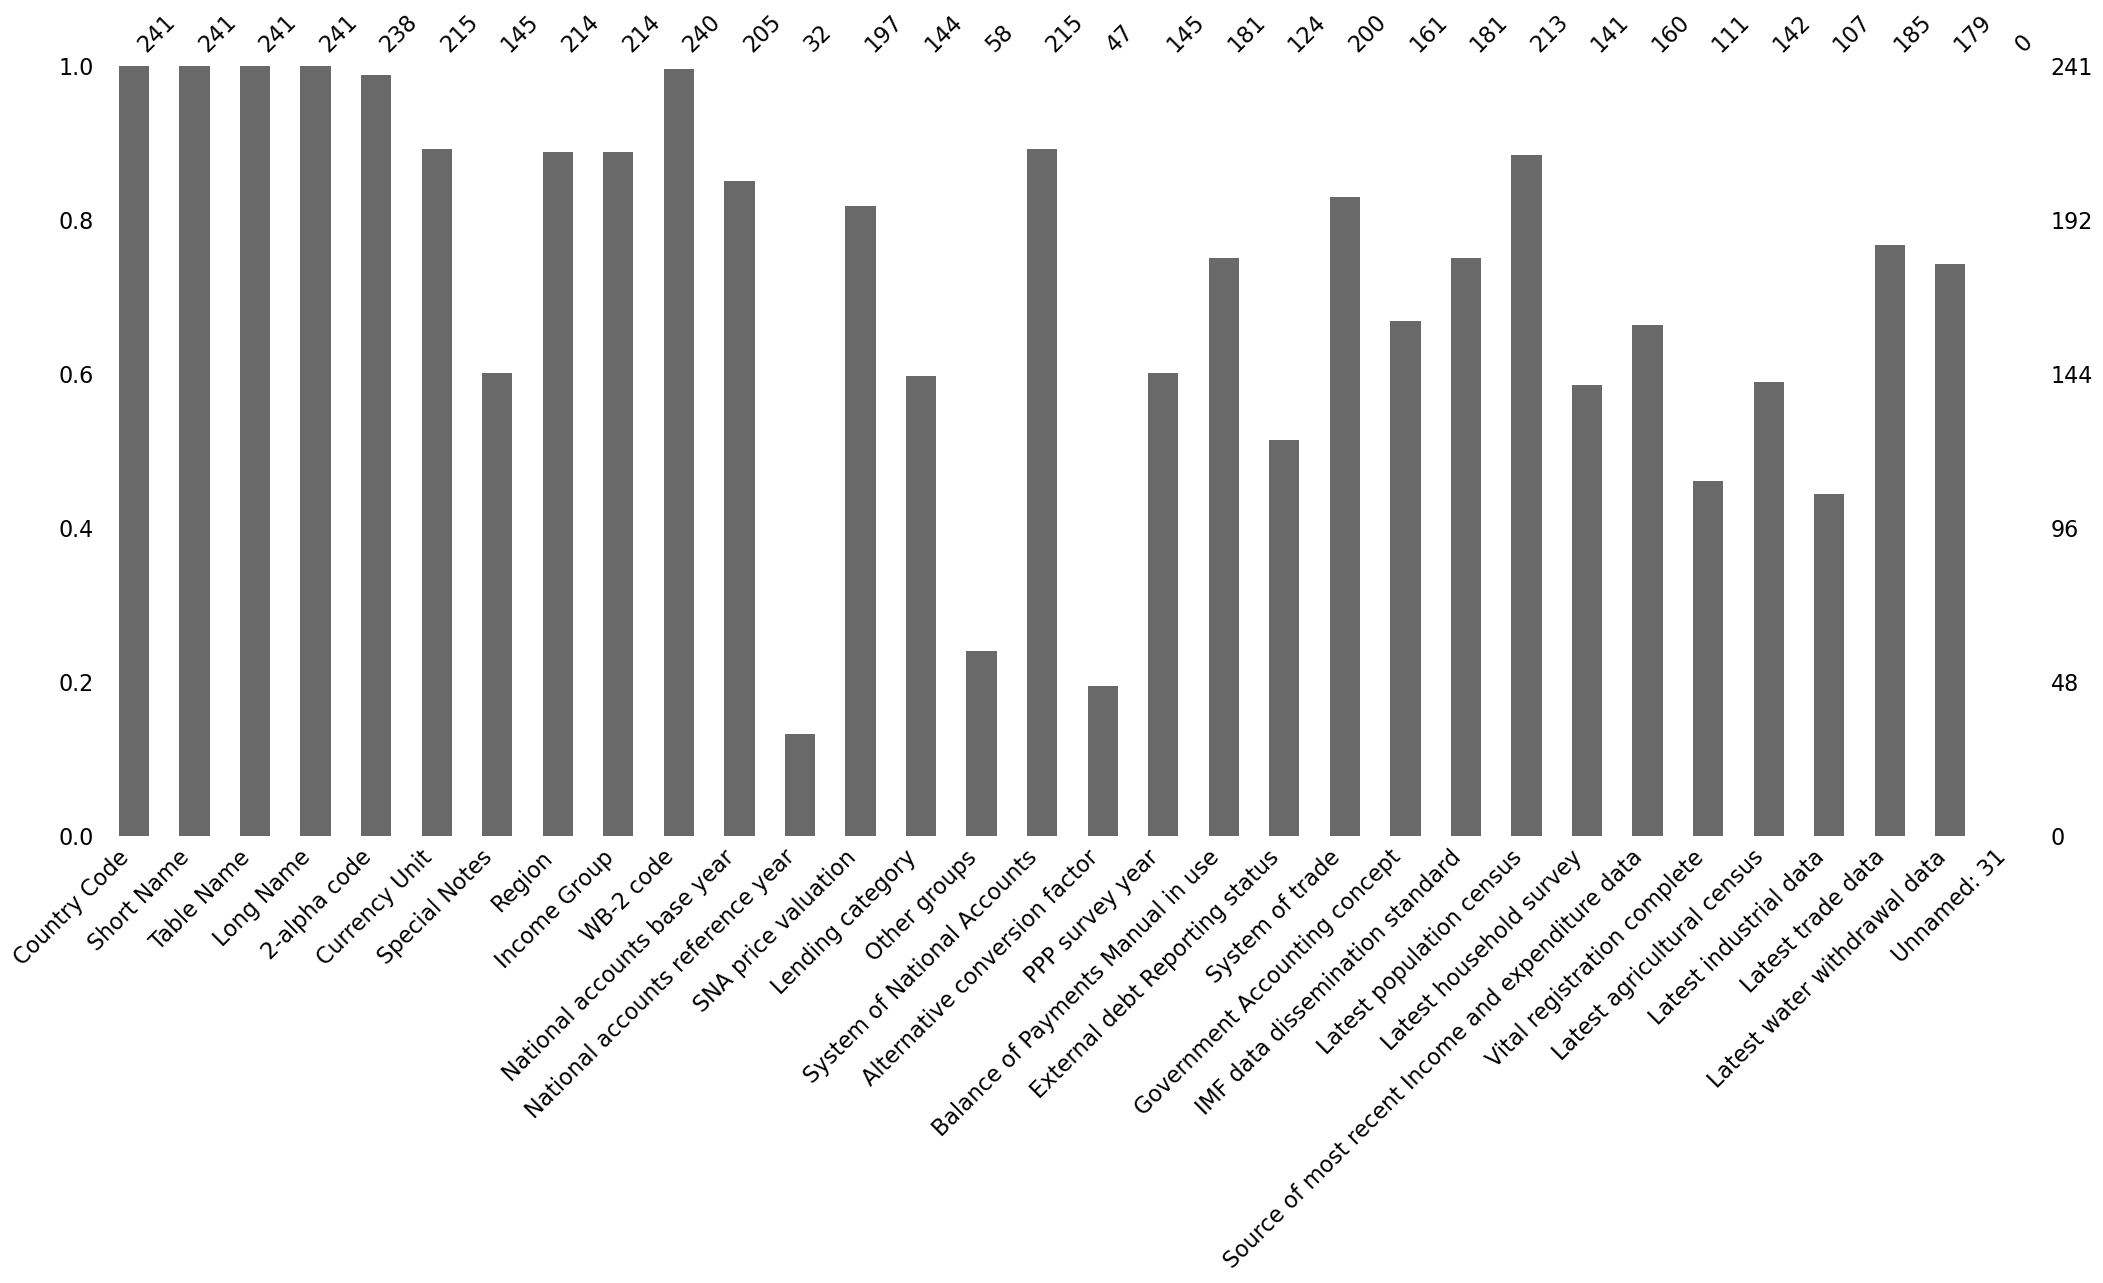

In [11]:
#Utilisation de la librairie missingno pour savoir comment sont composé mes colonnes de données.
msno.bar(pays)
plt.show()

In [12]:
#Voir les doublons sur les pays
doublons = pays[pays.duplicated(['Country Code'], keep=False)]
nb_doublons_code_pays = doublons.shape[0]
print(f'Nombre de doublons sur le code pays: {nb_doublons_code_pays}')

Nombre de doublons sur le code pays: 0


In [13]:
#Remplacement région NaN par "à combler ?" pour la suite, car cette colonne est pertinente pour la suite.
pays['Region'].fillna('A combler', inplace=True)
pays['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'A combler', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [14]:
#Pareil pour Income Group, il y a des données manquantes (214 au lieu de 241), colonne pertinente pour la suite.
pays['Income Group'].fillna('A combler', inplace=True)
pays['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income',
       'A combler', 'Lower middle income', 'High income: OECD'],
      dtype=object)

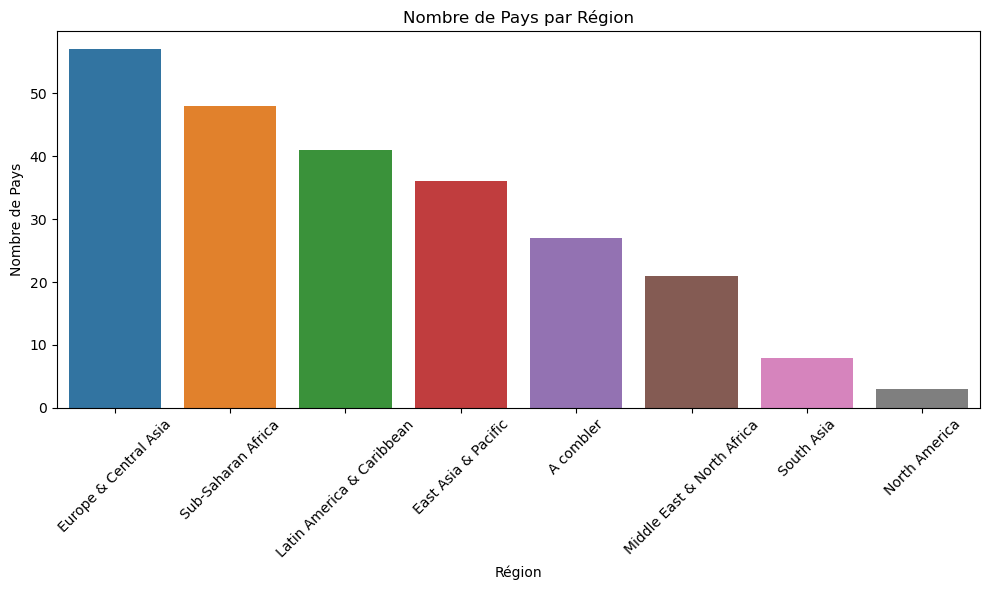

In [15]:
#Répartition pays/région/groupe de revenue
#Graphique du nombre de pays par région
plt.figure(figsize=(10, 6))
sns.countplot(data=pays, x='Region', order=pays['Region'].value_counts().index)
plt.title('Nombre de Pays par Région')
plt.xlabel('Région')
plt.ylabel('Nombre de Pays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

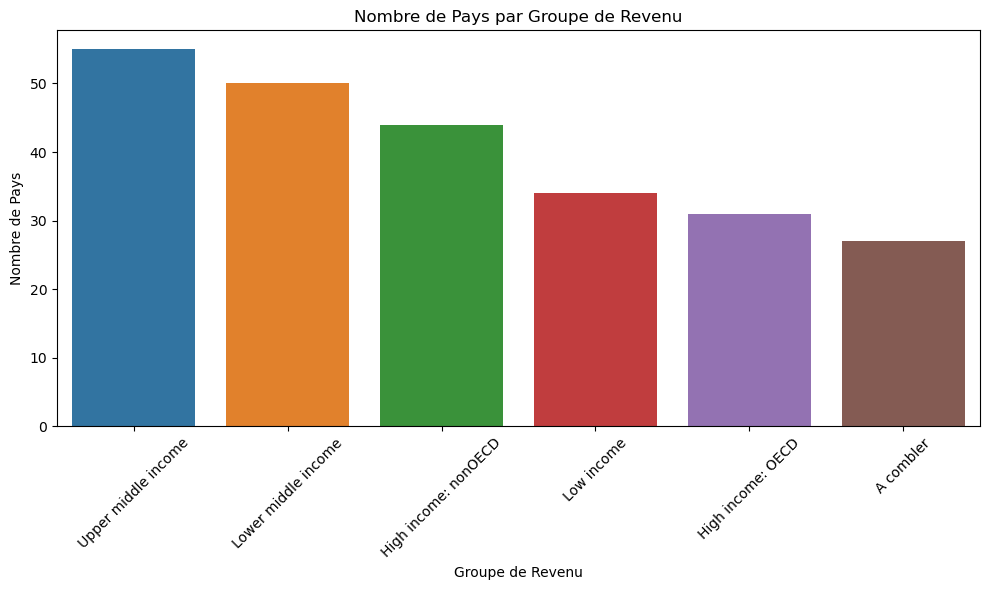

In [16]:
#Graphique du nombre de pays par groupe de revenu
plt.figure(figsize=(10, 6))
sns.countplot(data=pays, x='Income Group', order=pays['Income Group'].value_counts().index)
plt.title('Nombre de Pays par Groupe de Revenu')
plt.xlabel('Groupe de Revenu')
plt.ylabel('Nombre de Pays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

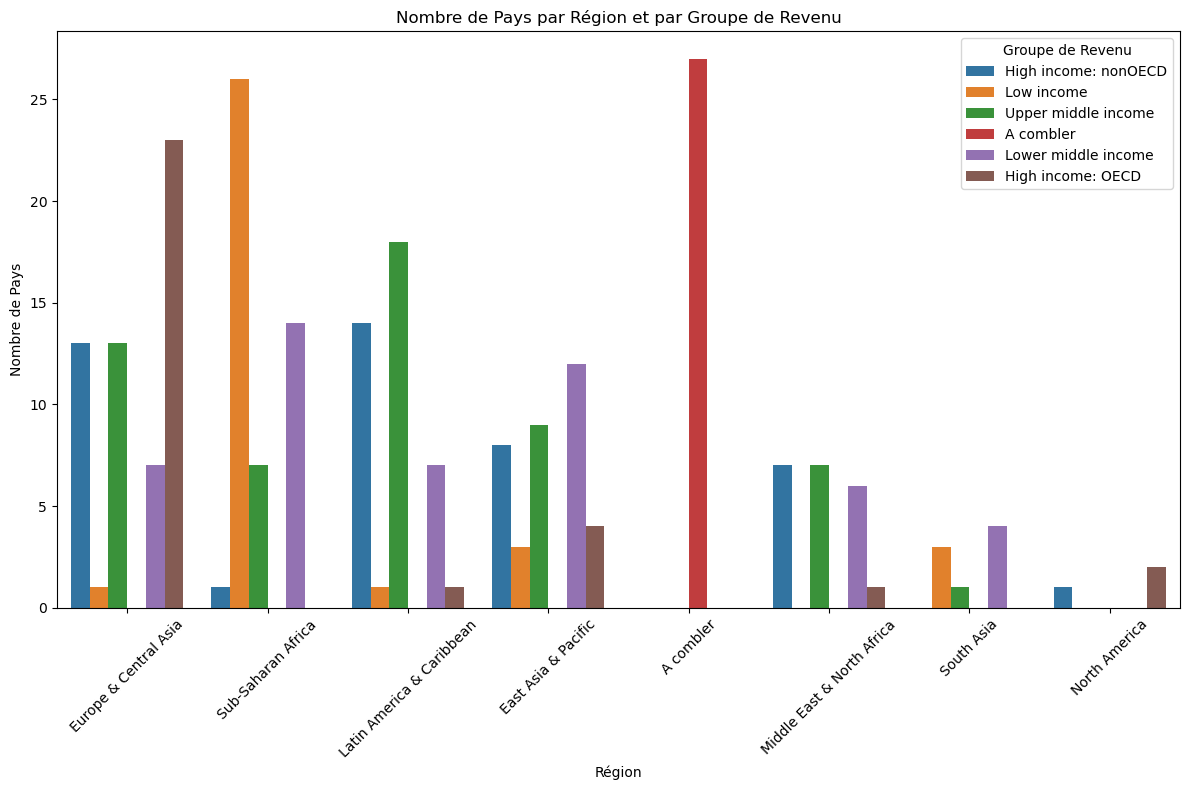

In [17]:
#Graphique du nombre de pays par région et par groupe de revenu
plt.figure(figsize=(12, 8))
sns.countplot(data=pays, x='Region', hue='Income Group', order=pays['Region'].value_counts().index)
plt.title('Nombre de Pays par Région et par Groupe de Revenu')
plt.xlabel('Région')
plt.ylabel('Nombre de Pays')
plt.xticks(rotation=45)
plt.legend(title='Groupe de Revenu')
plt.tight_layout()
plt.show()

#### Conclusion table pays

Le dataset contient différentes données géographiques sur les pays, des données économiques globales et des dates sur les dernières études.

Le jeu de données contient 241 lignes et 32 colonnes.

Valeurs manquantes : 2 354 NaN pour 7 712 données (30.52 %), pas de doublons, toutes les régions sont présentes.

Il faudra supprimer la colonne "Unnamed:31" car elle est vide.

### 2.2 Table Pays Series<a class="anchor" id="Table-Pays-Series_2_2"></a>

In [18]:
#Contenue des 3 premières lignes de la table.
pays_serie.head(3)

CountryCode   SeriesCode                                        DESCRIPTION  \
0         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
1         ABW  SP.POP.GROW  Data sources: United Nations World Population ...   
2         AFG  SP.POP.GROW  Data sources: United Nations World Population ...   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN

In [19]:
#Colonne du dataframe
pays_serie.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [20]:
#Résumé des variables qualitatives
pays_serie.describe(exclude=[np.number])

CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            MDA  SP.POP.TOTL   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154

In [21]:
#Résumé des variables quantitatives
pays_serie.describe()

Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

In [22]:
#Taille : nombre de lignes/colonnes
nRow, nCol = pays_serie.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 613 lignes et 4 colonnes.


In [23]:
total_missing, total_data, missing_percentage = missing_values_summary(pays_serie)

Valeurs manquantes : 613 NaN pour 2452 données (25.00 %)


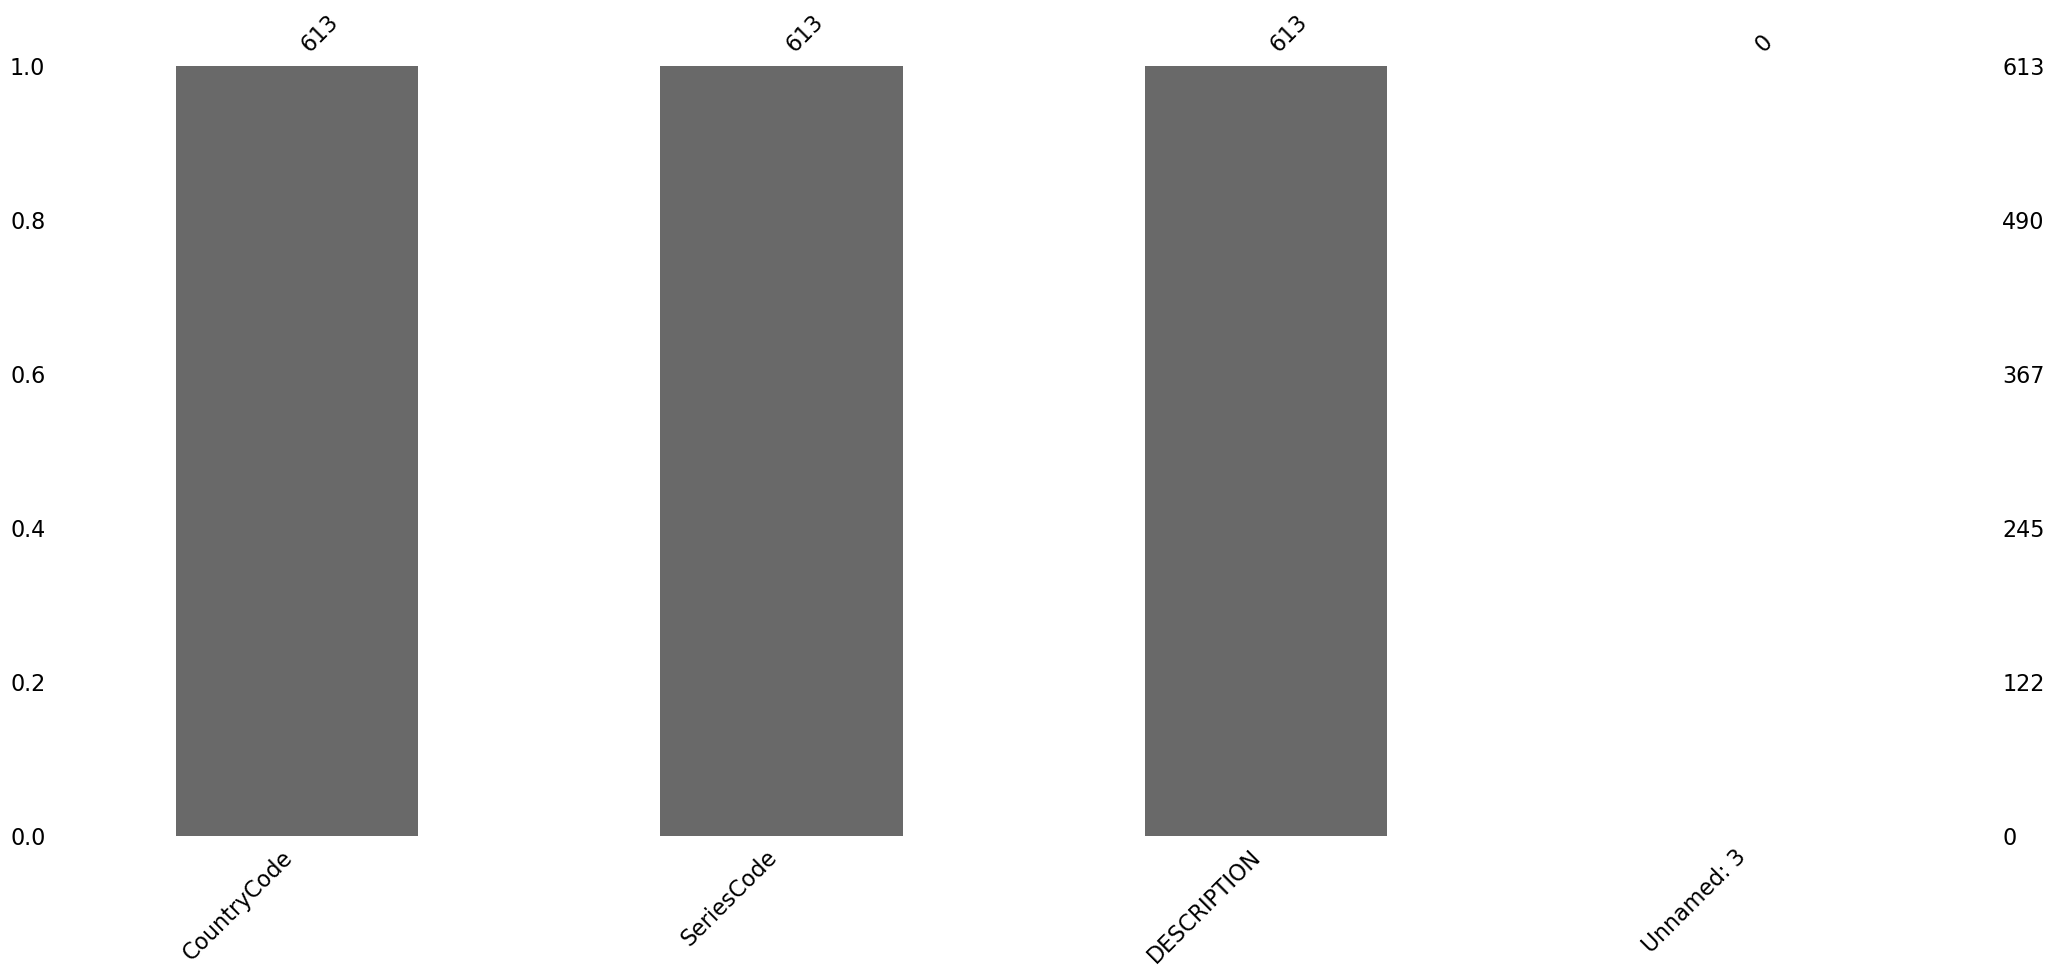

In [24]:
msno.bar(pays_serie)
plt.show()

In [25]:
#vérification des doublons sur le dataframe
pays_serie[pays_serie.duplicated(keep=False)].shape[0]

0

In [26]:
#Vérification des doublons sur les 2 colonnes CountryCode et SeriesCode
pays_serie[pays_serie.duplicated(['CountryCode', 'SeriesCode'], keep=False)].shape[0]

0

In [27]:
#Vérification des doublons sur les 3 colonnes CountryCode, SeriesCode et DESCRIPTION
pays_serie[pays_serie.duplicated(['CountryCode', 'SeriesCode', 'DESCRIPTION'], keep=False)].shape[0]

0

In [28]:
#Pays présents dans la table pays mais pas dans pays_serie
pays['Country Code'].nunique() == pays_serie['CountryCode'].nunique()

False

In [29]:
#Recherche des noms des pays n'apparaissant pas dans le jeu de données pays_serie
#Convertir les codes des pays en ensembles
pays_set = set(pays['Country Code'])
pays_serie_set = set(pays_serie['CountryCode'])

#Trouver les pays présents dans "pays" mais absents dans "pays_serie"
countries_in_pays_not_in_pays_serie = pays_set - pays_serie_set

#Filtrer les lignes correspondantes dans le DataFrame "pays"
missing_countries_df = pays[pays['Country Code'].isin(countries_in_pays_not_in_pays_serie)]

missing_countries_df

Country Code                                      Short Name  \
5            ARB                                      Arab World   
47           CUW                                         Curaçao   
57           EAP           East Asia & Pacific (developing only)   
58           EAS         East Asia & Pacific (all income levels)   
59           ECA         Europe & Central Asia (developing only)   
60           ECS       Europe & Central Asia (all income levels)   
63           EMU                                       Euro area   
68           EUU                                  European Union   
89           HIC                                     High income   
92           HPC          Heavily indebted poor countries (HIPC)   
116          LAC     Latin America & Caribbean (developing only)   
122          LCN   Latin America & Caribbean (all income levels)   
123          LDC    Least developed countries: UN classification   
124          LIC                                      Low income   
127          LMC                             Lower middle income   
128          LMY                             Low & middle income   
134          MAF                        St. Martin (French part)   
140          MEA  Middle East & North Africa (all income levels)   
143          MIC                                   Middle income   
148          MNA    Middle East & North Africa (developing only)   
157          NAC                                   North America   
166          NRU                                           Nauru   
168          OED                                    OECD members   
187          SAS                                      South Asia   
198          SSA            Sub-Saharan Africa (developing only)   
199          SSD                                     South Sudan   
200          SSF          Sub-Saharan Africa (all income levels)   
207          SXM                       Sint Maarten (Dutch part)   
225          UMC                             Upper middle income   
234          WLD                                           World   

                                         Table Name  \
5                                        Arab World   
47                                          Curaçao   
57                              East Asia & Pacific   
58          East Asia & Pacific (all income levels)   
59                            Europe & Central Asia   
60        Europe & Central Asia (all income levels)   
63                                        Euro area   
68                                   European Union   
89                                      High income   
92           Heavily indebted poor countries (HIPC)   
116                       Latin America & Caribbean   
122   Latin America & Caribbean (all income levels)   
123    Least developed countries: UN classification   
124                                      Low income   
127                             Lower middle income   
128                             Low & middle income   
134                        St. Martin (French part)   
140  Middle East & North Africa (all income levels)   
143                                   Middle income   
148                      Middle East & North Africa   
157                                   North America   
166                                           Nauru   
168                                    OECD members   
187                                      South Asia   
198                              Sub-Saharan Africa   
199                                     South Sudan   
200          Sub-Saharan Africa (all income levels)   
207                       Sint Maarten (Dutch part)   
225                             Upper middle income   
234                                           World   

                                          Long Name 2-alpha code  \
5                                        Arab World           1A   
47                                          Curaçao  

Les pays en plus dans le jeu de données pays sont :

Des noms de région,

Des noms de regroupement de revenus,

Certains regroupement de pays (European Union, Arab World..),

Des pays comme le Curaçao.

In [30]:
#Regrouper par code d'indicateur et compter le nombre de pays
grouped_df = pays_serie.groupby('SeriesCode').size().reset_index(name='Number of Countries')

print(grouped_df)

           SeriesCode  Number of Countries
0   NY.GDP.MKTP.PP.CD                   14
1   NY.GDP.MKTP.PP.KD                   14
2      NY.GDP.PCAP.CD                    5
3      NY.GDP.PCAP.KD                    5
4   NY.GDP.PCAP.PP.CD                   19
5   NY.GDP.PCAP.PP.KD                   19
6   NY.GNP.MKTP.PP.CD                   14
7      NY.GNP.PCAP.CD                    6
8   NY.GNP.PCAP.PP.CD                   19
9   SP.POP.0014.FE.IN                    4
10  SP.POP.0014.MA.IN                    4
11     SP.POP.0014.TO                    4
12  SP.POP.0014.TO.ZS                   13
13  SP.POP.1564.FE.IN                    4
14  SP.POP.1564.MA.IN                    4
15     SP.POP.1564.TO                    4
16  SP.POP.1564.TO.ZS                   13
17        SP.POP.GROW                  211
18        SP.POP.TOTL                  211
19  SP.POP.TOTL.FE.ZS                   13
20  SP.POP.TOTL.MA.ZS                   13


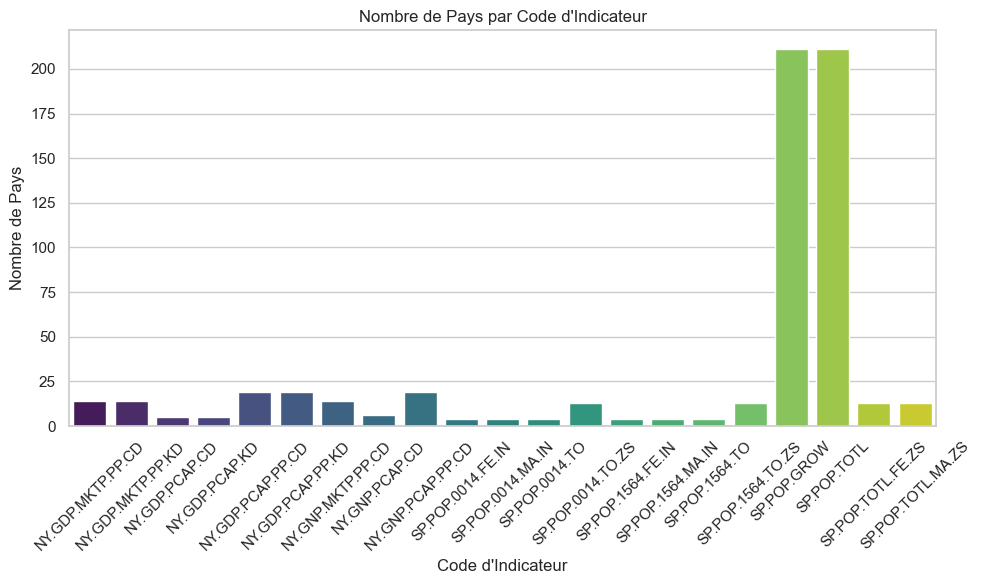

In [31]:
#Représentation graphique.
#Configuration du style pour les graphiques
sns.set(style="whitegrid")

#Graphique du nombre de pays par code d'indicateur
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='SeriesCode', y='Number of Countries', palette='viridis')
plt.title('Nombre de Pays par Code d\'Indicateur')
plt.xlabel('Code d\'Indicateur')
plt.ylabel('Nombre de Pays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
#Regrouper par description d'indicateur et compter le nombre de pays
grouped_df_descrip = pays_serie.groupby('DESCRIPTION').size().reset_index(name='Number of Countries')

#Trier les descriptions par nombre de pays et sélectionner le top 10
top_10_df = grouped_df_descrip.sort_values(by='Number of Countries', ascending=False).head(10)

print(top_10_df)

                                          DESCRIPTION  Number of Countries
38  Data sources : United Nations World Population...                  154
72  Data sources: United Nations World Population ...                  137
76                 Estimates are based on regression.                   84
9                             Data sources : Eurostat                   54
75  Derived using ratio of age group from WPP and ...                   24
85                    Includes Former Spanish Sahara.                    6
2   Data are for areas under the effective control...                    6
1                      Covers mainland Tanzania only.                    6
77               Excludes Abkhazia and South Ossetia.                    6
78                             Excludes Transnistria.                    6


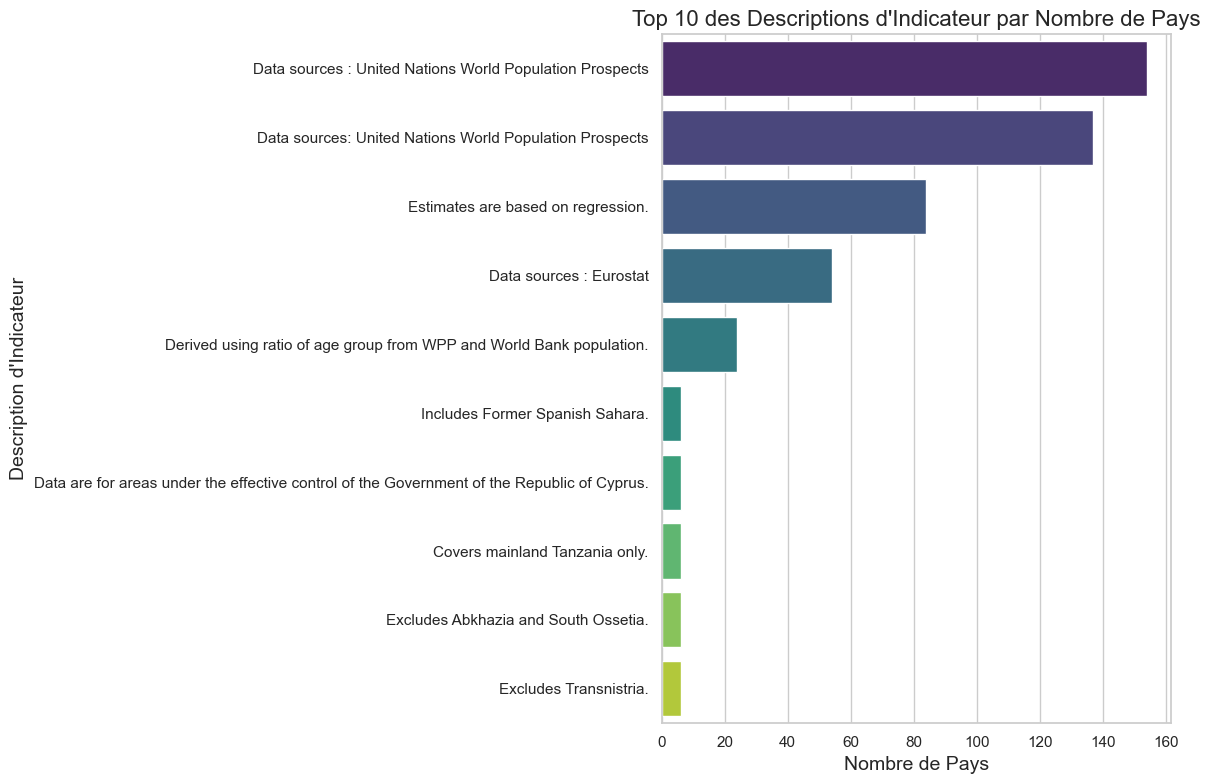

In [33]:
#Représentation graphique

#Configuration du style pour les graphiques
sns.set(style="whitegrid")

#Graphique horizontal du top 10 des descriptions d'indicateur
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_df, y='DESCRIPTION', x='Number of Countries', palette='viridis')
plt.title('Top 10 des Descriptions d\'Indicateur par Nombre de Pays', fontsize=16)
plt.xlabel('Nombre de Pays', fontsize=14)
plt.ylabel('Description d\'Indicateur', fontsize=14)
plt.tight_layout()
plt.show()

Le jeu de données contient les références des sources de certains indicateurs par pays présents dans le jeu de données pays.

Le jeu de données contient 613 lignes et 4 colonnes.

Nombre de valeurs manquantes totales : 613 NaN pour 2452 données (25.0 %), les 3 premières colonnes ('Country Code', 'Serie Code' et 'Description') n’ont pas de valeurs manquantes.

Les pays en plus (241 dans EdStatsCountry.csv et de 211 dans le jeu de données EdStatsCountry-Series.csv) sont des noms de région ou de regroupement de revenus ou certains regroupement de pays (European Union, Arab world..) et certains pays devenus autonomes (Curaçao).

La dernière colonne Unnamed: 3 est entièrement vide, inexploitable donc à nettoyer.

### 2.3.Table data<a class="anchor" id="23-table-data"></a>

In [34]:
#Contenue de la table data
data.head(3)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   1971  1972  1973  1974  1975  ...  2060  2065  2070  2075  2080  2085  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN          NaN  

[3 rows x 70 columns]

In [35]:
#Colonnes du dataframe
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [36]:
#Résumé des variables qualitatives
data.describe(exclude=[np.number])

Country Name Country Code  \
count        886930       886930   
unique          242          242   
top      Arab World          ARB   
freq           3665         3665   

                                           Indicator Name Indicator Code  
count                                              886930         886930  
unique                                               3665           3665  
top     Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2  
freq                                                  242            242

In [37]:
#Résumé des variables quantitatives
data.describe()

1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.473986e+11  2.660957e+11   
min   -3.658569e+00 -2.950945e+00 -3.174870e+00 -3.558749e+00 -2.973612e+00   
25%    1.400000e+00  9.312615e+00  9.519913e+00  1.000000e+01  1.000000e+01   
50%    9.677420e+00  7.101590e+01  7.133326e+01  7.290512e+01  7.510173e+01   
75%    7.854163e+01  5.682800e+04  5.739175e+04  5.940425e+04  6.411500e+04   
max    2.300634e+13  2.424128e+13  2.521383e+13  2.622101e+13  2.730873e+13   

       ...          2060          2065          2070          2075  \
count  ...  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   ...  7.224868e+02  7.271290e+02  7.283779e+02  7.266484e+02   
std    ...  2.215845e+04  2.287990e+04  2.352338e+04  2.408149e+04   
min    ... -1.630000e+00 -1.440000e+00 -1.260000e+00 -1.090000e+00   
25%    ...  3.000000e-02  3.000000e-02  2.000000e-02  2.000000e-02   
50%    ...  2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01   
75%    ...  7.505000e+00  7.500000e+00  7.300000e+00  7.100000e+00   
max    ...  2.951569e+06  3.070879e+06  3.169711e+06  3.246239e+06   

               2080          2085          2090          2095          2100  \
count  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   7.228327e+02  7.176899e+02  7.113072e+02  7.034274e+02  6.940296e+02   
std    2.455897e+04  2.496587e+04  2.530183e+04  2.556069e+04  2.574189e+04   
min   -9.200000e-01 -7.800000e-01 -6.500000e-01 -5.500000e-01 -4.500000e-01   
25%    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
50%    2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01  2.200000e-01   
75%    6.722500e+00  6.080000e+00  5.462500e+00  4.680000e+00  4.032500e+00   
max    3.301586e+06  3.337871e+06  3.354746e+06  3.351887e+06  3.330484e+06   

       Unnamed: 69  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 66 columns]

In [38]:
#Taille : nombre de lignes/colonnes
nRow, nCol = data.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 886930 lignes et 70 colonnes.


In [39]:
#Calcul des valeurs manquantes
total_missing, total_data, missing_percentage = missing_values_summary(data)

Valeurs manquantes : 53455179 NaN pour 62085100 données (86.10 %)


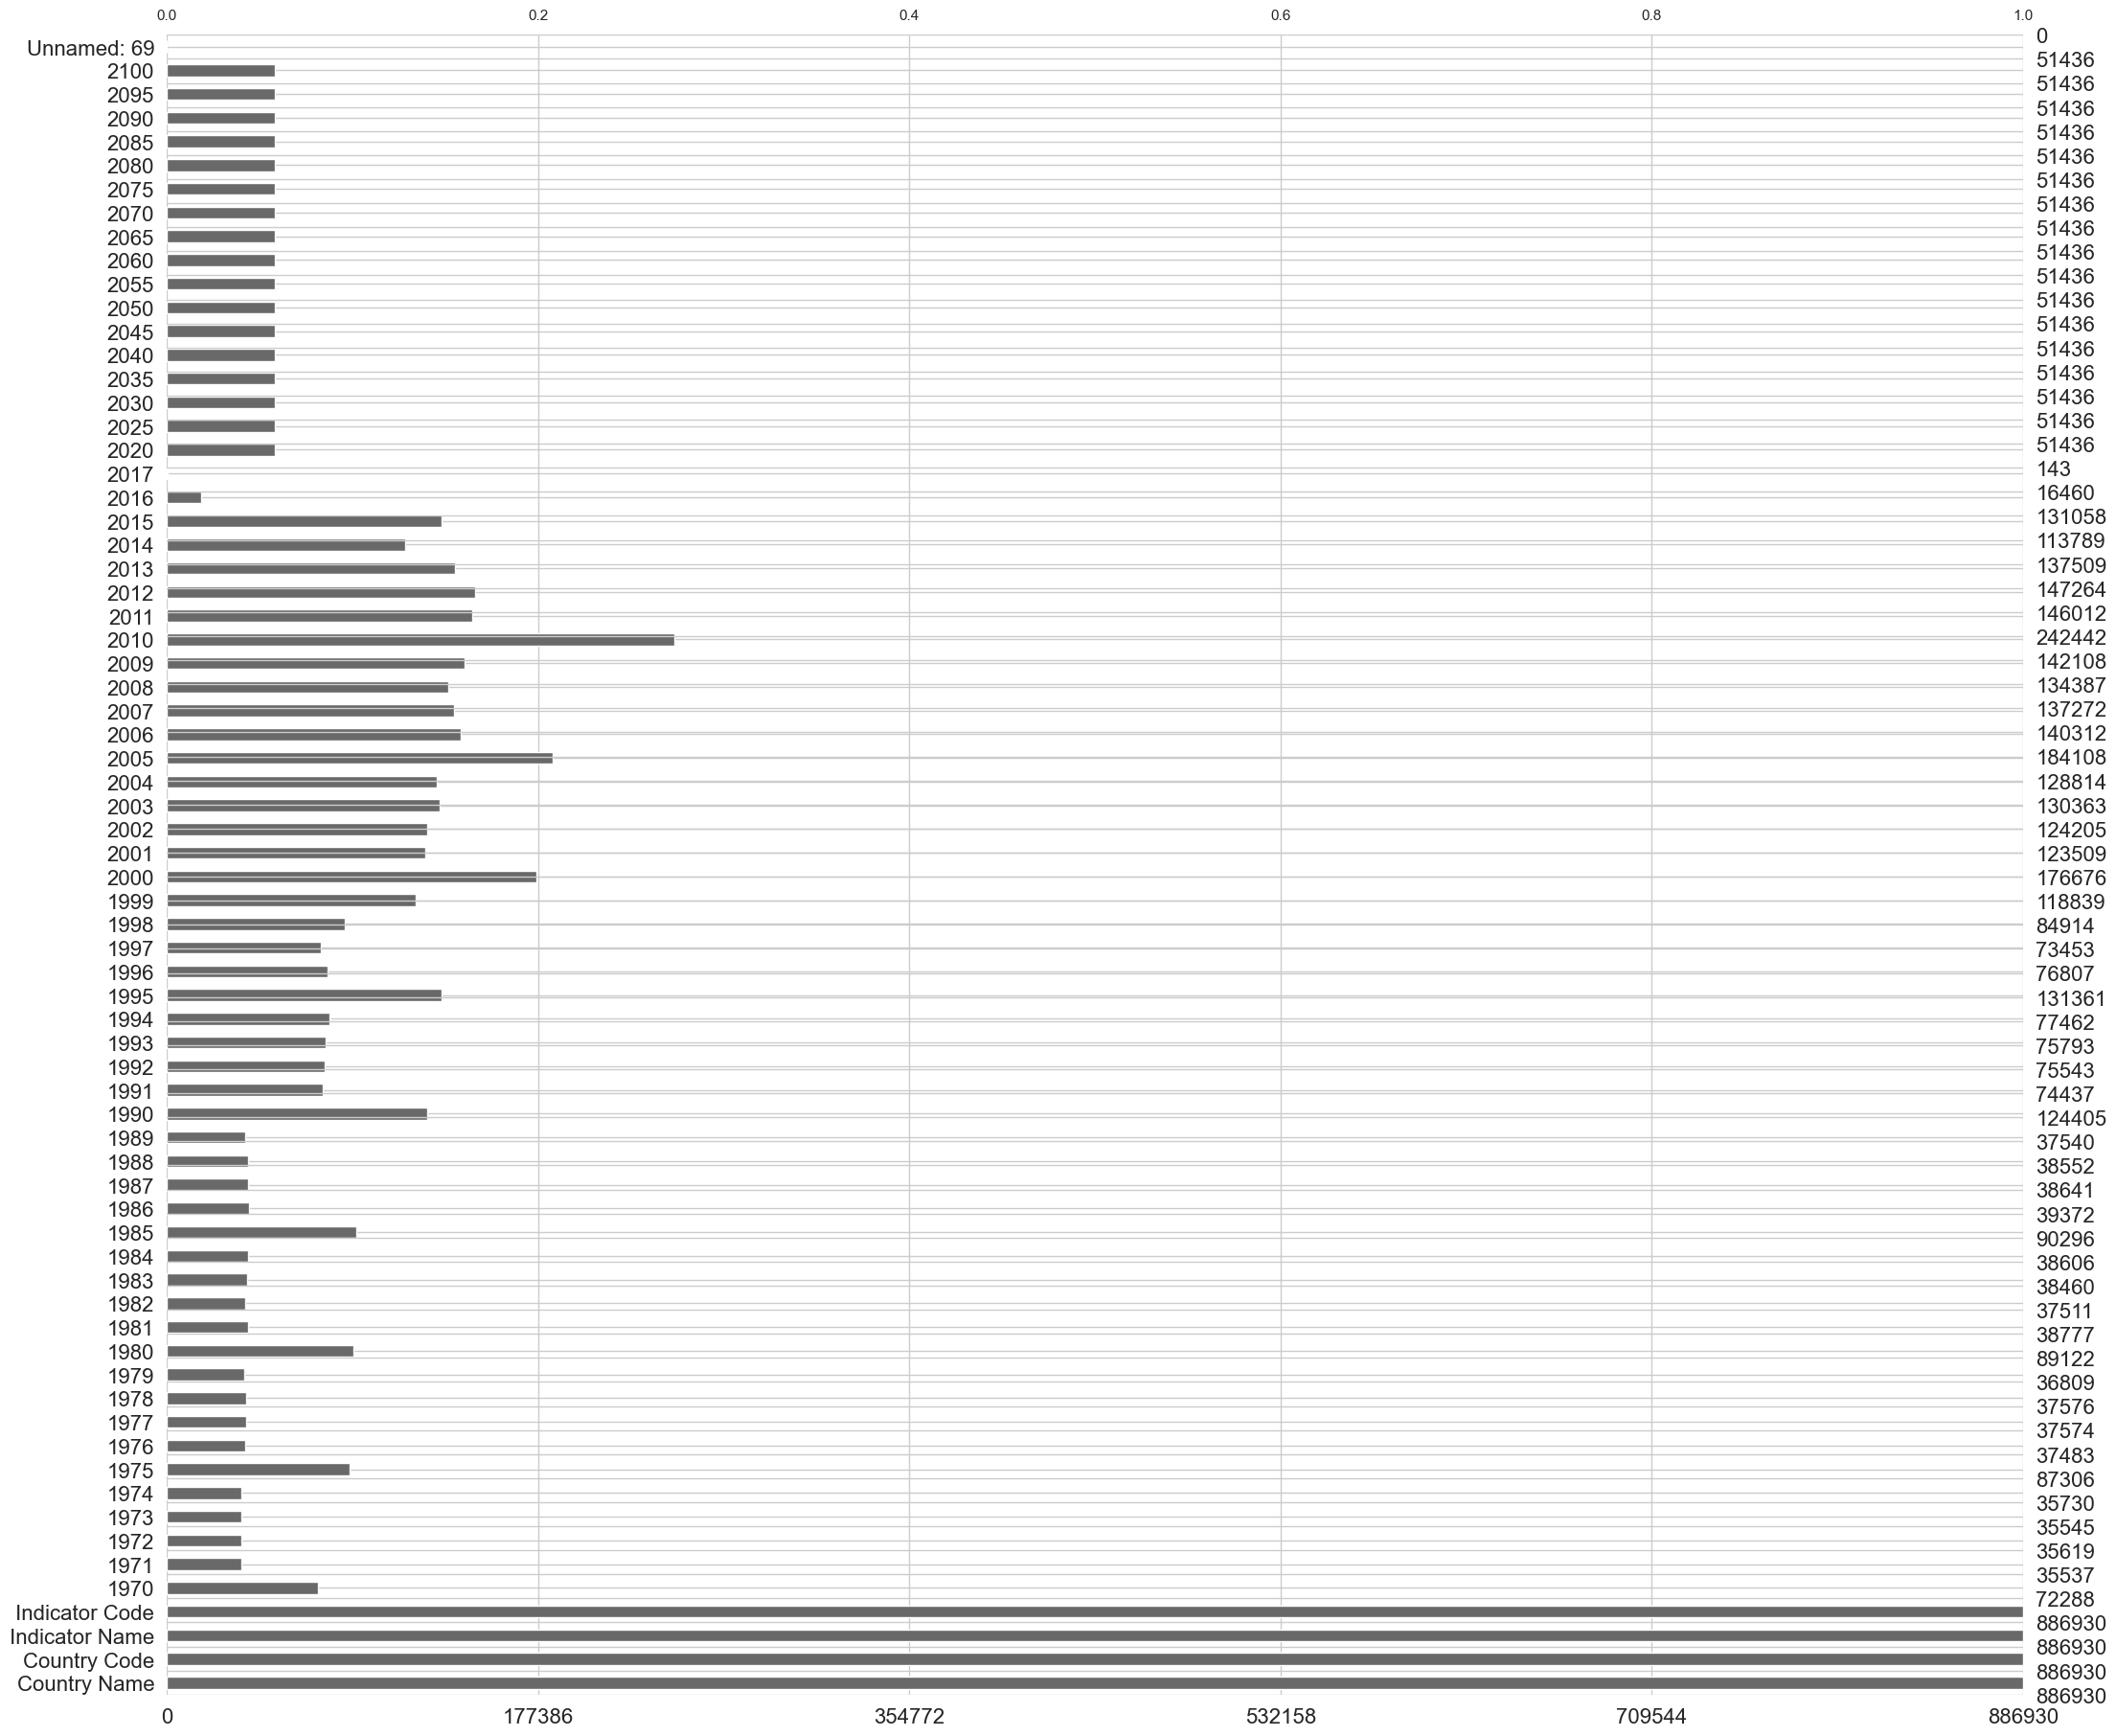

In [40]:
#Utilisation de la librairie Missingo pour avoir une vue d'ensemble sur le nombre de données par année.
msno.bar(data)
plt.show()

In [41]:
#Vérification des doublons
data[data.duplicated(keep=False)].shape[0]

0

In [42]:
#Vérification des doublons sur les 2 colonnes Country Code et Indicator Code
data[data.duplicated(['Country Code', 'Indicator Code'], keep=False)].shape[0]

0

In [43]:
#Comparaison nombre de pays dans la table data et la table pays
data['Country Code'].nunique() == pays['Country Code'].nunique()

False

In [44]:
#Recherche du pays présent dans data mais pas dans pays
df_pays=data[~data['Country Code'].isin(pays['Country Code'])][['Country Name']]
df_pays.drop_duplicates(inplace=True)
df_pays

Country Name
190580  British Virgin Islands

In [45]:
#Comparaison nombre de pays dans le table data et dans la table pays_serie
data['Country Code'].nunique() == pays_serie['CountryCode'].nunique()

False

In [46]:
#Recherche du pays présent dans data mais n'apparaissant pas dans le jeu de données pays_serie
df_pays_2=data[~data['Country Code'].isin(pays_serie['CountryCode'])][['Country Name']].sort_values(by = 'Country Name')
df_pays_2.drop_duplicates(inplace=True)
df_pays_2

Country Name
0                                              Arab World
193025                             British Virgin Islands
278539                                            Curacao
4884                                  East Asia & Pacific
7330          East Asia & Pacific (excluding high income)
10996                                           Euro area
14661                               Europe & Central Asia
21989       Europe & Central Asia (excluding high income)
23208                                      European Union
25656              Heavily indebted poor countries (HIPC)
31152                                         High income
35429                           Latin America & Caribbean
36650   Latin America & Caribbean (excluding high income)
40318        Least developed countries: UN classification
45209                                 Low & middle income
49477                                          Low income
54973                                 Lower middle income
56807                          Middle East & North Africa
61086   Middle East & North Africa (excluding high inc...
62305                                       Middle income
593734                                              Nauru
68417                                       North America
69636                                        OECD members
719557                          Sint Maarten (Dutch part)
75745                                          South Asia
743993                                        South Sudan
758658                           St. Martin (French part)
79402                                  Sub-Saharan Africa
83074          Sub-Saharan Africa (excluding high income)
86733                                 Upper middle income
91624                                               World

In [47]:
#Sélectionner les colonnes des années
years_columns = [col for col in data.columns if col.isdigit()]

data_per_year = data[years_columns].notna().sum().reset_index()
data_per_year.columns = ['Year','Count']

In [48]:
#Créer une colonne pour les décennies
df_decades = data_per_year.copy()
df_decades['Decade'] = (df_decades['Year'].astype(int) // 10) * 10

#Compter les valeurs non manquantes par décennie
data_per_decade = df_decades.groupby('Decade')['Count'].sum().reset_index()

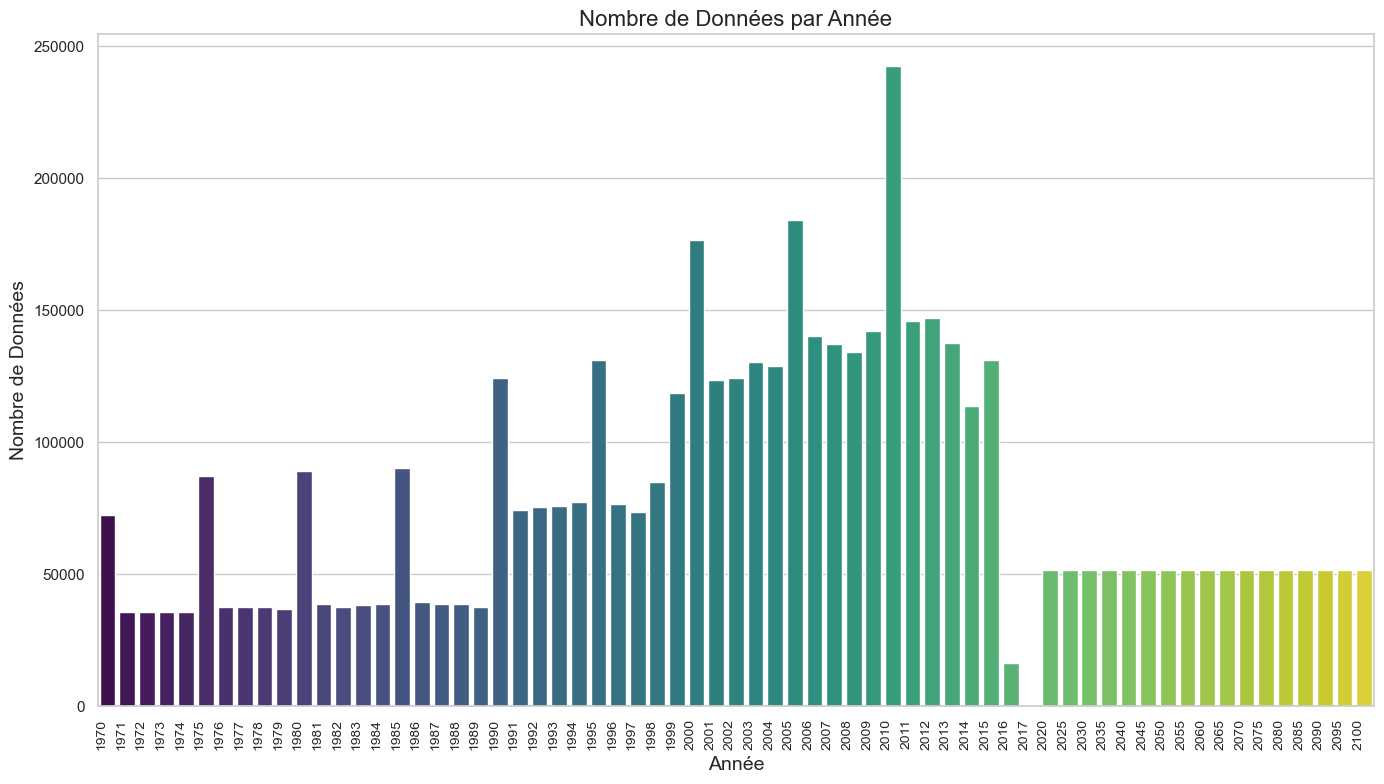

In [49]:
#Configuration du style pour les graphiques
sns.set(style="whitegrid")

#Graphique pour les données par année
plt.figure(figsize=(14, 8))
sns.barplot(data=data_per_year, x='Year', y='Count', palette='viridis')
plt.title('Nombre de Données par Année', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Nombre de Données', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

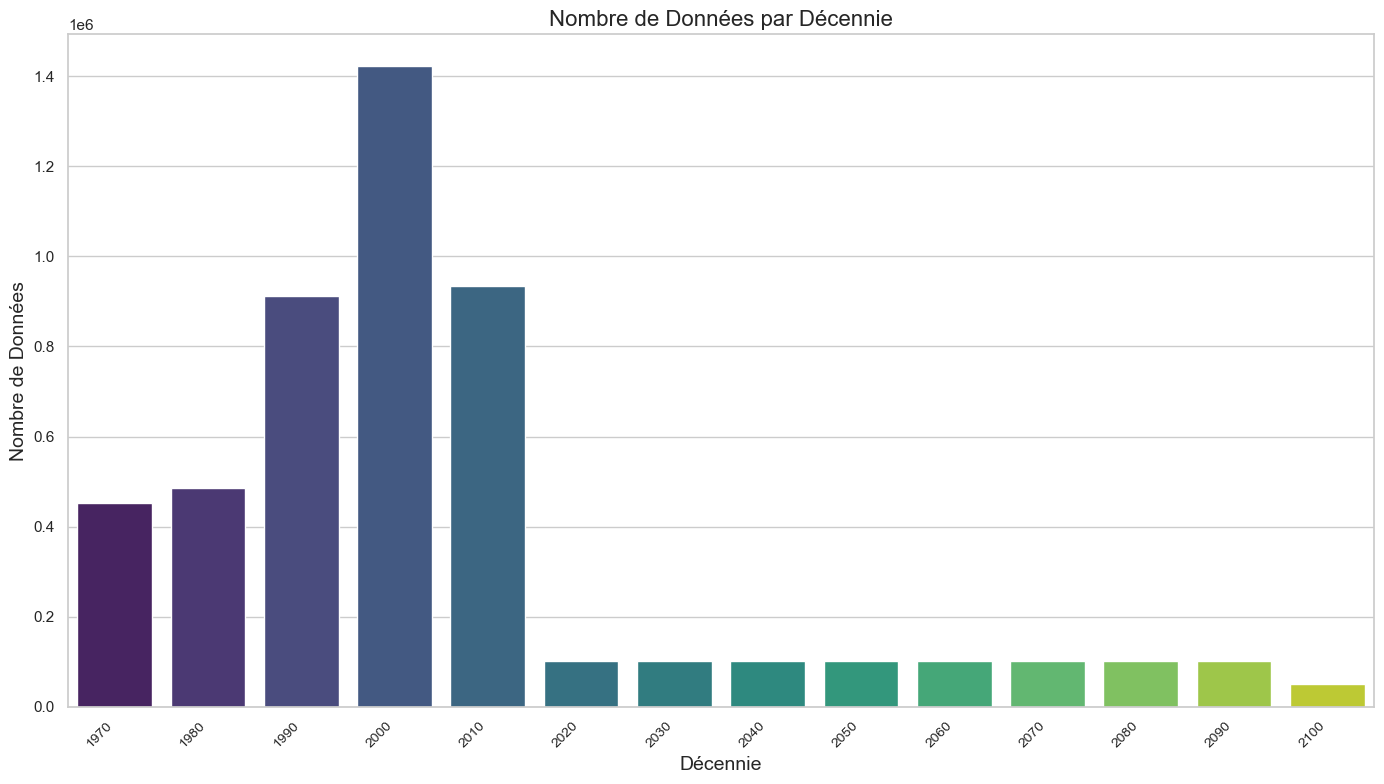

In [50]:
#Graphique pour les données par décennie
plt.figure(figsize=(14, 8))
sns.barplot(data=data_per_decade, x='Decade', y='Count', palette='viridis')
plt.title('Nombre de Données par Décennie', fontsize=16)
plt.xlabel('Décennie', fontsize=14)
plt.ylabel('Nombre de Données', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

On observe un pic de données tous les 5 ans.

Les données sont doublées tous les 10 ans à partir de 1990.

La dernière année exploitable est 2015.

Les années 2020 à 2100 sont des années de prédiction.

Les années 2010 sont les années avec le plus de données significatives et parmi cette décennie l'année 2010 est la plus fournie.

Ce jeu de données donne l'évolution de plusieurs indicateurs sur une période pour tous les pays du monde avec des prédictions pour les années 2020 - 2100, il semble donc très intéressant pour notre problématique.

Le jeu de données contient 886930 lignes et 70 colonnes.

Nombre de valeurs manquantes totales : 53 455 179 NaN pour 62 085 100 données possibles (86.1 %).

Aucun doublon.

Les variables des code/nom des pays et des code/nom des indicateurs sont 100% complètes.

### 2.4 Table note<a class="anchor" id="24-table-note"></a>

In [51]:
#Contenue de la table
note.head(3)

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN

In [52]:
#Colonne du dataframe
note.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [53]:
#Résumé des variables qualitatives
note.describe(exclude=[np.number])

CountryCode   SeriesCode    Year   DESCRIPTION
count       643638       643638  643638        643638
unique         239         1558      56          9102
top            LIC  SH.DYN.MORT  YR2004  Country Data
freq          7320         9226   27128        191188

In [54]:
#Résumé des variables qualitatives
note.describe()

Unnamed: 4
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

In [55]:
#Taille : nombre de lignes/colonnes
nRow, nCol = note.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 643638 lignes et 5 colonnes.


In [56]:
#Calcul des valeurs manquantes
total_missing, total_data, missing_percentage = missing_values_summary(note)

Valeurs manquantes : 643638 NaN pour 3218190 données (20.00 %)


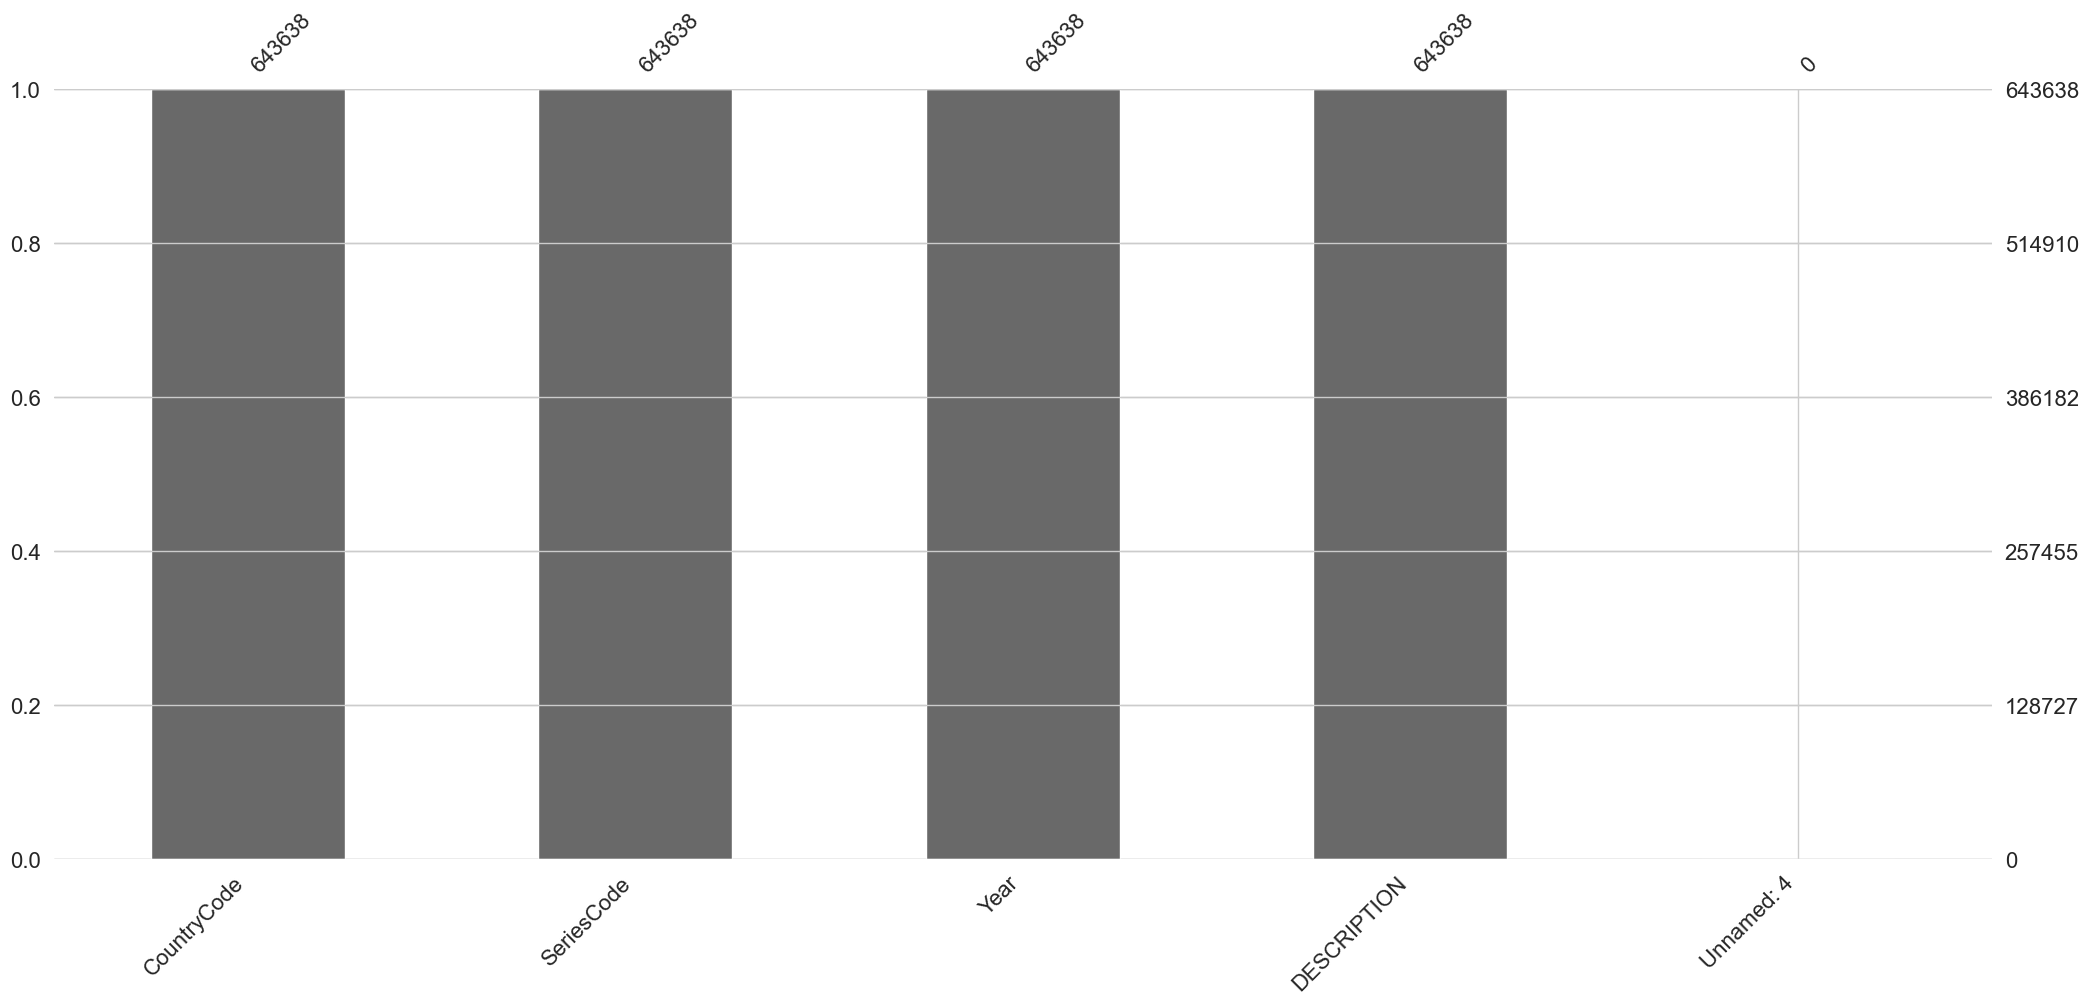

In [57]:
#Utilisation de la librairie missingo pour le contenue des colonnes
msno.bar(note)
plt.show()

In [58]:
#Vérification des doublons avec toutes les colonnes du dataframe
note[note.duplicated(keep=False)].shape[0]

0

In [59]:
#Vérification des doublons sur les 2 colonnes CountryCode et SeriesCode
doublons = note[note.duplicated(['CountryCode', 'SeriesCode'], keep=False)]
print(f'Le nombre de doublons sur les colonnes CountryCode et SeriesCodes est de {doublons.shape[0]}')

Le nombre de doublons sur les colonnes CountryCode et SeriesCodes est de 622238


In [60]:
#Vérification des doublons sur la colonne country code 
doublons_1 = note[note.duplicated(['DESCRIPTION'], keep=False)]
print(doublons_1.shape)
note['DESCRIPTION'].nunique()

(635775, 5)


9102

In [61]:
#Le nombre de code ISO alpha 3 ne correspond pas au code ISO alpha 3 du jeu de données EdStatsCountry-Series.csv.
pays['Country Code'].nunique() == note['CountryCode'].nunique()

False

In [62]:
#Recherche des noms des pays n'apparaissant pas dans le jeu de données pays-serie
pays[~pays['Country Code'].isin(note['CountryCode'])][['Short Name']].sort_values(by = 'Short Name')

Short Name
85                   Greenland
207  Sint Maarten (Dutch part)
134   St. Martin (French part)

In [63]:
#Regrouper par code indicateur et compter le nombre de pays
grouped_by_indicator = note.groupby('SeriesCode')['CountryCode'].nunique().reset_index(name='Number of Countries')
#Trier par nombre de pays et sélectionner le top 10
top_10_indicators = grouped_by_indicator.sort_values(by='Number of Countries', ascending=False).head(10)
print(top_10_indicators)

               SeriesCode  Number of Countries
515           SE.PRM.ENRL                  231
544           SE.PRM.TCHR                  230
567  SE.SEC.ENRL.GC.FE.ZS                  230
516        SE.PRM.ENRL.FE                  230
518     SE.PRM.ENRL.TC.ZS                  229
564     SE.SEC.ENRL.FE.ZS                  229
561           SE.SEC.ENRL                  229
517     SE.PRM.ENRL.FE.ZS                  229
569     SE.SEC.ENRL.TC.ZS                  228
546     SE.PRM.TCHR.FE.ZS                  228


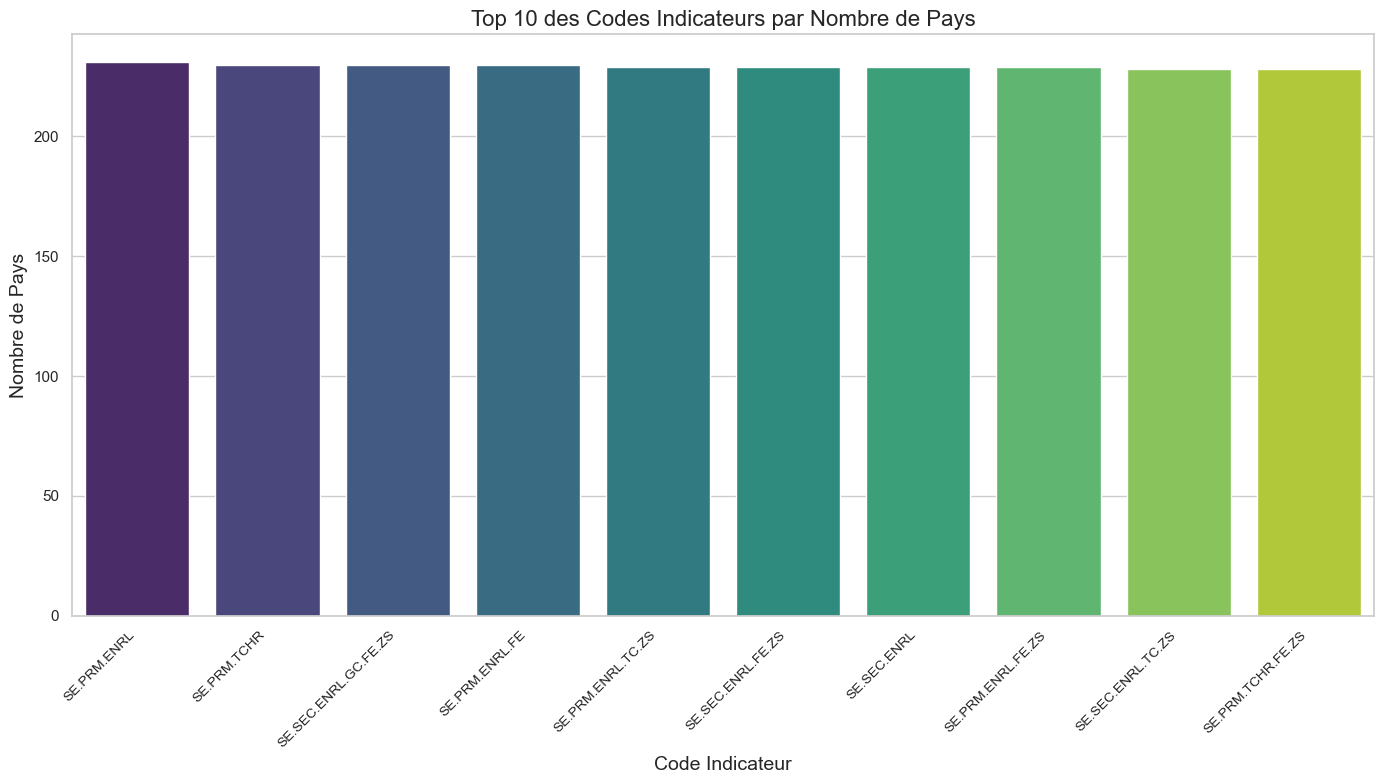

In [64]:
#Représentation graphique
#Configuration du style pour les graphiques
sns.set(style="whitegrid")

#Graphique du top 10 des codes indicateurs par nombre de pays
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_indicators, x='SeriesCode', y='Number of Countries', palette='viridis')
plt.title('Top 10 des Codes Indicateurs par Nombre de Pays', fontsize=16)
plt.xlabel('Code Indicateur', fontsize=14)
plt.ylabel('Nombre de Pays', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [65]:
#Regroupement pays par description
grouped_by_description = note.groupby('DESCRIPTION')['CountryCode'].nunique().reset_index(name='Number of Countries')
#Trier par nombre de pays et sélectionner le top 10
top_10_descriptions = grouped_by_description.sort_values(by='Number of Countries', ascending=False).head(10)
print(top_10_descriptions)

                                         DESCRIPTION  Number of Countries
1276  UNESCO Institute for Statistics (UIS) estimate                  232
83                                      Country Data                  232
119                                        Estimated                  222
90                               Country estimation.                  217
1272                                  UIS Estimation                  209
17            5-year average value between 0s and 5s                  209
1275                                 UIS estimation.                  190
84                                      Country data                  168
89                                Country estimation                  155
1274                                  UIS estimation                  127


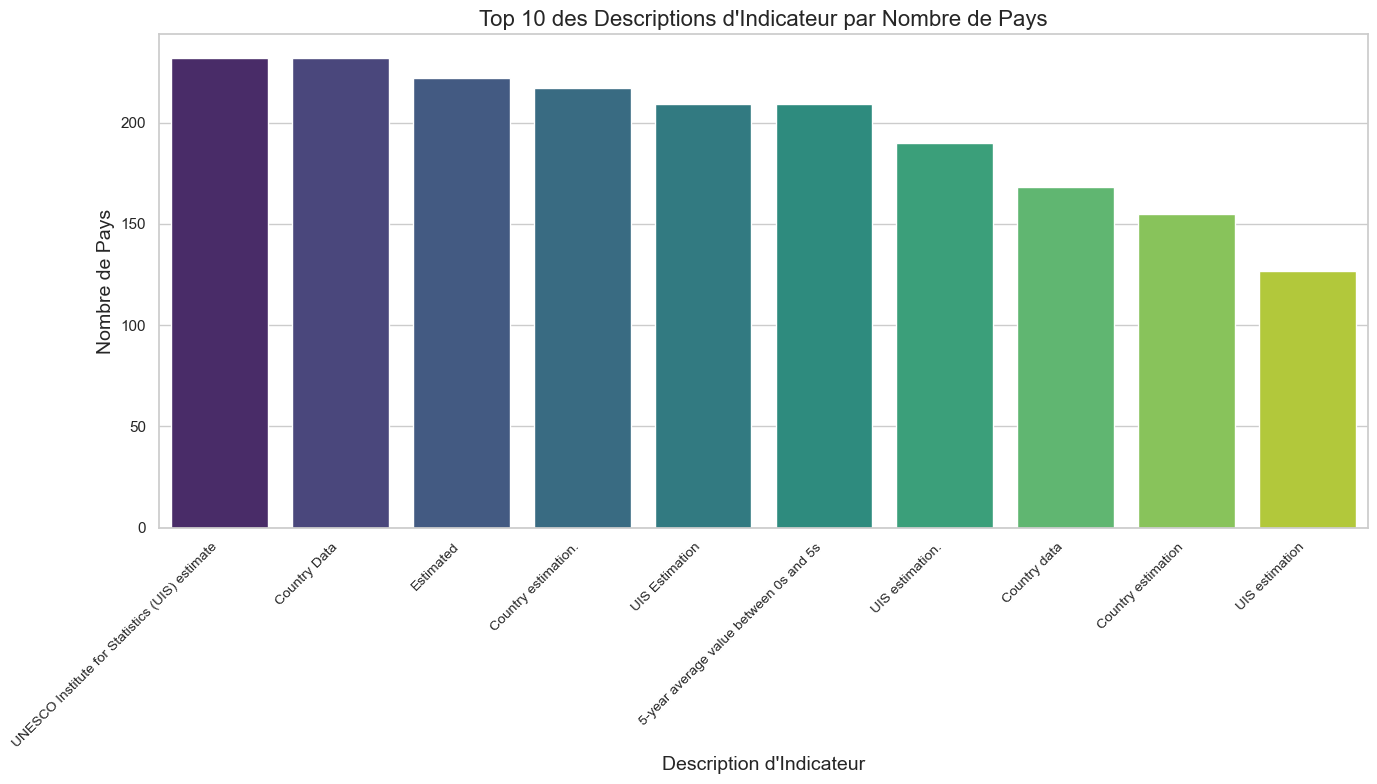

In [66]:
#Représentation graphique
#Configuration du style pour les graphiques
sns.set(style="whitegrid")

# Graphique du top 10 des descriptions par nombre de pays
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_descriptions, x='DESCRIPTION', y='Number of Countries', palette='viridis')
plt.title('Top 10 des Descriptions d\'Indicateur par Nombre de Pays', fontsize=16)
plt.xlabel('Description d\'Indicateur', fontsize=14)
plt.ylabel('Nombre de Pays', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [67]:
note['Year'].unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [68]:
#Nombre de pays avec des mises à jour de codes indicateurs par années
#Mettre toutes les valeurs de l'année en majuscules pour uniformité
note['Year'] = note['Year'].str.upper()
#Extraire l'année en tant qu'entier
note['Year'] = note['Year'].apply(lambda x: int(x.replace('YR', '')))

#Regrouper par année et compter le nombre de pays uniques
grouped_by_year = note.groupby('Year')['CountryCode'].nunique().reset_index(name='Number of Countries')

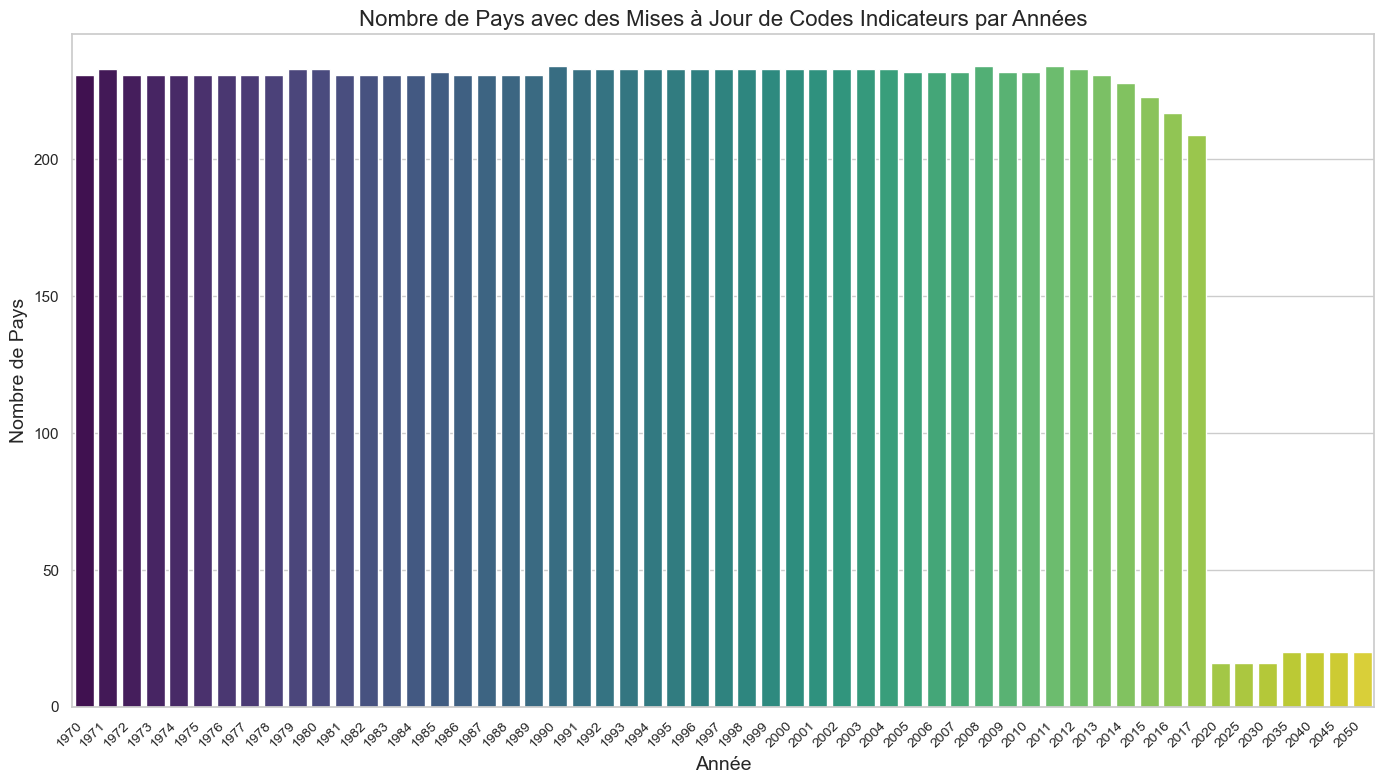

In [69]:
#Configuration du style pour les graphiques
sns.set(style="whitegrid")

#Graphique du nombre de pays avec des mises à jour de codes indicateurs par années
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_by_year, x='Year', y='Number of Countries', palette='viridis')
plt.title('Nombre de Pays avec des Mises à Jour de Codes Indicateurs par Années', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Nombre de Pays', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Le jeu de données contient les années de références de mises à jour des indicateurs par pays et la description des incertitudes, exceptions, remarques sur les mises à jour.

Le jeu de données contient 643638 lignes et 5 colonnes.

Nombre de valeurs manquantes totales : 643 638 NaN pour 3 218 190 données (20.0 % : variable Unnamed: 4).

Plusieurs dates ou description de mise à jour pour chacun des indicateurs possibles par pays.

Les pays non présents dans le jeu de données Note mais présents dans le jeu de données pays sont :
Saint Martin,
Groenland.

La variable Unnamed: 4 est vide, elle pourra être supprimée si le jeu de donnée est utilisé.

### 2.5 Table serie<a class="anchor" id="25-table-serie"></a>                                   

In [70]:
#Contenue de la table serie
serie.head(3)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  

[3 rows x 21 columns]

In [71]:
#Colonne du dataframe
serie.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [72]:
#Résumé des variables qualitatives
serie.describe(exclude=[np.number])

Series Code              Topic  \
count                  3665               3665   
unique                 3665                 37   
top     BAR.NOED.1519.FE.ZS  Learning Outcomes   
freq                      1               1046   

                                           Indicator Name  \
count                                                3665   
unique                                               3665   
top     Barro-Lee: Percentage of female population age...   
freq                                                    1   

                                         Short definition  \
count                                                2156   
unique                                               1169   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
freq                                                  215   

                                          Long definition Periodicity  \
count                                                3665          99   
unique                                               2060           1   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...      Annual   
freq                                                  215          99   

                       Base Period Other notes Aggregation method  \
count                          314         552                 47   
unique                           4          14                  3   
top     Projections (2010 to 2100)        EGRA   Weighted average   
freq                           308         403                 31   

                               Limitations and exceptions  \
count                                                  14   
unique                                                  9   
top     Data should be used cautiously because of diff...   
freq                                                    3   

                                         General comments  \
count                                                  14   
unique                                                  8   
top     When NEET rates are available for more than tw...   
freq                                                    3   

                                 Source Statistical concept and methodology  \
count                              3665                                  23   
unique                               31                                   2   
top     UNESCO Institute for Statistics                               TIMSS   
freq                               1269                                  20   

                                    Development relevance  \
count                                                   3   
unique                                                  1   
top     Unemployment and total employment are the broa...   
freq                                                    3   

                        Related source links  
count                                    215  
unique                                     1  
top     http://saber.worldbank.org/index.cfm  
freq                                     215

In [73]:
#Résumé des variables quantitatives
serie.describe()

Unit of measure  Notes from original source  Other web links  \
count              0.0                         0.0              0.0   
mean               NaN                         NaN              NaN   
std                NaN                         NaN              NaN   
min                NaN                         NaN              NaN   
25%                NaN                         NaN              NaN   
50%                NaN                         NaN              NaN   
75%                NaN                         NaN              NaN   
max                NaN                         NaN              NaN   

       Related indicators  License Type  Unnamed: 20  
count                 0.0           0.0          0.0  
mean                  NaN           NaN          NaN  
std                   NaN           NaN          NaN  
min                   NaN           NaN          NaN  
25%                   NaN           NaN          NaN  
50%                   NaN           NaN          NaN  
75%                   NaN           NaN          NaN  
max                   NaN           NaN          NaN

In [74]:
#Taille : nombre de lignes/colonnes
nRow, nCol = serie.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 3665 lignes et 21 colonnes.


In [75]:
#Calcul valeur manquantes
total_missing, total_data, missing_percentage = missing_values_summary(serie)

Valeurs manquantes : 55203 NaN pour 76965 données (71.72 %)


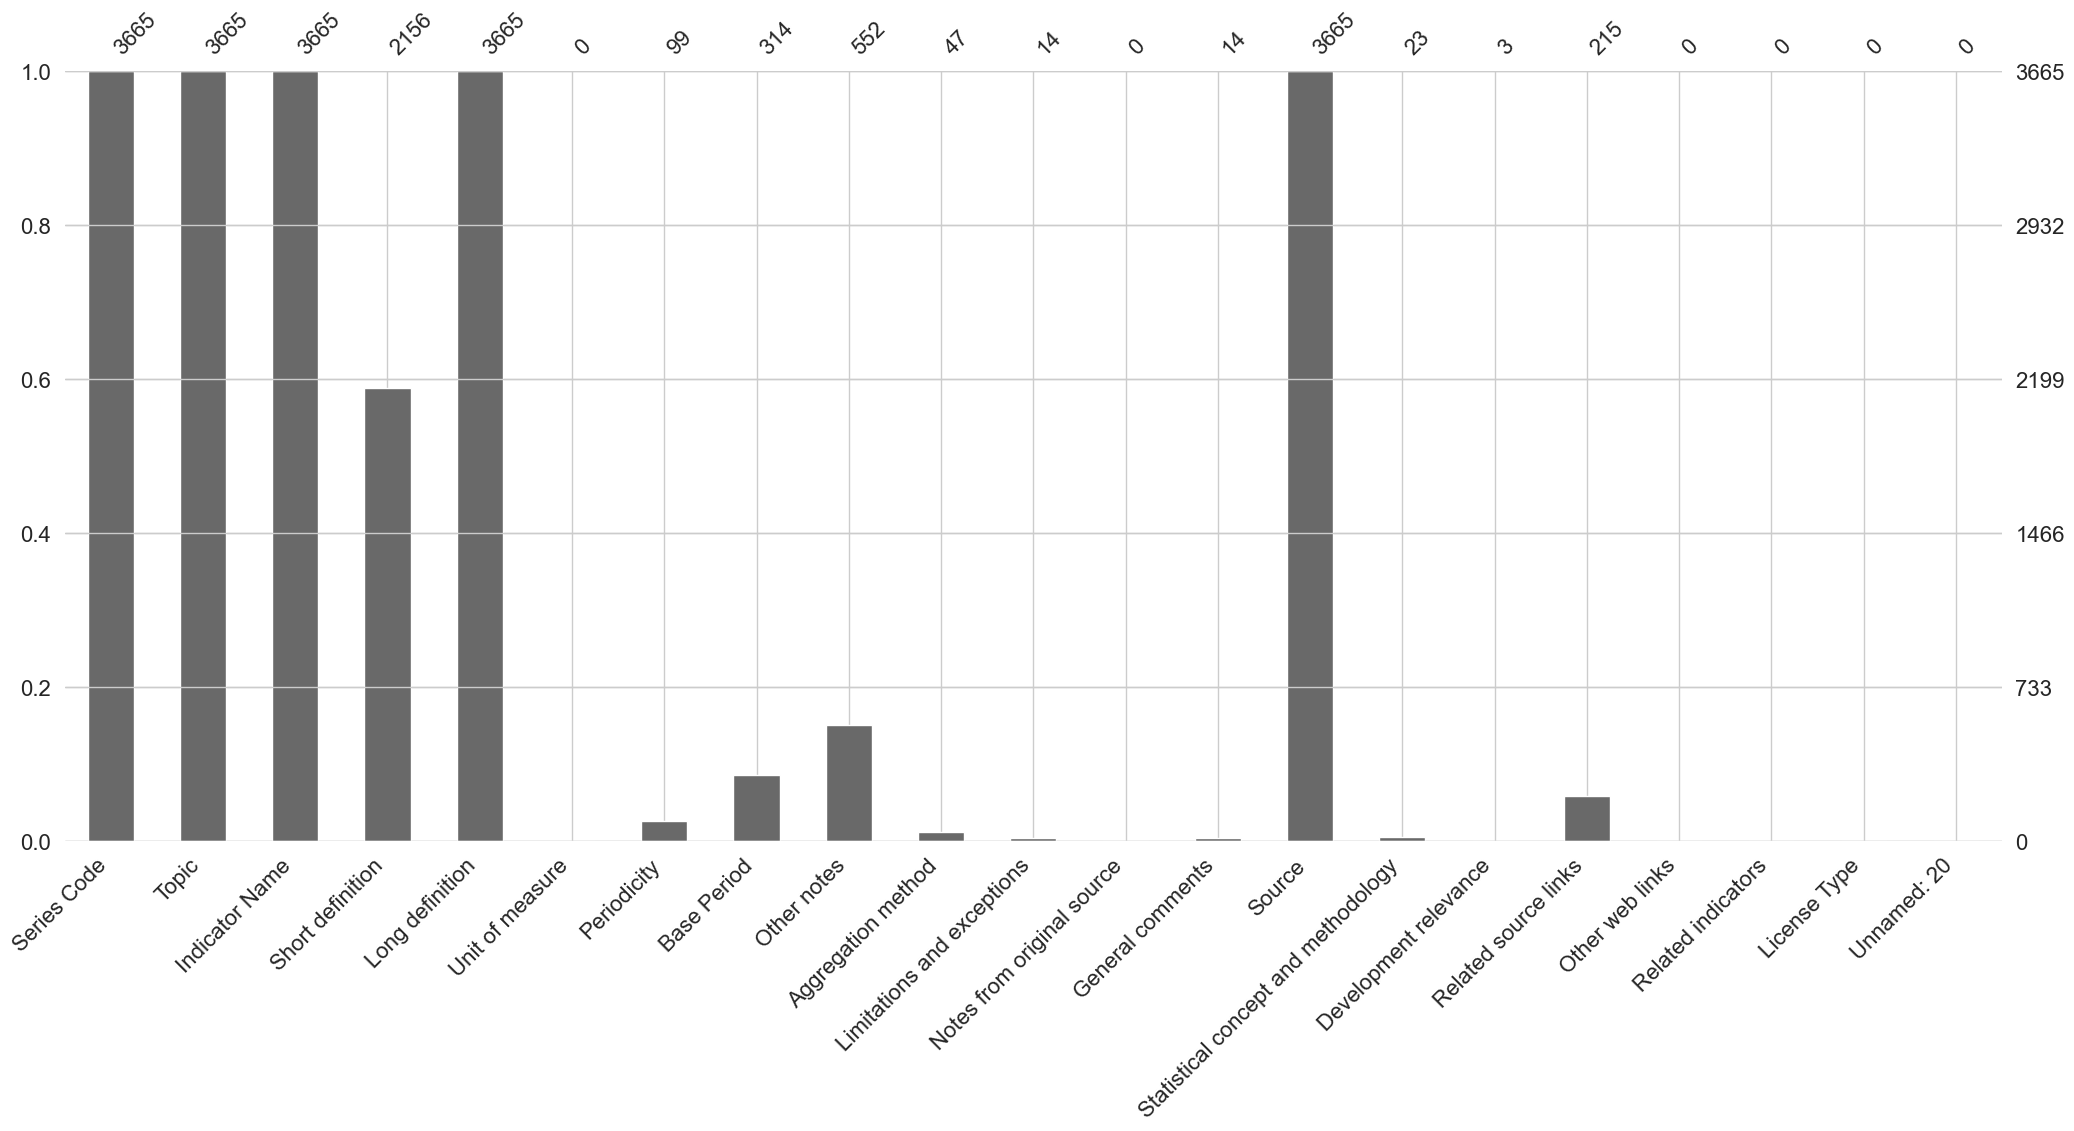

In [76]:
#Vu sur les données par colonne
msno.bar(serie)
plt.show()

In [77]:
#vérification des doublons
serie[serie.duplicated(keep=False)].shape[0]

0

In [78]:
#Nombre de topic
num_topic=serie['Topic'].nunique()
print(f'Le nombre de topic regroupant les indicateurs est de {num_topic}')

Le nombre de topic regroupant les indicateurs est de 37


In [79]:
#Compter le nombre d'indicateurs par thème
indicators_by_topic = serie.groupby('Topic')['Series Code'].count().reset_index(name='Number of Indicators')

In [80]:
#Trier par nombre d'indicateurs en ordre décroissant
indicators_by_topic_sorted = indicators_by_topic.sort_values(by='Number of Indicators', ascending=False)

#Sélectionner les 10 thèmes les plus fréquents
top_10_topics = indicators_by_topic_sorted.head(10)

#Sélectionner les 27 thèmes les moins fréquents
bottom_27_topics = indicators_by_topic_sorted.tail(27)

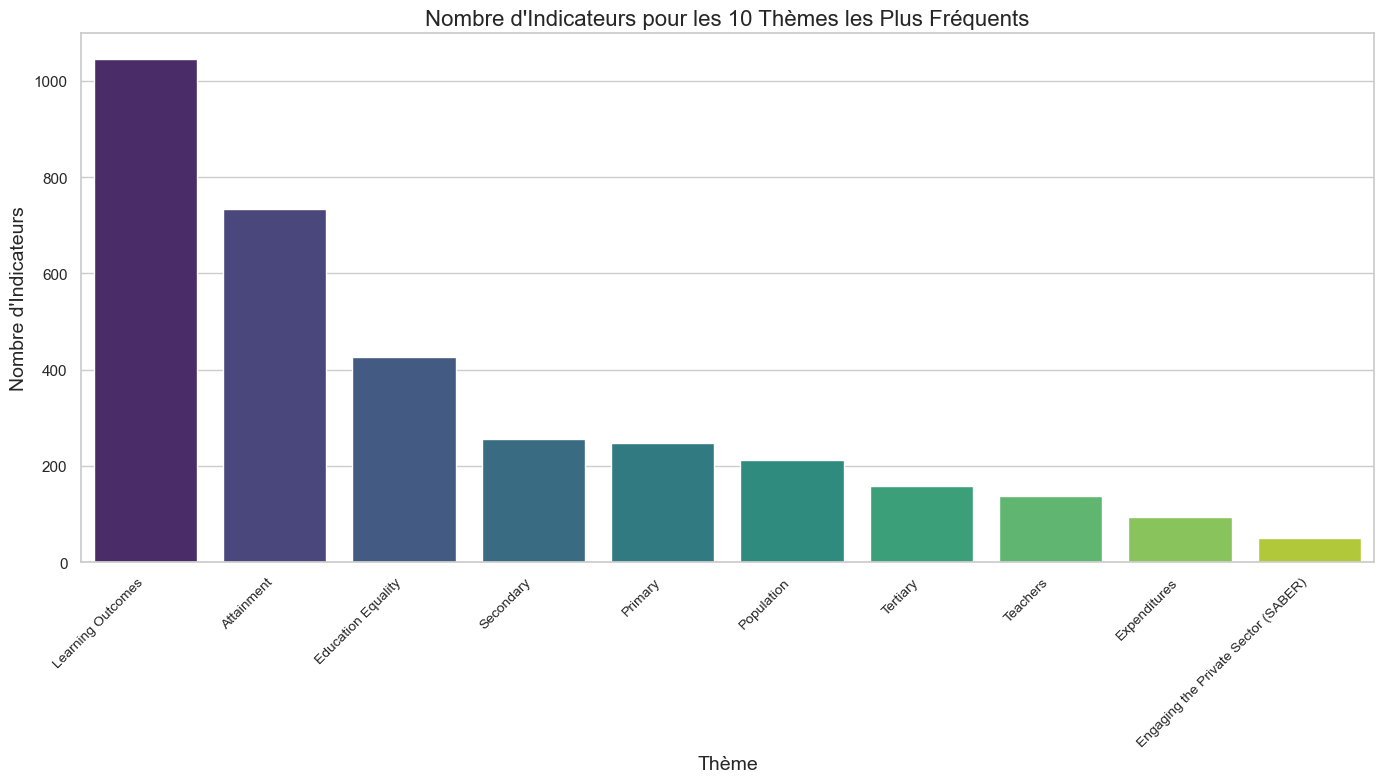

In [81]:
#Représentation graphique
#Configuration du style pour les graphiques
sns.set(style="whitegrid")

#Graphique pour les 10 thèmes les plus fréquents
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_topics, x='Topic', y='Number of Indicators', palette='viridis')
plt.title('Nombre d\'Indicateurs pour les 10 Thèmes les Plus Fréquents', fontsize=16)
plt.xlabel('Thème', fontsize=14)
plt.ylabel('Nombre d\'Indicateurs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

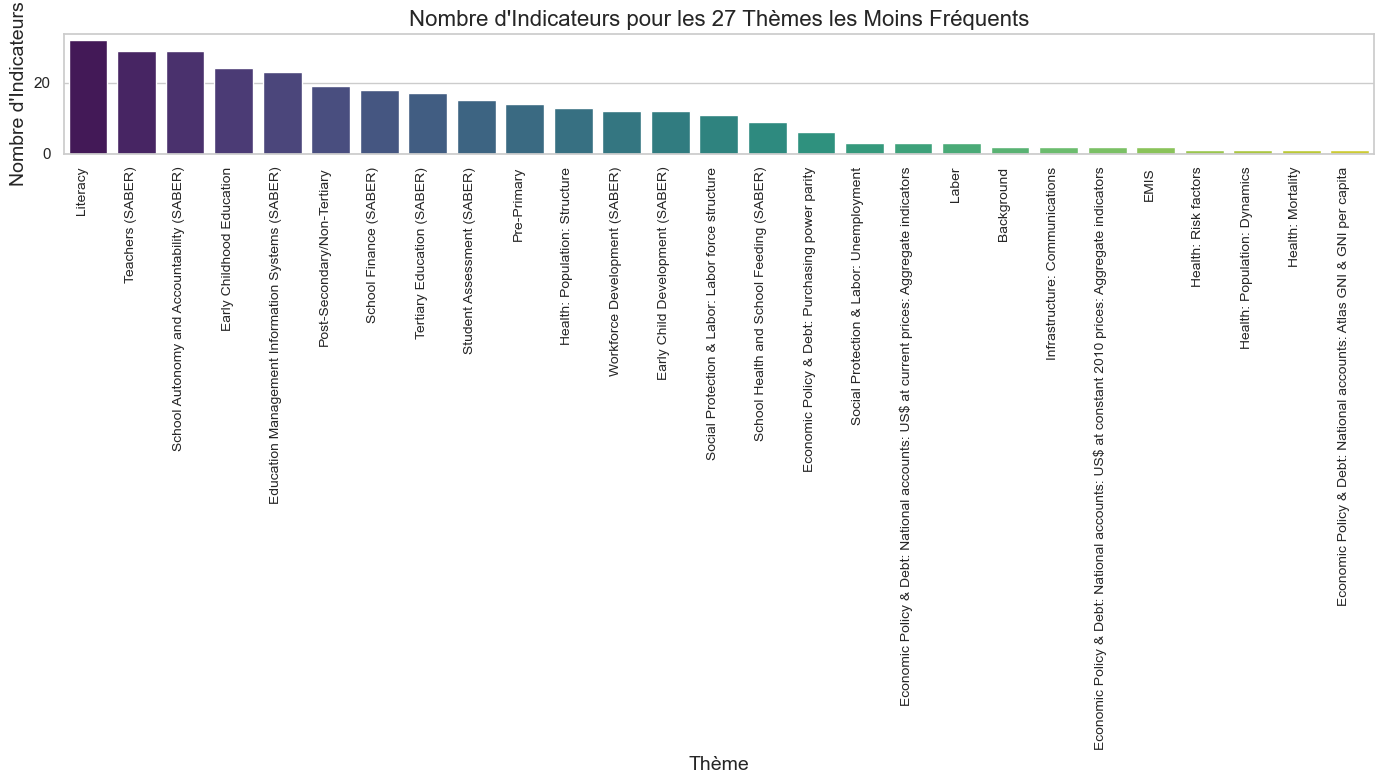

In [82]:
#Graphique pour les 27 thèmes les moins fréquents
plt.figure(figsize=(14, 8))
sns.barplot(data=bottom_27_topics, x='Topic', y='Number of Indicators', palette='viridis')
plt.title('Nombre d\'Indicateurs pour les 27 Thèmes les Moins Fréquents', fontsize=16)
plt.xlabel('Thème', fontsize=14)
plt.ylabel('Nombre d\'Indicateurs', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Le jeu de données permet de connaître le thème des indicateurs, les descriptions longues et les sources. Il donne des informations sur les indicateurs socio-éduco-économique classés en 37 thèmes.

Le jeu de données contient 3665 lignes et 21 colonnes.

Nombre de valeurs manquantes totales 55 203 NaN pour 76 965 données (71.72 %).

Aucun doublon.

Les 5 colonnes principales, le code indicateur, le nom, la description longue et la référence de l’indicateur sont 100% complètes.

Le reste des variables est très peu renseigné (>85% de valeurs manquantes) et 6 variables sont complètement vides (donc à supprimer).

### Conclusion sur les tables
Je vais garder pour l'analyse les tables suivantes : 
    
    Data : Contient la variable 'Country Name' et l'évolution des variables quantitatives des indicateurs par pays et années.
    
    Pays : Contient la variable 'Short Name' et les régions et les groupes de revenus permettant de faire des régroupements.
    
    Série : Contient le thème des indicateurs et leurs descriptions longues qui pourra être utile lors de la sélection des indicateurs pertinents.

# 3.Indicateurs Clés

#### Sélection temporelle
D'après la description des données de data, la décénnie 2010 est la plus fournie en données sur la période 2010-2015.

In [83]:
#Garder uniquement les données de 2010 à 2015
years_to_keep = [str(year) for year in range(2010, 2016)]
cols_to_keep = ['Country Code', 'Indicator Code'] + years_to_keep

data_filtered = data[cols_to_keep]
data_filtered

Country Code        Indicator Code       2010          2011       2012  \
0               ARB            UIS.NERA.2        NaN           NaN        NaN   
1               ARB          UIS.NERA.2.F        NaN           NaN        NaN   
2               ARB        UIS.NERA.2.GPI        NaN           NaN        NaN   
3               ARB          UIS.NERA.2.M        NaN           NaN        NaN   
4               ARB           SE.PRM.TENR  85.211998      85.24514  86.101669   
...             ...                   ...        ...           ...        ...   
886925          ZWE      UIS.LP.AG15T24.M        NaN  166679.00000        NaN   
886926          ZWE     SE.ADT.1524.LT.ZS        NaN      90.93070        NaN   
886927          ZWE  SE.ADT.1524.LT.FE.ZS        NaN      92.12456        NaN   
886928          ZWE  SE.ADT.1524.LT.FM.ZS        NaN       1.02828        NaN   
886929          ZWE  SE.ADT.1524.LT.MA.ZS        NaN      89.59058        NaN   

            2013           2014  2015  
0            NaN            NaN   NaN  
1            NaN            NaN   NaN  
2            NaN            NaN   NaN  
3            NaN            NaN   NaN  
4       85.51194      85.320152   NaN  
...          ...            ...   ...  
886925       NaN  199464.000000   NaN  
886926       NaN      90.428120   NaN  
886927       NaN      93.188350   NaN  
886928       NaN       1.063890   NaN  
886929       NaN      87.591860   NaN  

[886930 rows x 8 columns]

Pour la table pays, les indicateurs que je vais garder sont les colonnes qui concernent les pays, l'économie et la démographie.

In [84]:
#Filtre sur ma table pays
cols_to_keep = ['Country Code', 'Short Name', 'Region', 'Income Group', 'Latest population census',
    'Latest household survey', 'Source of most recent Income and expenditure data',
    'Vital registration complete', 'Latest agricultural census', 'Latest industrial data',
    'Latest trade data', 'Latest water withdrawal data']

pays_filtered = pays[cols_to_keep]
pays_filtered

Country Code    Short Name                      Region  \
0            ABW         Aruba   Latin America & Caribbean   
1            AFG   Afghanistan                  South Asia   
2            AGO        Angola          Sub-Saharan Africa   
3            ALB       Albania       Europe & Central Asia   
4            AND       Andorra       Europe & Central Asia   
..           ...           ...                         ...   
236          XKX        Kosovo       Europe & Central Asia   
237          YEM         Yemen  Middle East & North Africa   
238          ZAF  South Africa          Sub-Saharan Africa   
239          ZMB        Zambia          Sub-Saharan Africa   
240          ZWE      Zimbabwe          Sub-Saharan Africa   

             Income Group                           Latest population census  \
0    High income: nonOECD                                               2010   
1              Low income                                               1979   
2     Upper middle income                                               1970   
3     Upper middle income                                               2011   
4    High income: nonOECD  2011. Population figures compiled from adminis...   
..                    ...                                                ...   
236   Lower middle income                                               2011   
237   Lower middle income                                               2004   
238   Upper middle income                                               2011   
239   Lower middle income                                               2010   
240            Low income                                               2012   

                               Latest household survey  \
0                                                  NaN   
1    Multiple Indicator Cluster Survey (MICS), 2010/11   
2                 Malaria Indicator Survey (MIS), 2011   
3         Demographic and Health Survey (DHS), 2008/09   
4                                                  NaN   
..                                                 ...   
236                                                NaN   
237          Demographic and Health Survey (DHS), 2013   
238  Demographic and Health Survey (DHS), 2003; Wor...   
239          Demographic and Health Survey (DHS), 2013   
240       Demographic and Health Survey (DHS), 2010/11   

     Source of most recent Income and expenditure data  \
0                                                  NaN   
1              Integrated household survey (IHS), 2008   
2              Integrated household survey (IHS), 2008   
3    Living Standards Measurement Study Survey (LSM...   
4                                                  NaN   
..                                                 ...   
236            Integrated household survey (IHS), 2011   
237     Expenditure survey/budget survey (ES/BS), 2005   
238     Expenditure survey/budget survey (ES/BS), 2010   
239            Integrated household survey (IHS), 2010   
240         Integrated household survey (IHS), 2011/12   

    Vital registration complete            Latest agricultural census  \
0                           Yes                                   NaN   
1                           NaN                               2013/14   
2                           NaN                                  2015   
3                           Yes                                  2012   
4                           Yes                                   NaN   
..                          ...                                   ...   
236                         NaN                                   NaN   
237                         NaN                                   NaN   
238                         NaN                                  2007   
239                         NaN  2010. Population and Housing Census.   
240                         NaN                                   NaN   

     Latest industrial data

La cible de l'entreprise est :

    Tranche d'âge de 15 - 24 
    Les étudiants scolarisés en lycée et universités
    Le niveau de vie des habitants
    Les moyens de communication (accès à l'électricité, accès au réseau internet, possession d'un ordinateur personnel)

Les différents groupes d'indicateur à étudier sont :

    SE : Social Education
    SP : Social Population
    IT : Infrastructure
    NY : National Accounts, produits intérieurs et nationaux
    EG : Energie

Les différents mots clés à rechercher :

    15 : pour la cible de la population des 15-19 ans
    20 : pour la cible de la population des 20-24 ans
    SEC : pour les regroupements par lycéens
    TER : pour les regroupements par étudiants de l'enseignement supérieur
    IT : pour l'accès aux infrastructures techniques
    EG : pour l'accès aux informations sur l'énergie

In [85]:
#Calcul du taux de remplissage
def taux_remplissage(data_filtered):
    #Nombre total de colonnes d'années
    total_years = len(data_filtered.columns) - 2  #pas d'utilisation de ces deux colonnes 'Country Code' et 'Indicator Code'
    
    #Calcul du nombre de valeurs non manquantes par ligne
    non_na_counts = data_filtered.iloc[:, 2:].notna().sum(axis=1)
    
    #Calcul du taux de remplissage
    taux = (non_na_counts / total_years) * 100
    return taux

#Utilisation de .loc pour éviter l'avertissement SettingWithCopyWarning
data_filtered.loc[:, 'Taux de Remplissage (%)'] = taux_remplissage(data_filtered)
data_filtered

C:\Users\jogrv\AppData\Local\Temp\ipykernel_14512\3819881528.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, 'Taux de Remplissage (%)'] = taux_remplissage(data_filtered)


Country Code        Indicator Code       2010          2011       2012  \
0               ARB            UIS.NERA.2        NaN           NaN        NaN   
1               ARB          UIS.NERA.2.F        NaN           NaN        NaN   
2               ARB        UIS.NERA.2.GPI        NaN           NaN        NaN   
3               ARB          UIS.NERA.2.M        NaN           NaN        NaN   
4               ARB           SE.PRM.TENR  85.211998      85.24514  86.101669   
...             ...                   ...        ...           ...        ...   
886925          ZWE      UIS.LP.AG15T24.M        NaN  166679.00000        NaN   
886926          ZWE     SE.ADT.1524.LT.ZS        NaN      90.93070        NaN   
886927          ZWE  SE.ADT.1524.LT.FE.ZS        NaN      92.12456        NaN   
886928          ZWE  SE.ADT.1524.LT.FM.ZS        NaN       1.02828        NaN   
886929          ZWE  SE.ADT.1524.LT.MA.ZS        NaN      89.59058        NaN   

            2013           2014  2015  Taux de Remplissage (%)  
0            NaN            NaN   NaN                 0.000000  
1            NaN            NaN   NaN                 0.000000  
2            NaN            NaN   NaN                 0.000000  
3            NaN            NaN   NaN                 0.000000  
4       85.51194      85.320152   NaN                83.333333  
...          ...            ...   ...                      ...  
886925       NaN  199464.000000   NaN                33.333333  
886926       NaN      90.428120   NaN                33.333333  
886927       NaN      93.188350   NaN                33.333333  
886928       NaN       1.063890   NaN                33.333333  
886929       NaN      87.591860   NaN                33.333333  

[886930 rows x 9 columns]

In [86]:
#Filtrer pour ne garder que les indicateurs avec un taux de remplissage > 50%
data_filtered_2 = data_filtered[data_filtered['Taux de Remplissage (%)'] > 50]
data_filtered_2

Country Code     Indicator Code          2010          2011  \
4               ARB        SE.PRM.TENR     85.211998     85.245140   
5               ARB     SE.PRM.TENR.FE     82.871651     82.861389   
6               ARB     UIS.NERA.1.GPI      0.947620      0.946700   
7               ARB     SE.PRM.TENR.MA     87.452583     87.526520   
12              ARB         UIS.NIRA.1     76.197044     76.474968   
...             ...                ...           ...           ...   
886252          ZWE     SE.SEC.DURS.UP      4.000000      4.000000   
886363          ZWE    UIS.OE.56.40510  25236.000000  28700.000000   
886611          ZWE  SL.UEM.TOTL.FE.ZS      4.600000      6.000000   
886612          ZWE  SL.UEM.TOTL.MA.ZS      7.700000      4.800000   
886613          ZWE     SL.UEM.TOTL.ZS      6.200000      5.400000   

                2012          2013       2014  2015  Taux de Remplissage (%)  
4          86.101669     85.511940  85.320152   NaN                83.333333  
5          84.401413     83.914032  83.820831   NaN                83.333333  
6           0.962080      0.964090   0.966200   NaN                83.333333  
7          87.728172     87.039879  86.753387   NaN                83.333333  
12         77.319366     76.566711  76.620567   NaN                83.333333  
...              ...           ...        ...   ...                      ...  
886252      4.000000      4.000000   4.000000   4.0               100.000000  
886363  16012.000000  15885.000000        NaN   NaN                66.666667  
886611      5.900000      5.800000   5.800000   5.1               100.000000  
886612      4.700000      4.600000   4.500000   5.1               100.000000  
886613      5.300000      5.200000   5.100000   5.1               100.000000  

[114776 rows x 9 columns]

In [87]:
#Listes de mots-clés pour filtrer les indicateurs et d'autres critères
indicateurs_cle = ['SE', 'SP', 'IT', 'NY', 'EG']
mots_cles = ['15', '20', 'SEC', 'TER', 'IT', 'EG', 'NY']

#Fonction pour vérifier si une chaîne contient l'un des mots-clés
def contains_keywords(s, keywords):
    return any(keyword in str(s) for keyword in keywords)

#Filtrer les lignes en fonction des mots-clés dans 'Indicator Code'
data_filtered_31 = data_filtered_2[data_filtered_2['Indicator Code'].apply(lambda x: contains_keywords(x, indicateurs_cle))]

#Filtrer les lignes supplémentaires basées sur la présence des mots-clés dans n'importe quelle colonne
data_filtered_32 = data_filtered_31[data_filtered_31.apply(lambda row: row.astype(str).apply(lambda cell: contains_keywords(cell, mots_cles)).any(), axis=1)]

#Agréger les données par 'Country Code' et 'Indicator Code' tout en conservant chaque indicateur
aggregated_df = data_filtered_32.groupby(['Country Code', 'Indicator Code']).mean().reset_index()

#Affichage des résultats agrégés par indicateur clé
for indicator in aggregated_df['Indicator Code'].unique():
    print(f"\nRésultats pour l'indicateur clé {indicator}:")
    indicator_df = aggregated_df[aggregated_df['Indicator Code'] == indicator]
    print(indicator_df)


Résultats pour l'indicateur clé IT.NET.USER.P2:
      Country Code  Indicator Code   2010    2011       2012  2013      2014  \
0              ABW  IT.NET.USER.P2  62.00  69.000  74.000000  78.9  83.78000   
122            AFG  IT.NET.USER.P2   4.00   5.000   5.454545   5.9   7.00000   
302            AGO  IT.NET.USER.P2   2.80   3.100   6.500000   8.9  10.20000   
455            ALB  IT.NET.USER.P2  45.00  49.000  54.655959  57.2  60.10000   
684            AND  IT.NET.USER.P2  81.00  81.000  86.434425  94.0  95.90000   
...            ...             ...    ...     ...        ...   ...       ...   
43073          WSM  IT.NET.USER.P2   7.00  11.000  12.922490  15.3  21.20000   
43260          YEM  IT.NET.USER.P2  12.35  14.905  17.446500  20.0  22.55000   
43431          ZAF  IT.NET.USER.P2  24.00  33.970  41.000000  46.5  49.00000   
43632          ZMB  IT.NET.USER.P2  10.00  11.500  13.468200  15.4  19.00000   
43804          ZWE  IT.NET.USER.P2   6.40   8.400  12.000000  15.5  16.

      Country Code  Indicator Code         2010         2011         2012  \
16             ABW  SE.SEC.ENRL.GC       6200.0       6281.0       7289.0   
155            AFG  SE.SEC.ENRL.GC    2032719.0    2190878.0    2392465.0   
520            ALB  SE.SEC.ENRL.GC     335865.0     336461.0     330089.0   
710            AND  SE.SEC.ENRL.GC       3692.0       3789.0       3883.0   
828            ARB  SE.SEC.ENRL.GC   27483194.0   28373840.0   28765656.0   
...            ...             ...          ...          ...          ...   
43001          WLD  SE.SEC.ENRL.GC  486473952.0  494562496.0  501162048.0   
43120          WSM  SE.SEC.ENRL.GC      25998.0      25640.0      25564.0   
43288          YEM  SE.SEC.ENRL.GC    1550587.0    1631391.0    1662721.0   
43476          ZAF  SE.SEC.ENRL.GC    4471468.0    4534439.0    4597285.0   
43668          ZMB  SE.SEC.ENRL.GC     747935.0     695355.0     743995.0   

              2013         2014         2015  Taux de Remplissage (%)  
16 

      Country Code        Indicator Code       2010       2011       2012  \
33             ABW  SE.TER.GRAD.FE.SS.ZS  72.549019  65.400841  66.063347   
967            ARE  SE.TER.GRAD.FE.SS.ZS        NaN  53.256001  52.895618   
1212           ARG  SE.TER.GRAD.FE.SS.ZS  61.765900  56.294399  62.474251   
2048           AUT  SE.TER.GRAD.FE.SS.ZS  55.686432  55.679131  57.599400   
2352           AZE  SE.TER.GRAD.FE.SS.ZS  25.646111  26.212589  25.683300   
2878           BEL  SE.TER.GRAD.FE.SS.ZS  58.155602  58.671242  59.064751   
3954           BGR  SE.TER.GRAD.FE.SS.ZS  66.759529  67.333153  66.816429   
4708           BLR  SE.TER.GRAD.FE.SS.ZS  50.379631  75.489578  76.686790   
5134           BMU  SE.TER.GRAD.FE.SS.ZS  83.333328  83.333328  88.095238   
5499           BRA  SE.TER.GRAD.FE.SS.ZS  56.720131  57.102741  57.776821   
5907           BRN  SE.TER.GRAD.FE.SS.ZS  67.512688  63.846149  61.823360   
6754           CHE  SE.TER.GRAD.FE.SS.ZS  48.140759  47.478951        NaN   

      Country Code     Indicator Code       2010       2011       2012  \
50             ABW  SP.POP.0406.MA.UN     2221.0     2192.0     2165.0   
186            AFG  SP.POP.0406.MA.UN  1502827.0  1551078.0  1601016.0   
323            AGO  SP.POP.0406.MA.UN   890633.0   915345.0   938566.0   
979            ARE  SP.POP.0406.MA.UN   101461.0   104938.0   108578.0   
1772           AUS  SP.POP.0406.MA.UN   396256.0   398578.0   401227.0   
...            ...                ...        ...        ...        ...   
40843          TZA  SP.POP.0406.MA.UN  2091148.0  2122327.0  2141669.0   
41023          UGA  SP.POP.0406.MA.UN  1758130.0  1815132.0  1874858.0   
42072          UZB  SP.POP.0406.MA.UN   875076.0   885570.0   891272.0   
43308          YEM  SP.POP.0406.MA.UN  1118065.0  1150131.0  1185965.0   
43499          ZAF  SP.POP.0406.MA.UN  1574152.0  1569196.0  1560429.0   

            2013       2014       2015  Taux de Remplissage (%)  
50        2134.0     2096.0     2051.0       

      Country Code     Indicator Code       2010       2011       2012  \
63             ABW  SP.POP.1015.MA.UN     4468.0     4465.0     4472.0   
206            AFG  SP.POP.1015.MA.UN  2430888.0  2507019.0  2577308.0   
350            AGO  SP.POP.1015.MA.UN  1361946.0  1397176.0  1437457.0   
583            ALB  SP.POP.1015.MA.UN   167021.0   163378.0   160238.0   
1012           ARE  SP.POP.1015.MA.UN   169224.0   173438.0   177197.0   
...            ...                ...        ...        ...        ...   
43157          WSM  SP.POP.1015.MA.UN    15998.0    16086.0    16032.0   
43334          YEM  SP.POP.1015.MA.UN  1926191.0  1954469.0  1982892.0   
43522          ZAF  SP.POP.1015.MA.UN  3057674.0  3066896.0  3077196.0   
43699          ZMB  SP.POP.1015.MA.UN  1012709.0  1033097.0  1051642.0   
43887          ZWE  SP.POP.1015.MA.UN  1019975.0  1010631.0  1001023.0   

            2013       2014       2015  Taux de Remplissage (%)  
63        4482.0     4490.0     4485.0       

      Country Code     Indicator Code       2010       2011       2012  \
86             ABW  SP.POP.AG08.FE.UN      726.0      721.0      719.0   
250            AFG  SP.POP.AG08.FE.UN   424592.0   437705.0   450915.0   
1063           ARE  SP.POP.AG08.FE.UN    29117.0    30205.0    31389.0   
1529           ARM  SP.POP.AG08.FE.UN    14747.0    14637.0    14803.0   
3233           BEN  SP.POP.AG08.FE.UN   133251.0   136817.0   140480.0   
...            ...                ...        ...        ...        ...   
40701          TUR  SP.POP.AG08.FE.UN   655214.0   652392.0   652098.0   
41872          USA  SP.POP.AG08.FE.UN  2028010.0  2043096.0  2060143.0   
42138          UZB  SP.POP.AG08.FE.UN   271560.0   272937.0   274886.0   
42312          VCT  SP.POP.AG08.FE.UN     1115.0     1121.0     1125.0   
43206          WSM  SP.POP.AG08.FE.UN     2456.0     2406.0     2345.0   

            2013  2014       2015  Taux de Remplissage (%)  
86         715.0   NaN      699.0                8

      Country Code     Indicator Code        2010        2011        2012  \
105            ABW  SP.SEC.LTOT.FE.IN      1498.0      1487.0      1477.0   
284            AFG  SP.SEC.LTOT.FE.IN   1007190.0   1059805.0   1111348.0   
443            AGO  SP.SEC.LTOT.FE.IN    783556.0    811912.0    842283.0   
655            ALB  SP.SEC.LTOT.FE.IN    108210.0    104917.0    100078.0   
880            ARB  SP.SEC.LTOT.FE.IN  11125445.0  11117482.0  11132880.0   
...            ...                ...         ...         ...         ...   
43235          WSM  SP.SEC.LTOT.FE.IN      4253.0      4260.0      4284.0   
43419          YEM  SP.SEC.LTOT.FE.IN    888850.0    887779.0    890112.0   
43598          ZAF  SP.SEC.LTOT.FE.IN    978474.0    971663.0    966222.0   
43792          ZMB  SP.SEC.LTOT.FE.IN    328052.0    337134.0    347026.0   
43961          ZWE  SP.SEC.LTOT.FE.IN    339374.0    338594.0    339655.0   

             2013        2014       2015  Taux de Remplissage (%)  
105    

      Country Code     Indicator Code          2010          2011  \
125            AFG  NY.GDP.MKTP.PP.CD  4.555511e+10  4.933825e+10   
305            AGO  NY.GDP.MKTP.PP.CD  1.349769e+11  1.431621e+11   
458            ALB  NY.GDP.MKTP.PP.CD  2.810079e+10  2.965536e+10   
766            ARB  NY.GDP.MKTP.PP.CD  5.022945e+12  5.265230e+12   
897            ARE  NY.GDP.MKTP.PP.CD  4.665913e+11  5.065074e+11   
...            ...                ...           ...           ...   
43248          XKX  NY.GDP.MKTP.PP.CD  1.370223e+10  1.463119e+10   
43263          YEM  NY.GDP.MKTP.PP.CD  1.035900e+11  9.228542e+10   
43434          ZAF  NY.GDP.MKTP.PP.CD  6.008235e+11  6.333678e+11   
43635          ZMB  NY.GDP.MKTP.PP.CD  4.449935e+10  4.794544e+10   
43807          ZWE  NY.GDP.MKTP.PP.CD  2.035533e+10  2.398453e+10   

               2012          2013          2014          2015  \
125    5.750013e+10  5.957345e+10  6.143594e+10  6.291767e+10   
305    1.533158e+11  1.664069e+11  1.7752

      Country Code  Indicator Code        2010         2011        2012  \
159            AFG  SE.SEC.ENRL.VO         NaN     18085.00     23419.0   
525            ALB  SE.SEC.ENRL.VO     20006.0     18697.00     19180.0   
714            AND  SE.SEC.ENRL.VO       367.0       370.00       325.0   
833            ARB  SE.SEC.ENRL.VO   2651181.0   2925945.75   3045490.0   
1425           ARM  SE.SEC.ENRL.VO     14638.0     21659.00         NaN   
...            ...             ...         ...          ...         ...   
42435          VEN  SE.SEC.ENRL.VO    122027.0    120455.00    126014.0   
42570          VGB  SE.SEC.ENRL.VO        88.0        88.00        86.0   
43006          WLD  SE.SEC.ENRL.VO  58645492.0  59512580.00  59905660.0   
43292          YEM  SE.SEC.ENRL.VO     10750.0     11725.00     12229.0   
43480          ZAF  SE.SEC.ENRL.VO    218132.0    221672.00    246515.0   

              2013        2014        2015  Taux de Remplissage (%)  
159       29520.00     25019.

      Country Code     Indicator Code       2010       2011       2012  \
193            AFG  SP.POP.0609.MA.UN  1849129.0  1906686.0  1964965.0   
1235           ARG  SP.POP.0609.MA.UN  1357650.0  1359630.0  1366024.0   
1777           AUS  SP.POP.0609.MA.UN   531964.0   532765.0   534517.0   
2088           AUT  SP.POP.0609.MA.UN   168966.0   167615.0   166506.0   
2636           BDI  SP.POP.0609.MA.UN   515106.0   539969.0   568394.0   
...            ...                ...        ...        ...        ...   
41577          URY  SP.POP.0609.MA.UN   103617.0   102800.0   102027.0   
42080          UZB  SP.POP.0609.MA.UN  1131315.0  1138670.0  1146689.0   
42260          VCT  SP.POP.0609.MA.UN     4580.0     4604.0     4618.0   
43316          YEM  SP.POP.0609.MA.UN  1401456.0  1436306.0  1476382.0   
43504          ZAF  SP.POP.0609.MA.UN  2086392.0  2085508.0  2081251.0   

            2013       2014       2015  Taux de Remplissage (%)  
193    2023917.0  2083434.0  2143449.0       

      Country Code     Indicator Code       2010       2011       2012  \
225            AFG  SP.POP.1316.FE.UN  1412988.0  1461343.0  1506728.0   
376            AGO  SP.POP.1316.FE.UN   873175.0   892801.0   913334.0   
3201           BEN  SP.POP.1316.FE.UN   448579.0   460209.0   471905.0   
4357           BHS  SP.POP.1316.FE.UN    12348.0    12291.0    12148.0   
4764           BLR  SP.POP.1316.FE.UN   203480.0   193581.0   186331.0   
...            ...                ...        ...        ...        ...   
41618          URY  SP.POP.1316.FE.UN   104103.0   103443.0   102589.0   
41837          USA  SP.POP.1316.FE.UN  8464526.0  8432681.0  8400726.0   
42725          VNM  SP.POP.1316.FE.UN  3337405.0  3253929.0  3178331.0   
42875          VUT  SP.POP.1316.FE.UN    10711.0    10861.0    11007.0   
43542          ZAF  SP.POP.1316.FE.UN  2009988.0  2015522.0  2019201.0   

            2013       2014       2015  Taux de Remplissage (%)  
225    1549764.0  1591507.0  1632848.0       

      Country Code     Indicator Code       2010       2011       2012  \
248            AFG  SP.POP.AG05.FE.UN   468607.0   483684.0   499348.0   
400            AGO  SP.POP.AG05.FE.UN   298387.0   306761.0   314592.0   
1524           ARM  SP.POP.AG05.FE.UN    14621.0    15074.0    15676.0   
1825           AUS  SP.POP.AG05.FE.UN   125352.0   126125.0   127020.0   
2697           BDI  SP.POP.AG05.FE.UN   146110.0   154040.0   162691.0   
...            ...                ...        ...        ...        ...   
41866          USA  SP.POP.AG05.FE.UN  2057962.0  2078899.0  2095939.0   
42308          VCT  SP.POP.AG05.FE.UN     1171.0     1174.0     1169.0   
43202          WSM  SP.POP.AG05.FE.UN     2307.0     2236.0     2172.0   
43564          ZAF  SP.POP.AG05.FE.UN   515946.0   514089.0   510917.0   
43750          ZMB  SP.POP.AG05.FE.UN   194285.0   196017.0   197786.0   

            2013  2014       2015  Taux de Remplissage (%)  
248     515353.0   NaN   547093.0                8

      Country Code     Indicator Code          2010          2011  \
276            AFG  SP.POP.TOTL.MA.IN  1.479769e+07  1.526460e+07   
434            AGO  SP.POP.TOTL.MA.IN  1.143312e+07  1.185250e+07   
651            ALB  SP.POP.TOTL.MA.IN  1.461599e+06  1.459381e+06   
874            ARB  SP.POP.TOTL.MA.IN  1.793340e+08  1.833720e+08   
1087           ARE  SP.POP.TOTL.MA.IN  6.161490e+06  6.461097e+06   
...            ...                ...           ...           ...   
42528          VEN  SP.POP.TOTL.MA.IN  1.449042e+07  1.469976e+07   
43049          WLD  SP.POP.TOTL.MA.IN  3.492871e+09  3.534706e+09   
43593          ZAF  SP.POP.TOTL.MA.IN  2.503202e+07  2.540222e+07   
43784          ZMB  SP.POP.TOTL.MA.IN  6.864295e+06  7.071595e+06   
43956          ZWE  SP.POP.TOTL.MA.IN  6.859206e+06  7.003571e+06   

               2012          2013          2014          2015  \
276    1.578430e+07  1.633341e+07  1.687693e+07  1.738962e+07   
434    1.228637e+07  1.273276e+07  1.3189

      Country Code     Indicator Code       2010       2011       2012  \
355            AGO  SP.POP.1017.FE.UN  1793656.0  1837095.0  1884002.0   
586            ALB  SP.POP.1017.FE.UN   215992.0   210351.0   205197.0   
1016           ARE  SP.POP.1017.FE.UN   206970.0   212325.0   217570.0   
1472           ARM  SP.POP.1017.FE.UN   162566.0   151407.0   141524.0   
1790           AUS  SP.POP.1017.FE.UN  1074409.0  1069045.0  1063397.0   
...            ...                ...        ...        ...        ...   
42478          VEN  SP.POP.1017.FE.UN  2159163.0  2166398.0  2176132.0   
42706          VNM  SP.POP.1017.FE.UN  6507155.0  6379291.0  6283376.0   
42858          VUT  SP.POP.1017.FE.UN    21729.0    22017.0    22290.0   
43159          WSM  SP.POP.1017.FE.UN    18885.0    19111.0    19234.0   
43525          ZAF  SP.POP.1017.FE.UN  4027120.0  4037208.0  4045211.0   

            2013       2014       2015  Taux de Remplissage (%)  
355    1934203.0  1987210.0  2042588.0       

      Country Code     Indicator Code       2010       2011       2012  \
399            AGO  SP.POP.AG04.TO.UN   620920.0   637742.0   653438.0   
1059           ARE  SP.POP.AG04.TO.UN    67804.0    69917.0    72051.0   
2430           AZE  SP.POP.AG04.TO.UN   108397.0   113389.0   120133.0   
2967           BEL  SP.POP.AG04.TO.UN   112207.0   111800.0   111219.0   
3225           BEN  SP.POP.AG04.TO.UN   305498.0   312841.0   320107.0   
...            ...                ...        ...        ...        ...   
40694          TUR  SP.POP.AG04.TO.UN  1306761.0  1310143.0  1320878.0   
41089          UGA  SP.POP.AG04.TO.UN  1209398.0  1248043.0  1288077.0   
42137          UZB  SP.POP.AG04.TO.UN   580180.0   587407.0   590858.0   
42507          VEN  SP.POP.AG04.TO.UN   581511.0   584279.0   586563.0   
42896          VUT  SP.POP.AG04.TO.UN     6205.0     6268.0     6340.0   

            2013  2014       2015  Taux de Remplissage (%)  
399     668404.0   NaN   698548.0                8

      Country Code     Indicator Code       2010       2011       2012  \
483            ALB  SE.PRM.DROP.FE.ZS   2.114400   0.855670   0.162730   
796            ARB  SE.PRM.DROP.FE.ZS  16.331829  16.197809  15.881340   
1405           ARM  SE.PRM.DROP.FE.ZS   4.011620   5.733240        NaN   
1969           AUT  SE.PRM.DROP.FE.ZS   0.000000   0.000000   0.000000   
3350           BFA  SE.PRM.DROP.FE.ZS        NaN  27.214621  25.429140   
...            ...                ...        ...        ...        ...   
37811          SVN  SE.PRM.DROP.FE.ZS   1.922080   0.910700   0.479710   
39081          TGO  SE.PRM.DROP.FE.ZS  52.262840  35.800999  39.326099   
39878          TLS  SE.PRM.DROP.FE.ZS  14.864860  19.997150  19.973431   
40973          UGA  SE.PRM.DROP.FE.ZS  75.494019  63.388271  65.184402   
41173          UKR  SE.PRM.DROP.FE.ZS   1.374070   1.447010   0.766820   

            2013       2014  2015  Taux de Remplissage (%)  
483     0.853940   3.610070   NaN                8

      Country Code        Indicator Code        2010        2011        2012  \
510            ALB  SE.SEC.CMPT.LO.FE.ZS   96.414902   96.094978   94.515549   
821            ARB  SE.SEC.CMPT.LO.FE.ZS   64.527809   66.653389   70.929871   
942            ARE  SE.SEC.CMPT.LO.FE.ZS   69.332863   76.082397   73.267647   
1167           ARG  SE.SEC.CMPT.LO.FE.ZS   85.759079   89.194008   89.806870   
1626           ATG  SE.SEC.CMPT.LO.FE.ZS   99.260170         NaN  103.914139   
...            ...                   ...         ...         ...         ...   
42222          VCT  SE.SEC.CMPT.LO.FE.ZS  115.384621   89.961761   93.079918   
42421          VEN  SE.SEC.CMPT.LO.FE.ZS   80.983681   80.958122   82.638222   
42994          WLD  SE.SEC.CMPT.LO.FE.ZS   73.052170   74.595871   75.600304   
43111          WSM  SE.SEC.CMPT.LO.FE.ZS  109.815079  103.218170  103.107338   
43662          ZMB  SE.SEC.CMPT.LO.FE.ZS   55.669910   51.953892   53.886459   

            2013       2014        2015

      Country Code     Indicator Code      2010      2011      2012      2013  \
628            ALB  SP.POP.AG06.FE.UN   23859.0   23916.0   24020.0   24141.0   
1060           ARE  SP.POP.AG06.FE.UN   30860.0   32008.0   33265.0   34505.0   
1526           ARM  SP.POP.AG06.FE.UN   14456.0   14773.0   15294.0   15913.0   
2699           BDI  SP.POP.AG06.FE.UN  138081.0  145444.0  153665.0  162374.0   
3229           BEN  SP.POP.AG06.FE.UN  141117.0  144778.0  148489.0  152174.0   
...            ...                ...       ...       ...       ...       ...   
43204          WSM  SP.POP.AG06.FE.UN    2361.0    2293.0    2229.0    2167.0   
43384          YEM  SP.POP.AG06.FE.UN  349309.0  359064.0  370189.0  382086.0   
43566          ZAF  SP.POP.AG06.FE.UN  515803.0  514542.0  512056.0  508643.0   
43753          ZMB  SP.POP.AG06.FE.UN  190772.0  192639.0  194469.0  196320.0   
43932          ZWE  SP.POP.AG06.FE.UN  165175.0  165417.0  166264.0  167550.0   

       2014      2015  Taux

      Country Code Indicator Code       2010       2011       2012      2013  \
682            ALB  UIS.MSEP.56.F        NaN   0.657140   0.911850   1.24136   
1573           ARM  UIS.MSEP.56.F   2.204990   2.528270   2.857520   2.75400   
1895           AUS  UIS.MSEP.56.F  18.343109  17.156111  15.619000  15.10289   
2206           AUT  UIS.MSEP.56.F  19.888330  19.587839  15.325160  16.72035   
2494           AZE  UIS.MSEP.56.F   1.234800   1.261310   1.207820   0.99954   
3036           BEL  UIS.MSEP.56.F   8.162470   8.197950   8.945180  10.31014   
4108           BGR  UIS.MSEP.56.F   2.346640   2.370640   2.616350   2.73450   
4597           BIH  UIS.MSEP.56.F        NaN   4.463480   5.424920   6.03700   
5164           BMU  UIS.MSEP.56.F   6.088990   7.005650   6.713780       NaN   
6030           BRN  UIS.MSEP.56.F   2.790700   3.759770   3.236430       NaN   
7435           CHN  UIS.MSEP.56.F   0.209980   0.229450   0.245370   0.25092   
9688           CYP  UIS.MSEP.56.F  16.33

      Country Code             Indicator Code       2010       2011  \
756            AND  UIS.XSPENDP.3.FDPUB.FNCUR  97.533119  98.350777   
1907           AUS  UIS.XSPENDP.3.FDPUB.FNCUR  87.151527  90.725479   
8520           COL  UIS.XSPENDP.3.FDPUB.FNCUR  98.591553  99.101067   
9152           CRI  UIS.XSPENDP.3.FDPUB.FNCUR  95.171021  99.501167   
11894          ECU  UIS.XSPENDP.3.FDPUB.FNCUR  97.976151  49.078491   
13302          ETH  UIS.XSPENDP.3.FDPUB.FNCUR  68.815208  67.095818   
15262          GIN  UIS.XSPENDP.3.FDPUB.FNCUR  98.602013  97.082047   
15479          GMB  UIS.XSPENDP.3.FDPUB.FNCUR  70.952980  80.305641   
16426          GTM  UIS.XSPENDP.3.FDPUB.FNCUR  99.821777  99.951202   
20546          JPN  UIS.XSPENDP.3.FDPUB.FNCUR  90.424652  91.065529   
25718          MCO  UIS.XSPENDP.3.FDPUB.FNCUR  99.453728  45.020550   
25987          MDA  UIS.XSPENDP.3.FDPUB.FNCUR  92.997292  94.981209   
29260          MWI  UIS.XSPENDP.3.FDPUB.FNCUR  72.774742  98.849037   
30083 

      Country Code     Indicator Code       2010       2011       2012  \
807            ARB  SE.PRM.NINT.MA.ZS  74.719223  75.568115  75.875435   
932            ARE  SE.PRM.NINT.MA.ZS  46.618992  49.765869  49.339931   
2300           AZE  SE.PRM.NINT.MA.ZS  69.447746  77.445267  79.919060   
2546           BDI  SE.PRM.NINT.MA.ZS  71.110237  71.043732  71.163033   
3363           BFA  SE.PRM.NINT.MA.ZS  20.234520  16.982100  28.340561   
4153           BHR  SE.PRM.NINT.MA.ZS  78.036407  80.219650  82.066727   
8257           COL  SE.PRM.NINT.MA.ZS  67.815910  69.671387  69.611748   
8947           CRI  SE.PRM.NINT.MA.ZS        NaN  90.993118  89.937019   
10719          DOM  SE.PRM.NINT.MA.ZS  63.367260  62.135021  66.267311   
11698          ECU  SE.PRM.NINT.MA.ZS  71.905159  74.317398  74.802422   
12351          ERI  SE.PRM.NINT.MA.ZS  18.834999  23.738649  21.895691   
12553          ESP  SE.PRM.NINT.MA.ZS        NaN  97.756218  97.159943   
14611          GEO  SE.PRM.NINT.MA.ZS 

      Country Code     Indicator Code       2010       2011       2012  \
931            ARE  SE.PRM.NINT.FE.ZS  44.711418  48.916592  48.423061   
2299           AZE  SE.PRM.NINT.FE.ZS  66.321388  75.048737  75.619560   
3362           BFA  SE.PRM.NINT.FE.ZS  19.415720  15.914570  26.722151   
4152           BHR  SE.PRM.NINT.FE.ZS  82.023018  82.610802  82.205070   
4905           BLZ  SE.PRM.NINT.FE.ZS  65.315079  61.813969  64.010422   
5208           BOL  SE.PRM.NINT.FE.ZS  61.023109  63.303181  75.376923   
8256           COL  SE.PRM.NINT.FE.ZS  66.989441  68.938110  68.653397   
8946           CRI  SE.PRM.NINT.FE.ZS        NaN  93.391579  92.050911   
9209           CUB  SE.PRM.NINT.FE.ZS  97.978218  92.496887  89.885742   
10718          DOM  SE.PRM.NINT.FE.ZS  60.135841  61.763199  67.205902   
12350          ERI  SE.PRM.NINT.FE.ZS  17.145390  20.318930  18.899130   
14610          GEO  SE.PRM.NINT.FE.ZS        NaN  97.657959  89.985130   
16615          HIC  SE.PRM.NINT.FE.ZS 

      Country Code       Indicator Code       2010       2011       2012  \
1102           ARE  UIS.FOSEP.56.F140.F        NaN   6.548100   6.321020   
1343           ARG  UIS.FOSEP.56.F140.F  15.710540  15.993350  17.132441   
2182           AUT  UIS.FOSEP.56.F140.F  16.930420  19.191219  20.870220   
2476           AZE  UIS.FOSEP.56.F140.F  23.537451  23.476379  23.514021   
3015           BEL  UIS.FOSEP.56.F140.F  14.697330  14.832290  14.876820   
3286           BEN  UIS.FOSEP.56.F140.F   3.907780   2.362540   0.427130   
3604           BFA  UIS.FOSEP.56.F140.F   3.233530   2.313190   1.916900   
4089           BGR  UIS.FOSEP.56.F140.F   7.115830   7.571160   8.595940   
4829           BLR  UIS.FOSEP.56.F140.F  13.558300  12.634440  12.269810   
7165           CHL  UIS.FOSEP.56.F140.F  18.111891  17.867149  17.389561   
7636           CIV  UIS.FOSEP.56.F140.F   4.660810   2.056680        NaN   
8493           COL  UIS.FOSEP.56.F140.F        NaN   9.402420   9.324800   
9668        

      Country Code     Indicator Code       2010       2011       2012  \
1299           ARG  SP.POP.AG09.MA.UN   341587.0   341011.0   341159.0   
2706           BDI  SP.POP.AG09.MA.UN   120251.0   125226.0   131060.0   
3235           BEN  SP.POP.AG09.MA.UN   134295.0   137922.0   141668.0   
4046           BGR  SP.POP.AG09.MA.UN    33489.0    33656.0    33921.0   
4550           BIH  SP.POP.AG09.MA.UN    23015.0    22180.0    21246.0   
...            ...                ...        ...        ...        ...   
41350          UKR  SP.POP.AG09.MA.UN   201678.0   200902.0   202025.0   
41876          USA  SP.POP.AG09.MA.UN  2125797.0  2138289.0  2155218.0   
42139          UZB  SP.POP.AG09.MA.UN   278115.0   278405.0   280279.0   
42757          VNM  SP.POP.AG09.MA.UN   799620.0   799873.0   803816.0   
43934          ZWE  SP.POP.AG09.MA.UN   166634.0   165772.0   165294.0   

            2013       2014       2015  Taux de Remplissage (%)  
1299    341905.0   343032.0   344355.0       

      Country Code              Indicator Code          2010          2011  \
1381           ARG  UIS.XUNIT.USCONST.23.FSGOV   2369.404785   2793.609619   
1938           AUS  UIS.XUNIT.USCONST.23.FSGOV  12916.287109  11805.311523   
2250           AUT  UIS.XUNIT.USCONST.23.FSGOV  14087.083008  14942.170898   
2780           BDI  UIS.XUNIT.USCONST.23.FSGOV    134.520645    107.434128   
3652           BFA  UIS.XUNIT.USCONST.23.FSGOV    135.806198    155.263306   
5404           BOL  UIS.XUNIT.USCONST.23.FSGOV    490.115875    516.173096   
6225           BTN  UIS.XUNIT.USCONST.23.FSGOV    552.124268    707.368347   
7211           CHL  UIS.XUNIT.USCONST.23.FSGOV   2130.838867   2226.958740   
8547           COL  UIS.XUNIT.USCONST.23.FSGOV   1080.415161   1097.123169   
9173           CRI  UIS.XUNIT.USCONST.23.FSGOV   2246.965576   2324.809082   
10917          DOM  UIS.XUNIT.USCONST.23.FSGOV    362.135345    377.737030   
11912          ECU  UIS.XUNIT.USCONST.23.FSGOV    762.917725    

      Country Code     Indicator Code        2010        2011        2012  \
1622           ATG  SE.PRM.TCAQ.FE.ZS   54.609928   65.835777   61.781609   
4157           BHR  SE.PRM.TCAQ.FE.ZS         NaN   80.717018   82.776772   
4910           BLZ  SE.PRM.TCAQ.FE.ZS   46.167252   48.442909   56.107079   
5218           BOL  SE.PRM.TCAQ.FE.ZS         NaN   64.182243   64.748466   
5839           BRN  SE.PRM.TCAQ.FE.ZS   85.564568   86.543716   86.134727   
8267           COL  SE.PRM.TCAQ.FE.ZS  100.000000  100.000000  100.000000   
8733           CPV  SE.PRM.TCAQ.FE.ZS   91.486221   93.300003   95.712860   
14844          GHA  SE.PRM.TCAQ.FE.ZS   66.186974   66.186943   66.166191   
15071          GIN  SE.PRM.TCAQ.FE.ZS         NaN   83.698318   81.445473   
15313          GMB  SE.PRM.TCAQ.FE.ZS         NaN   89.304199   68.269234   
16734          HKG  SE.PRM.TCAQ.FE.ZS   95.947601   96.062988   96.096977   
17184          HPC  SE.PRM.TCAQ.FE.ZS   74.833359   75.812500   76.467201   

      Country Code              Indicator Code          2010          2011  \
1927           AUS  UIS.XUNIT.PPPCONST.3.FSGOV   7446.239258   6805.881836   
2239           AUT  UIS.XUNIT.PPPCONST.3.FSGOV  12171.530273  13331.419922   
3643           BFA  UIS.XUNIT.PPPCONST.3.FSGOV    569.996216    377.683472   
5397           BOL  UIS.XUNIT.PPPCONST.3.FSGOV    959.833313   1095.958984   
7202           CHL  UIS.XUNIT.PPPCONST.3.FSGOV   3034.881348   3182.321045   
8538           COL  UIS.XUNIT.PPPCONST.3.FSGOV   1649.854858   1673.794434   
9164           CRI  UIS.XUNIT.PPPCONST.3.FSGOV   3027.168213   3154.038086   
10910          DOM  UIS.XUNIT.PPPCONST.3.FSGOV    733.580383    759.890991   
11905          ECU  UIS.XUNIT.PPPCONST.3.FSGOV   1537.066650   1624.062012   
16437          GTM  UIS.XUNIT.PPPCONST.3.FSGOV    579.901062    291.873810   
18223          IDN  UIS.XUNIT.PPPCONST.3.FSGOV    736.583862    865.309448   
18938          IRN  UIS.XUNIT.PPPCONST.3.FSGOV   3353.336914   2

      Country Code  Indicator Code       2010        2011        2012  \
2308           AZE  SE.PRM.TCAQ.ZS  99.979362   99.988441   99.992722   
2556           BDI  SE.PRM.TCAQ.ZS        NaN   94.181892   94.987160   
3373           BFA  SE.PRM.TCAQ.ZS        NaN         NaN   94.832481   
4643           BLR  SE.PRM.TCAQ.ZS  99.761581   99.877350   99.643990   
4911           BLZ  SE.PRM.TCAQ.ZS  45.204899   47.511501   54.344330   
5086           BMU  SE.PRM.TCAQ.ZS        NaN  100.000000  100.000000   
5219           BOL  SE.PRM.TCAQ.ZS        NaN   55.519741   56.053581   
5840           BRN  SE.PRM.TCAQ.ZS  87.089317   88.267288   88.038628   
7480           CIV  SE.PRM.TCAQ.ZS        NaN  100.000000   99.384430   
7710           CMR  SE.PRM.TCAQ.ZS  57.393520   67.149544   78.777512   
8735           CPV  SE.PRM.TCAQ.ZS  90.029907   92.092873   94.587280   
8958           CRI  SE.PRM.TCAQ.ZS  89.483253   91.448021         NaN   
11710          ECU  SE.PRM.TCAQ.ZS  59.540039   74.

In [88]:
#Indicateur
serie_code_cible = "IT.NET.USER.P2"
serie_df  = serie[serie['Series Code'] == serie_code_cible]
serie_df

Series Code                           Topic  \
611  IT.NET.USER.P2  Infrastructure: Communications   

                      Indicator Name Short definition  \
611  Internet users (per 100 people)              NaN   

                                       Long definition  Unit of measure  \
611  Internet users are individuals who have used t...              NaN   

    Periodicity Base Period Other notes Aggregation method  ...  \
611      Annual         NaN         NaN   Weighted average  ...   

    Notes from original source  \
611                        NaN   

                                      General comments  \
611  Please cite the International Telecommunicatio...   

                                                Source  \
611  International Telecommunication Union, World T...   

    Statistical concept and methodology Development relevance  \
611                                 NaN                   NaN   

    Related source links Other web links  Related indicators  License Type  \
611                  NaN             NaN                 NaN           NaN   

     Unnamed: 20  
611          NaN  

[1 rows x 21 columns]

In [89]:
serie_code_cible_1 = "SE.SEC.ENRR"
serie_df  = serie[serie['Series Code'] == serie_code_cible_1]
serie_df

Series Code      Topic  \
2307  SE.SEC.ENRR  Secondary   

                                        Indicator Name Short definition  \
2307  Gross enrolment ratio, secondary, both sexes (%)              NaN   

                                        Long definition  Unit of measure  \
2307  Total enrollment in secondary education, regar...              NaN   

     Periodicity Base Period Other notes Aggregation method  ...  \
2307         NaN         NaN         NaN                NaN  ...   

     Notes from original source  General comments  \
2307                        NaN               NaN   

                               Source Statistical concept and methodology  \
2307  UNESCO Institute for Statistics                                 NaN   

     Development relevance Related source links Other web links  \
2307                   NaN                  NaN             NaN   

      Related indicators  License Type  Unnamed: 20  
2307                 NaN           NaN          NaN  

[1 rows x 21 columns]

In [90]:
serie_code_cible_3 = "SP.POP.1524.TO.UN"
serie_df  = serie[serie['Series Code'] == serie_code_cible_3]
serie_df

Series Code       Topic                 Indicator Name  \
2506  SP.POP.1524.TO.UN  Population  Population, ages 15-24, total   

                                       Short definition  \
2506  Population, ages 15-24, total is the total pop...   

                                        Long definition  Unit of measure  \
2506  Population, ages 15-24, total is the total pop...              NaN   

     Periodicity Base Period Other notes Aggregation method  ...  \
2506         NaN         NaN         NaN                NaN  ...   

     Notes from original source  General comments  \
2506                        NaN               NaN   

                                         Source  \
2506  UNESCO Institute for Statistics (Derived)   

     Statistical concept and methodology Development relevance  \
2506                                 NaN                   NaN   

     Related source links Other web links  Related indicators  License Type  \
2506                  NaN             NaN                 NaN           NaN   

      Unnamed: 20  
2506          NaN  

[1 rows x 21 columns]

In [91]:
serie_code_cible_4 = "SE.TER.ENRR"
serie_df  = serie[serie['Series Code'] == serie_code_cible_4]
serie_df

Series Code     Topic                                   Indicator Name  \
2335  SE.TER.ENRR  Tertiary  Gross enrolment ratio, tertiary, both sexes (%)   

     Short definition                                    Long definition  \
2335              NaN  Total enrollment in tertiary education (ISCED ...   

      Unit of measure Periodicity Base Period Other notes Aggregation method  \
2335              NaN         NaN         NaN         NaN                NaN   

      ... Notes from original source  General comments  \
2335  ...                        NaN               NaN   

                               Source Statistical concept and methodology  \
2335  UNESCO Institute for Statistics                                 NaN   

     Development relevance Related source links Other web links  \
2335                   NaN                  NaN             NaN   

      Related indicators  License Type  Unnamed: 20  
2335                 NaN           NaN          NaN  

[1 rows x 21 columns]

In [92]:
serie_code_cible_5 = "NY.GDP.PCAP.PP.CD"
serie_df  = serie[serie['Series Code'] == serie_code_cible_5]
serie_df

Series Code                                            Topic  \
1664  NY.GDP.PCAP.PP.CD  Economic Policy & Debt: Purchasing power parity   

                                     Indicator Name Short definition  \
1664  GDP per capita, PPP (current international $)              NaN   

                                        Long definition  Unit of measure  \
1664  GDP per capita based on purchasing power parit...              NaN   

     Periodicity Base Period Other notes Aggregation method  ...  \
1664      Annual         NaN         NaN   Weighted average  ...   

     Notes from original source  General comments  \
1664                        NaN               NaN   

                                                 Source  \
1664  World Bank, International Comparison Program d...   

     Statistical concept and methodology Development relevance  \
1664                                 NaN                   NaN   

     Related source links Other web links  Related indicators  License Type  \
1664                  NaN             NaN                 NaN           NaN   

      Unnamed: 20  
1664          NaN  

[1 rows x 21 columns]

### Bilan des indicateurs retenus : 

    - Démographique : SP.POP.1524.TO.UN -> Population, ages 15-24, total is the total population age 15-24
    
    - Education : SE.SEC.ENRR -> taux brut de scolarisation dans le secondaire, pour les deux sexes (%) / SE.TER.ENRR -> 
                  taux brut de scolarisation dans le tertiaire, pour les deux sexes (%)
    
    - Economique : NY.GNP.PCAP.PP.CD -> RNB par habitant, PPA ($ international actuel)
    
    - Numérique : IT.NET.USER.P2 -> Utilisateur internet (100 pers)

In [93]:
#Affichage données par indicateurs spécifiques

#Liste des indicateurs spécifiques à afficher
indicateurs_cibles = ["SE.SEC.ENRR", "SP.POP.1524.TO.UN", "SE.TER.ENRR", "NY.GNP.PCAP.PP.CD", "IT.NET.USER.P2"]

#Filtrer le DataFrame pour les indicateurs spécifiques
filtered_df_final = aggregated_df[aggregated_df['Indicator Code'].isin(indicateurs_cibles)]

#Affichage des résultats pour chaque indicateur spécifique
for indicateur in indicateurs_cibles:
    print(f"\nRésultats pour l'indicateur '{indicateur}':")
    indicator_df = filtered_df_final[filtered_df_final['Indicator Code'] == indicateur]
    print(indicator_df)


Résultats pour l'indicateur 'SE.SEC.ENRR':
      Country Code Indicator Code        2010        2011        2012  \
163            AFG    SE.SEC.ENRR   53.246830   54.616180   56.677341   
529            ALB    SE.SEC.ENRR   88.411636   90.848351   92.741470   
837            ARB    SE.SEC.ENRR   68.050880   70.691490   71.716560   
1179           ARG    SE.SEC.ENRR  101.801117  103.599678  105.192551   
1645           ATG    SE.SEC.ENRR  106.206718  106.116547  105.393509   
...            ...            ...         ...         ...         ...   
42574          VGB    SE.SEC.ENRR  101.602402   96.246246   97.603592   
43010          WLD    SE.SEC.ENRR   70.805138   72.376587   73.706223   
43123          WSM    SE.SEC.ENRR   87.659317   86.370682   85.710449   
43296          YEM    SE.SEC.ENRR   43.374619   45.430931   46.236141   
43484          ZAF    SE.SEC.ENRR   90.253517   91.055313   91.957733   

             2013        2014        2015  Taux de Remplissage (%)  
163     56

In [94]:
#Dataframe avec indicateur en colonne
#Liste des indicateurs spécifiques à afficher
indicateurs_cibles = ["SE.SEC.ENRR", "SP.POP.1524.TO.UN", "SE.TER.ENRR", "NY.GNP.PCAP.PP.CD", "IT.NET.USER.P2"]

#Filtrer le DataFrame pour les indicateurs spécifiques
filtered_df_pivot = aggregated_df[aggregated_df['Indicator Code'].isin(indicateurs_cibles)]

#Restructurer le DataFrame pour que les indicateurs soient en colonnes
pivot_df = filtered_df_pivot.pivot_table(index='Country Code', columns='Indicator Code', values=[col for col in filtered_df_pivot.columns if col not in ['Country Code', 'Indicator Code']], aggfunc='mean')

#Réinitialiser les index pour un affichage plus clair
#pivot_df = pivot_df.reset_index()

#Affichage des résultats restructurés
print("DataFrame restructuré avec les indicateurs en colonnes:")
print(pivot_df)

DataFrame restructuré avec les indicateurs en colonnes:
                         2010                                            \
Indicator Code IT.NET.USER.P2 NY.GNP.PCAP.PP.CD SE.SEC.ENRR SE.TER.ENRR   
Country Code                                                              
ABW                     62.00               NaN         NaN   37.357700   
AFG                      4.00            1590.0   53.246830         NaN   
AGO                      2.80            5210.0         NaN         NaN   
ALB                     45.00            9550.0   88.411636   44.540649   
AND                     81.00               NaN         NaN         NaN   
...                       ...               ...         ...         ...   
XKX                       NaN            7830.0         NaN         NaN   
YEM                     12.35            4130.0   43.374619         NaN   
ZAF                     24.00           11530.0   90.253517         NaN   
ZMB                     10.00            300

In [95]:
pivot_df

2010                                            \
Indicator Code IT.NET.USER.P2 NY.GNP.PCAP.PP.CD SE.SEC.ENRR SE.TER.ENRR   
Country Code                                                              
ABW                     62.00               NaN         NaN   37.357700   
AFG                      4.00            1590.0   53.246830         NaN   
AGO                      2.80            5210.0         NaN         NaN   
ALB                     45.00            9550.0   88.411636   44.540649   
AND                     81.00               NaN         NaN         NaN   
...                       ...               ...         ...         ...   
XKX                       NaN            7830.0         NaN         NaN   
YEM                     12.35            4130.0   43.374619         NaN   
ZAF                     24.00           11530.0   90.253517         NaN   
ZMB                     10.00            3000.0         NaN         NaN   
ZWE                      6.40            1240.0         NaN    5.905600   

                                           2011                                \
Indicator Code SP.POP.1524.TO.UN IT.NET.USER.P2 NY.GNP.PCAP.PP.CD SE.SEC.ENRR   
Country Code                                                                    
ABW                      13299.0         69.000               NaN         NaN   
AFG                    6090239.0          5.000            1680.0   54.616180   
AGO                    3774989.0          3.100            5360.0         NaN   
ALB                     608456.0         49.000           10210.0   90.848351   
AND                          NaN         81.000               NaN         NaN   
...                          ...            ...               ...         ...   
XKX                          NaN            NaN            8360.0         NaN   
YEM                    5359034.0         14.905            3530.0   45.430931   
ZAF                    9791869.0         33.970           11930.0   91.055313   
ZMB                    2720387.0         11.500            3200.0         NaN   
ZWE                    3389035.0          8.400            1390.0         NaN   

                                              ...           2015  \
Indicator Code SE.TER.ENRR SP.POP.1524.TO.UN  ... IT.NET.USER.P2   
Country Code                                  ...                  
ABW              38.737621           13466.0  ...      88.661227   
AFG                    NaN         6330684.0  ...       8.260000   
AGO                    NaN         3875706.0  ...      12.400000   
ALB              49.670399          603104.0  ...      63.252933   
AND                    NaN               NaN  ...      96.910000   
...                    ...               ...  ...            ...   
XKX                    NaN               NaN  ...            NaN   
YEM                    NaN         5500695.0  ...      24.085409   
ZAF                    NaN         9835899.0  ...      51.919116   
ZMB                    NaN         2786411.0  ...      21.000000   
ZWE               5.823760         3389423.0  ...      22.742818   

                                                                            \
Indicator Code NY.GNP.PCAP.PP.CD SE.SEC.ENRR SE.TER.ENRR SP.POP.1524.TO.UN   
Country Code                                                                 
ABW                          NaN         NaN   15.273780           14455.0   
AFG                       1880.0   55.644409         NaN         7252785.0   
AGO                       6270.0         NaN         NaN         4259352.0   
ALB                      11340.0   95.765488   58.109951          556269.0   
AND                          NaN         NaN         NaN               NaN   
...                          ...         ...         ...               ...   
XKX                       9860.0         NaN         NaN               NaN   
YEM                       2720.0         NaN         NaN         5995687.0   
ZAF                      129

Avec ce tableau, on voit qu'il y a plusieurs pays dont les données sont manquantes sur plusieurs indicateurs et sur plusieurs années.

Il y a certains pays ou il manque plusieurs informations, a voir comment agir avec celles là.

Je peux utiliser la fonction interpolation qui permet d'estimer les valeurs manquantes en se basant sur les tendances des valeurs avant et après.

Ou alors je décide de supprimer les pays ou il a y beaucoup de valeurs manquantes.

In [96]:
#Supprimer les lignes avec des NaN, rajouter les zones géogarphiques par zone
df_cleaned = pivot_df.dropna()

df_cleaned

2010                                            \
Indicator Code IT.NET.USER.P2 NY.GNP.PCAP.PP.CD SE.SEC.ENRR SE.TER.ENRR   
Country Code                                                              
ALB                    45.000            9550.0   88.411636   44.540649   
AUT                    75.170           42440.0   98.862244   68.732178   
BEL                    75.000           41390.0  105.785881   67.710922   
BGR                    46.230           14650.0   90.424652   58.011002   
BLR                    31.800           15600.0  107.057869   79.421013   
BRN                    53.000           78340.0   99.244324   15.654810   
CHE                    83.900           56140.0   95.861473   52.792740   
CHL                    45.000           17050.0   94.573708   69.674110   
CHN                    34.300            9290.0   84.921158   23.947920   
COL                    36.500           10260.0  102.020622   39.409100   
CPV                    30.000            5460.0   86.471970   17.305559   
CYP                    52.990           32290.0   91.440804   48.311581   
CZE                    68.820           25580.0   94.828903   64.018982   
DNK                    88.720           43790.0  119.569389   73.619652   
ESP                    65.800           31540.0  124.384064   78.670288   
EST                    74.100           20480.0  105.296242   68.188560   
FIN                    86.890           39340.0  107.272591   94.119141   
HKG                    72.000           48130.0   88.019569   58.486809   
HRV                    56.550           18670.0  100.713913   54.672321   
HUN                    65.000           20470.0   99.934181   60.368221   
IDN                    10.920            8040.0   76.540192   24.199671   
IND                     7.500            4270.0   63.290939   17.911489   
IRN                    15.900           17580.0   81.955048   42.605572   
ITA                    53.680           35010.0  102.212700   66.204277   
KAZ                    31.600           17110.0   97.734497   46.045910   
KGZ                    16.300            2560.0   86.597473   42.025311   
KOR                    83.700           30410.0   96.079788   99.660339   
LAO                     7.000            3660.0   46.124020   16.356760   
LBN                    43.680           15910.0   75.304779   48.412060   
LCA                    43.300           11230.0   95.208939   12.492880   
MAC                    55.198           85790.0   93.791718   61.788071   
MDA                    32.300            4150.0   87.981133   38.145359   
MLT                    63.000           26400.0  103.987350   37.052231   
MOZ                     4.170             870.0   24.166019    4.538600   
MUS                    28.330           15800.0   89.246964   33.691818   
MYS                    56.300           20020.0   66.881042   37.134590   
NOR                    93.390           58620.0  113.230553   72.886917   
NZL                    80.460           29710.0  118.951630   82.517502   
PRT                    53.300           26440.0  106.947952   65.660210   
ROU                    39.930           16920.0  100.238693   67.808311   
RWA                     8.000            1320.0   32.761860    5.565960   
SLV                    15.900            6970.0   72.020851   26.359011   
SWE                    90.000           42890.0   98.190659   74.684128   
THA                    22.400           12660.0   83.621452   50.202621   
TUR                    39.820           17310.0   84.204231   55.999062   
UZB                    15.900            4280.0   94.897743    9.398770   

                                           2011                                \
Indicator Code SP.POP.1524.TO.UN IT.NET.USER.P2 NY.GNP.PCAP.PP.CD SE.SEC.ENRR   
Country Code                                                                    
ALB                     608456.0      49.000000           10210.0   90.848351   
AUT                    10

Je fais le choix de supprimer les lignes ou les données sont manquantes, cela me permet aussi de réduire les pays et de pouvoir commencer à faire des analyses statistiques.

# 4.Analyse<a class="anchor" id="4.Analyse"></a>

In [97]:
#Analyse sur jeu de donnée après traitement 
#Afficher les statistiques descriptives
stats_df = df_cleaned.describe()

print(stats_df)

                         2010                                            \
Indicator Code IT.NET.USER.P2 NY.GNP.PCAP.PP.CD SE.SEC.ENRR SE.TER.ENRR   
count               46.000000         46.000000   46.000000   46.000000   
mean                47.798870      23834.565217   90.810074   49.500065   
std                 25.765639      19450.793152   19.860270   24.092412   
min                  4.170000        870.000000   24.166019    4.538600   
25%                 30.400000       9727.500000   85.308861   34.531921   
50%                 45.615000      17445.000000   94.863323   51.497681   
75%                 68.065000      32102.500000  101.693945   67.783964   
max                 93.390000      85790.000000  124.384064   99.660339   

                                           2011                                \
Indicator Code SP.POP.1524.TO.UN IT.NET.USER.P2 NY.GNP.PCAP.PP.CD SE.SEC.ENRR   
count               4.600000e+01      46.000000         46.000000   46.000000   
mean  

In [98]:
#Moyenne
mean_values = df_cleaned.mean()
print("Moyenne de chaque colonne :")
print(mean_values)

#Médiane
median_values = df_cleaned.median()
print("\nMédiane de chaque colonne :")
print(median_values)

#Écart-type
std_values = df_cleaned.std()
print("\nÉcart-type de chaque colonne :")
print(std_values)

#Minimum
min_values = df_cleaned.min()
print("\nValeur minimale de chaque colonne :")
print(min_values)

#Maximum
max_values = df_cleaned.max()
print("\nValeur maximale de chaque colonne :")
print(max_values)

Moyenne de chaque colonne :
                         Indicator Code   
2010                     IT.NET.USER.P2       4.779887e+01
                         NY.GNP.PCAP.PP.CD    2.383457e+04
                         SE.SEC.ENRR          9.081007e+01
                         SE.TER.ENRR          4.950006e+01
                         SP.POP.1524.TO.UN    1.327440e+07
2011                     IT.NET.USER.P2       5.090436e+01
                         NY.GNP.PCAP.PP.CD    2.516196e+04
                         SE.SEC.ENRR          9.174400e+01
                         SE.TER.ENRR          5.130320e+01
                         SP.POP.1524.TO.UN    1.323980e+07
2012                     IT.NET.USER.P2       5.371112e+01
                         NY.GNP.PCAP.PP.CD    2.588717e+04
                         SE.SEC.ENRR          9.268805e+01
                         SE.TER.ENRR          5.216933e+01
                         SP.POP.1524.TO.UN    1.316892e+07
2013                     IT.NET.USER.P2     

In [99]:
#Variance
variance_values = df_cleaned.var()
print("\nVariance de chaque colonne :")
print(variance_values)

#1er Quartile (Q1)
q1_values = df_cleaned.quantile(0.25)
print("\n1er quartile (25%) de chaque colonne :")
print(q1_values)

#3ème Quartile (Q3)
q3_values = df_cleaned.quantile(0.75)
print("\n3ème quartile (75%) de chaque colonne :")
print(q3_values)


Variance de chaque colonne :
                         Indicator Code   
2010                     IT.NET.USER.P2       6.638682e+02
                         NY.GNP.PCAP.PP.CD    3.783334e+08
                         SE.SEC.ENRR          3.944303e+02
                         SE.TER.ENRR          5.804443e+02
                         SP.POP.1524.TO.UN    2.172274e+15
2011                     IT.NET.USER.P2       6.543686e+02
                         NY.GNP.PCAP.PP.CD    4.392154e+08
                         SE.SEC.ENRR          3.853158e+02
                         SE.TER.ENRR          5.822953e+02
                         SP.POP.1524.TO.UN    2.169166e+15
2012                     IT.NET.USER.P2       6.276794e+02
                         NY.GNP.PCAP.PP.CD    4.754658e+08
                         SE.SEC.ENRR          3.814643e+02
                         SE.TER.ENRR          5.835141e+02
                         SP.POP.1524.TO.UN    2.153651e+15
2013                     IT.NET.USER.P2   

In [100]:
#Appliquer plusieurs statistiques à la fois
agg_stats = df_cleaned.agg(['mean', 'median', 'std', 'min', 'max'])

print("Statistiques combinées :")
print(agg_stats)

Statistiques combinées :
                         2010                                            \
Indicator Code IT.NET.USER.P2 NY.GNP.PCAP.PP.CD SE.SEC.ENRR SE.TER.ENRR   
mean                47.798870      23834.565217   90.810074   49.500065   
median              45.615000      17445.000000   94.863323   51.497681   
std                 25.765639      19450.793152   19.860270   24.092412   
min                  4.170000        870.000000   24.166019    4.538600   
max                 93.390000      85790.000000  124.384064   99.660339   

                                           2011                                \
Indicator Code SP.POP.1524.TO.UN IT.NET.USER.P2 NY.GNP.PCAP.PP.CD SE.SEC.ENRR   
mean                1.327440e+07      50.904359      25161.956522   91.743998   
median              1.235798e+06      52.124804      19340.000000   95.026665   
std                 4.660766e+07      25.580630      20957.465667   19.629464   
min                 3.235800e+04       4.300

In [101]:
#Filtre sur la table pays_filtered pour récup les colonnes qui m'intéresse
cols_to_keep = ['Country Code', 'Short Name', 'Region', 'Income Group']

pays_filtered_1 = pays_filtered[cols_to_keep]
pays_filtered_1

Country Code    Short Name                      Region  \
0            ABW         Aruba   Latin America & Caribbean   
1            AFG   Afghanistan                  South Asia   
2            AGO        Angola          Sub-Saharan Africa   
3            ALB       Albania       Europe & Central Asia   
4            AND       Andorra       Europe & Central Asia   
..           ...           ...                         ...   
236          XKX        Kosovo       Europe & Central Asia   
237          YEM         Yemen  Middle East & North Africa   
238          ZAF  South Africa          Sub-Saharan Africa   
239          ZMB        Zambia          Sub-Saharan Africa   
240          ZWE      Zimbabwe          Sub-Saharan Africa   

             Income Group  
0    High income: nonOECD  
1              Low income  
2     Upper middle income  
3     Upper middle income  
4    High income: nonOECD  
..                    ...  
236   Lower middle income  
237   Lower middle income  
238   Upper middle income  
239   Lower middle income  
240            Low income  

[241 rows x 4 columns]

In [102]:
#Ajout des colonnes region dans mon dataframe pour pouvoir réaliser les analyses
#reset index pour faciliter la jointure
pivot_df_reset = df_cleaned.reset_index()

#jointure
pivot_df_merge = pd.merge(left= pivot_df_reset, right= pays_filtered_1, how="inner" , on=['Country Code'])
print(pivot_df_merge)

   Country Code (Country Code, )  (2010, IT.NET.USER.P2)  \
0           ALB              ALB                  45.000   
1           AUT              AUT                  75.170   
2           BEL              BEL                  75.000   
3           BGR              BGR                  46.230   
4           BLR              BLR                  31.800   
5           BRN              BRN                  53.000   
6           CHE              CHE                  83.900   
7           CHL              CHL                  45.000   
8           CHN              CHN                  34.300   
9           COL              COL                  36.500   
10          CPV              CPV                  30.000   
11          CYP              CYP                  52.990   
12          CZE              CZE                  68.820   
13          DNK              DNK                  88.720   
14          ESP              ESP                  65.800   
15          EST              EST        

C:\Users\jogrv\AppData\Local\Temp\ipykernel_14512\193416055.py:6: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  pivot_df_merge = pd.merge(left= pivot_df_reset, right= pays_filtered_1, how="inner" , on=['Country Code'])


In [103]:
#Suppression de la colonne country code après fusion
pivot_df_merge.drop(columns=['Country Code'], inplace=True)

#Afficher le DataFrame après suppression
pivot_df_merge

(Country Code, )  (2010, IT.NET.USER.P2)  (2010, NY.GNP.PCAP.PP.CD)  \
0               ALB                  45.000                     9550.0   
1               AUT                  75.170                    42440.0   
2               BEL                  75.000                    41390.0   
3               BGR                  46.230                    14650.0   
4               BLR                  31.800                    15600.0   
5               BRN                  53.000                    78340.0   
6               CHE                  83.900                    56140.0   
7               CHL                  45.000                    17050.0   
8               CHN                  34.300                     9290.0   
9               COL                  36.500                    10260.0   
10              CPV                  30.000                     5460.0   
11              CYP                  52.990                    32290.0   
12              CZE                  68.820                    25580.0   
13              DNK                  88.720                    43790.0   
14              ESP                  65.800                    31540.0   
15              EST                  74.100                    20480.0   
16              FIN                  86.890                    39340.0   
17              HKG                  72.000                    48130.0   
18              HRV                  56.550                    18670.0   
19              HUN                  65.000                    20470.0   
20              IDN                  10.920                     8040.0   
21              IND                   7.500                     4270.0   
22              IRN                  15.900                    17580.0   
23              ITA                  53.680                    35010.0   
24              KAZ                  31.600                    17110.0   
25              KGZ                  16.300                     2560.0   
26              KOR                  83.700                    30410.0   
27              LAO                   7.000                     3660.0   
28              LBN                  43.680                    15910.0   
29              LCA                  43.300                    11230.0   
30              MAC                  55.198                    85790.0   
31              MDA                  32.300                     4150.0   
32              MLT                  63.000                    26400.0   
33              MOZ                   4.170                      870.0   
34              MUS                  28.330                    15800.0   
35              MYS                  56.300                    20020.0   
36              NOR                  93.390                    58620.0   
37              NZL                  80.460                    29710.0   
38              PRT                  53.300                    26440.0   
39              ROU                  39.930                    16920.0   
40              RWA                   8.000                     1320.0   
41              SLV                  15.900                     6970.0   
42              SWE                  90.000                    42890.0   
43              THA                  22.400                    12660.0   
44              TUR                  39.820                    17310.0   
45              UZB                  15.900                     4280.0   

    (2010, SE.SEC.ENRR)  (2010, SE.TER.ENRR)  (2010, SP.POP.1524.TO.UN)  \
0             88.411636            44.540649                   608456.0   
1             98.862244            68.732178                  1008570.0   
2            105.785881            67.710922                  1263290.0   
3             90.424652            58.011002                   900248.0   
4            107.057869            79.421013                  1402878.0   
5             99.244324            15.654810                    73235.0   

In [104]:
#Applatir les colonnes multi-niveaux et enlever les parenthèses
pivot_df_merge.columns = ['_'.join([str(c).replace('(', '').replace(')', '') for c in col]).strip('_') for col in pivot_df_merge.columns]

#Afficher les nouveaux noms de colonnes pour vérifier
pivot_df_merge.columns

Index(['Country Code', '2010_IT.NET.USER.P2', '2010_NY.GNP.PCAP.PP.CD',
       '2010_SE.SEC.ENRR', '2010_SE.TER.ENRR', '2010_SP.POP.1524.TO.UN',
       '2011_IT.NET.USER.P2', '2011_NY.GNP.PCAP.PP.CD', '2011_SE.SEC.ENRR',
       '2011_SE.TER.ENRR', '2011_SP.POP.1524.TO.UN', '2012_IT.NET.USER.P2',
       '2012_NY.GNP.PCAP.PP.CD', '2012_SE.SEC.ENRR', '2012_SE.TER.ENRR',
       '2012_SP.POP.1524.TO.UN', '2013_IT.NET.USER.P2',
       '2013_NY.GNP.PCAP.PP.CD', '2013_SE.SEC.ENRR', '2013_SE.TER.ENRR',
       '2013_SP.POP.1524.TO.UN', '2014_IT.NET.USER.P2',
       '2014_NY.GNP.PCAP.PP.CD', '2014_SE.SEC.ENRR', '2014_SE.TER.ENRR',
       '2014_SP.POP.1524.TO.UN', '2015_IT.NET.USER.P2',
       '2015_NY.GNP.PCAP.PP.CD', '2015_SE.SEC.ENRR', '2015_SE.TER.ENRR',
       '2015_SP.POP.1524.TO.UN', 'Taux de Remplissage %_IT.NET.USER.P2',
       'Taux de Remplissage %_NY.GNP.PCAP.PP.CD',
       'Taux de Remplissage %_SE.SEC.ENRR',
       'Taux de Remplissage %_SE.TER.ENRR',
       'Taux de Remplissage %_SP

In [105]:
#Renommer les colonnes
pivot_df_merge.rename(columns={'S_h_o_r_t_ _N_a_m_e': 'Short Name','R_e_g_i_o_n': 'Region','I_n_c_o_m_e_ _G_r_o_u_p': 'Income Group'}, inplace=True)

#Vérifier les noms des colonnes après la modification
print(pivot_df_merge.columns)

Index(['Country Code', '2010_IT.NET.USER.P2', '2010_NY.GNP.PCAP.PP.CD',
       '2010_SE.SEC.ENRR', '2010_SE.TER.ENRR', '2010_SP.POP.1524.TO.UN',
       '2011_IT.NET.USER.P2', '2011_NY.GNP.PCAP.PP.CD', '2011_SE.SEC.ENRR',
       '2011_SE.TER.ENRR', '2011_SP.POP.1524.TO.UN', '2012_IT.NET.USER.P2',
       '2012_NY.GNP.PCAP.PP.CD', '2012_SE.SEC.ENRR', '2012_SE.TER.ENRR',
       '2012_SP.POP.1524.TO.UN', '2013_IT.NET.USER.P2',
       '2013_NY.GNP.PCAP.PP.CD', '2013_SE.SEC.ENRR', '2013_SE.TER.ENRR',
       '2013_SP.POP.1524.TO.UN', '2014_IT.NET.USER.P2',
       '2014_NY.GNP.PCAP.PP.CD', '2014_SE.SEC.ENRR', '2014_SE.TER.ENRR',
       '2014_SP.POP.1524.TO.UN', '2015_IT.NET.USER.P2',
       '2015_NY.GNP.PCAP.PP.CD', '2015_SE.SEC.ENRR', '2015_SE.TER.ENRR',
       '2015_SP.POP.1524.TO.UN', 'Taux de Remplissage %_IT.NET.USER.P2',
       'Taux de Remplissage %_NY.GNP.PCAP.PP.CD',
       'Taux de Remplissage %_SE.SEC.ENRR',
       'Taux de Remplissage %_SE.TER.ENRR',
       'Taux de Remplissage %_SP

In [106]:
#Retrait des colonnes taux de remplissages qui sont plus utiles
cols_to_keep_1 = ['Country Code', '2010_IT.NET.USER.P2', '2010_NY.GNP.PCAP.PP.CD',
       '2010_SE.SEC.ENRR', '2010_SE.TER.ENRR', '2010_SP.POP.1524.TO.UN',
       '2011_IT.NET.USER.P2', '2011_NY.GNP.PCAP.PP.CD', '2011_SE.SEC.ENRR',
       '2011_SE.TER.ENRR', '2011_SP.POP.1524.TO.UN', '2012_IT.NET.USER.P2',
       '2012_NY.GNP.PCAP.PP.CD', '2012_SE.SEC.ENRR', '2012_SE.TER.ENRR',
       '2012_SP.POP.1524.TO.UN', '2013_IT.NET.USER.P2',
       '2013_NY.GNP.PCAP.PP.CD', '2013_SE.SEC.ENRR', '2013_SE.TER.ENRR',
       '2013_SP.POP.1524.TO.UN', '2014_IT.NET.USER.P2',
       '2014_NY.GNP.PCAP.PP.CD', '2014_SE.SEC.ENRR', '2014_SE.TER.ENRR',
       '2014_SP.POP.1524.TO.UN', '2015_IT.NET.USER.P2',
       '2015_NY.GNP.PCAP.PP.CD', '2015_SE.SEC.ENRR', '2015_SE.TER.ENRR',
       '2015_SP.POP.1524.TO.UN','Short Name', 'Region', 'Income Group']

df_final = pivot_df_merge[cols_to_keep_1]
df_final

Country Code  2010_IT.NET.USER.P2  2010_NY.GNP.PCAP.PP.CD  \
0           ALB               45.000                  9550.0   
1           AUT               75.170                 42440.0   
2           BEL               75.000                 41390.0   
3           BGR               46.230                 14650.0   
4           BLR               31.800                 15600.0   
5           BRN               53.000                 78340.0   
6           CHE               83.900                 56140.0   
7           CHL               45.000                 17050.0   
8           CHN               34.300                  9290.0   
9           COL               36.500                 10260.0   
10          CPV               30.000                  5460.0   
11          CYP               52.990                 32290.0   
12          CZE               68.820                 25580.0   
13          DNK               88.720                 43790.0   
14          ESP               65.800                 31540.0   
15          EST               74.100                 20480.0   
16          FIN               86.890                 39340.0   
17          HKG               72.000                 48130.0   
18          HRV               56.550                 18670.0   
19          HUN               65.000                 20470.0   
20          IDN               10.920                  8040.0   
21          IND                7.500                  4270.0   
22          IRN               15.900                 17580.0   
23          ITA               53.680                 35010.0   
24          KAZ               31.600                 17110.0   
25          KGZ               16.300                  2560.0   
26          KOR               83.700                 30410.0   
27          LAO                7.000                  3660.0   
28          LBN               43.680                 15910.0   
29          LCA               43.300                 11230.0   
30          MAC               55.198                 85790.0   
31          MDA               32.300                  4150.0   
32          MLT               63.000                 26400.0   
33          MOZ                4.170                   870.0   
34          MUS               28.330                 15800.0   
35          MYS               56.300                 20020.0   
36          NOR               93.390                 58620.0   
37          NZL               80.460                 29710.0   
38          PRT               53.300                 26440.0   
39          ROU               39.930                 16920.0   
40          RWA                8.000                  1320.0   
41          SLV               15.900                  6970.0   
42          SWE               90.000                 42890.0   
43          THA               22.400                 12660.0   
44          TUR               39.820                 17310.0   
45          UZB               15.900                  4280.0   

    2010_SE.SEC.ENRR  2010_SE.TER.ENRR  2010_SP.POP.1524.TO.UN  \
0          88.411636         44.540649                608456.0   
1          98.862244         68.732178               1008570.0   
2         105.785881         67.710922               1263290.0   
3          90.424652         58.011002                900248.0   
4         107.057869         79.421013               1402878.0   
5          99.244324         15.654810                 73235.0   
6          95.861473         52.792740                953955.0   
7          94.573708         69.674110               2950659.0   
8          84.921158         23.947920             218974009.0   
9         102.020622         39.409100               8807400.0   
10         86.471970         17.305559                123314.0   
11         91.440804         48.311581                132974.0   
12         94.828903         64.018982               1257862.0   
13        119.569389         73.619652                670436.0   
14  

#### 4.1 IT.NET.USER. <a class="anchor" id="41-itnetuserp2"></a>

In [107]:
#Garder les colonne uniquement pour l'analyse
cols_keep_it = ['Country Code','2010_IT.NET.USER.P2', '2011_IT.NET.USER.P2','2012_IT.NET.USER.P2','2013_IT.NET.USER.P2','2014_IT.NET.USER.P2','2015_IT.NET.USER.P2','Short Name','Region','Income Group']

df_final_it = df_final[cols_keep_it]
df_final_it

Country Code  2010_IT.NET.USER.P2  2011_IT.NET.USER.P2  \
0           ALB               45.000            49.000000   
1           AUT               75.170            78.739993   
2           BEL               75.000            81.609996   
3           BGR               46.230            47.979993   
4           BLR               31.800            39.648896   
5           BRN               53.000            56.000000   
6           CHE               83.900            85.193028   
7           CHL               45.000            52.249607   
8           CHN               34.300            38.300000   
9           COL               36.500            40.350916   
10          CPV               30.000            32.000000   
11          CYP               52.990            56.859892   
12          CZE               68.820            70.490000   
13          DNK               88.720            89.810013   
14          ESP               65.800            67.089999   
15          EST               74.100            76.500000   
16          FIN               86.890            88.709995   
17          HKG               72.000            72.200000   
18          HRV               56.550            57.789979   
19          HUN               65.000            68.019988   
20          IDN               10.920            12.280000   
21          IND                7.500            10.070000   
22          IRN               15.900            19.000000   
23          ITA               53.680            54.389998   
24          KAZ               31.600            50.600000   
25          KGZ               16.300            17.500000   
26          KOR               83.700            83.759120   
27          LAO                7.000             9.000000   
28          LBN               43.680            52.000000   
29          LCA               43.300            44.000000   
30          MAC               55.198            60.203697   
31          MDA               32.300            38.000000   
32          MLT               63.000            68.019824   
33          MOZ                4.170             4.300000   
34          MUS               28.330            34.950000   
35          MYS               56.300            61.000000   
36          NOR               93.390            93.489983   
37          NZL               80.460            81.230000   
38          PRT               53.300            55.249997   
39          ROU               39.930            40.009997   
40          RWA                8.000             7.000000   
41          SLV               15.900            18.900000   
42          SWE               90.000            92.769986   
43          THA               22.400            23.669926   
44          TUR               39.820            43.065710   
45          UZB               15.900            18.600000   

    2012_IT.NET.USER.P2  2013_IT.NET.USER.P2  2014_IT.NET.USER.P2  \
0             54.655959            57.200000            60.100000   
1             80.029994            80.618800            80.995825   
2             80.719991            82.170200            85.000000   
3             51.899988            53.061500            55.490000   
4             46.910000            54.170000            59.020000   
5             60.273065            64.500000            68.770000   
6             85.200000            86.340000            87.400000   
7             55.050000            58.000000            61.110000   
8             42.300117            45.800000            47.900000   
9             48.980000            51.700000            52.570000   
10            34.740000            37.500000            40.260000   
11            60.689868            65.454800            69.330000   
12            73.430008            74.110400            74.231712   
13            92.260012            94.629700            95.990000   
14            69.810000            71.635000            76.190000   
15            78.389926        

In [108]:
#Calculer des statistiques
#stat descrptives globales pour IT.NET.USER.P2
print(df_final_it[['2010_IT.NET.USER.P2', '2011_IT.NET.USER.P2', '2012_IT.NET.USER.P2', '2013_IT.NET.USER.P2', '2014_IT.NET.USER.P2', '2015_IT.NET.USER.P2']].describe())

       2010_IT.NET.USER.P2  2011_IT.NET.USER.P2  2012_IT.NET.USER.P2  \
count            46.000000            46.000000            46.000000   
mean             47.798870            50.904359            53.711122   
std              25.765639            25.580630            25.053530   
min               4.170000             4.300000             6.000000   
25%              30.400000            35.712500            37.140029   
50%              45.615000            52.124804            55.439999   
75%              68.065000            69.872497            72.320000   
max              93.390000            93.489983            94.649978   

       2013_IT.NET.USER.P2  2014_IT.NET.USER.P2  2015_IT.NET.USER.P2  
count            46.000000            46.000000            46.000000  
mean             56.156052            59.097847            62.458090  
std              24.716415            23.865872            22.636973  
min               7.293937             9.236315            16.93353

In [109]:
#Statistiques descriptives par groupe de revenus
stats_income_group = df_final_it.groupby('Income Group')[['2010_IT.NET.USER.P2', '2011_IT.NET.USER.P2', '2012_IT.NET.USER.P2', '2013_IT.NET.USER.P2', '2014_IT.NET.USER.P2', '2015_IT.NET.USER.P2']].describe()
print(stats_income_group)

                     2010_IT.NET.USER.P2                               \
                                   count       mean        std    min   
Income Group                                                            
High income: OECD                   15.0  74.528667  14.695202  45.00   
High income: nonOECD                 6.0  58.789667   7.447313  52.99   
Low income                           2.0   6.085000   2.708219   4.17   
Lower middle income                  8.0  16.977500   9.510989   7.00   
Upper middle income                 15.0  38.672667  12.426482  15.90   

                                                      2011_IT.NET.USER.P2  \
                          25%     50%      75%    max               count   
Income Group                                                                
High income: OECD     67.3100  75.170  85.3950  93.39                15.0   
High income: nonOECD  53.5495  55.874  61.3875  72.00                 6.0   
Low income             5.1275 

In [110]:
#Statistiques descriptives par région
stats_region = df_final_it.groupby('Region')[['2010_IT.NET.USER.P2', '2011_IT.NET.USER.P2', '2012_IT.NET.USER.P2', '2013_IT.NET.USER.P2', '2014_IT.NET.USER.P2', '2015_IT.NET.USER.P2']].describe()
print(stats_region)

                           2010_IT.NET.USER.P2                              \
                                         count      mean        std    min   
Region                                                                       
East Asia & Pacific                       10.0  47.52780  27.782068   7.00   
Europe & Central Asia                     24.0  57.59125  23.199746  15.90   
Latin America & Caribbean                  4.0  35.17500  13.364474  15.90   
Middle East & North Africa                 3.0  40.86000  23.676292  15.90   
South Asia                                 1.0   7.50000        NaN   7.50   
Sub-Saharan Africa                         4.0  17.62500  13.433978   4.17   

                                                             \
                                25%     50%      75%    max   
Region                                                        
East Asia & Pacific         25.3750  54.099  68.0750  83.70   
Europe & Central Asia       39.9025  55.115  

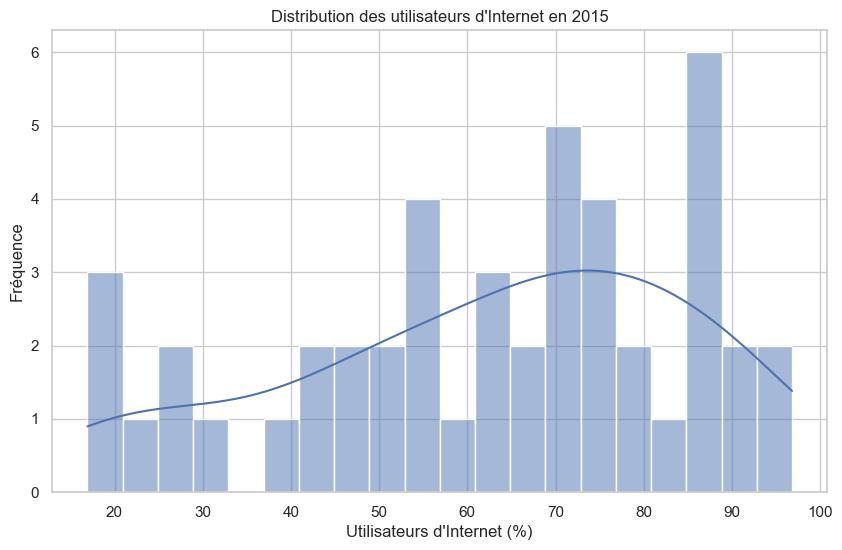

In [111]:
#Histogramme pour l'indicateur IT.NET.USER.P2 (2015)
plt.figure(figsize=(10, 6))
sns.histplot(df_final_it['2015_IT.NET.USER.P2'], bins=20, kde=True)
plt.title('Distribution des utilisateurs d\'Internet en 2015')
plt.xlabel('Utilisateurs d\'Internet (%)')
plt.ylabel('Fréquence')
plt.show()

Ce graphique montre une distribution où la majorité des pays ont un taux d'adoption d'Internet se situant entre 50% et 90%, avec un pic vers les 90%. Les pays avec des taux plus faibles semblent être minoritaires.

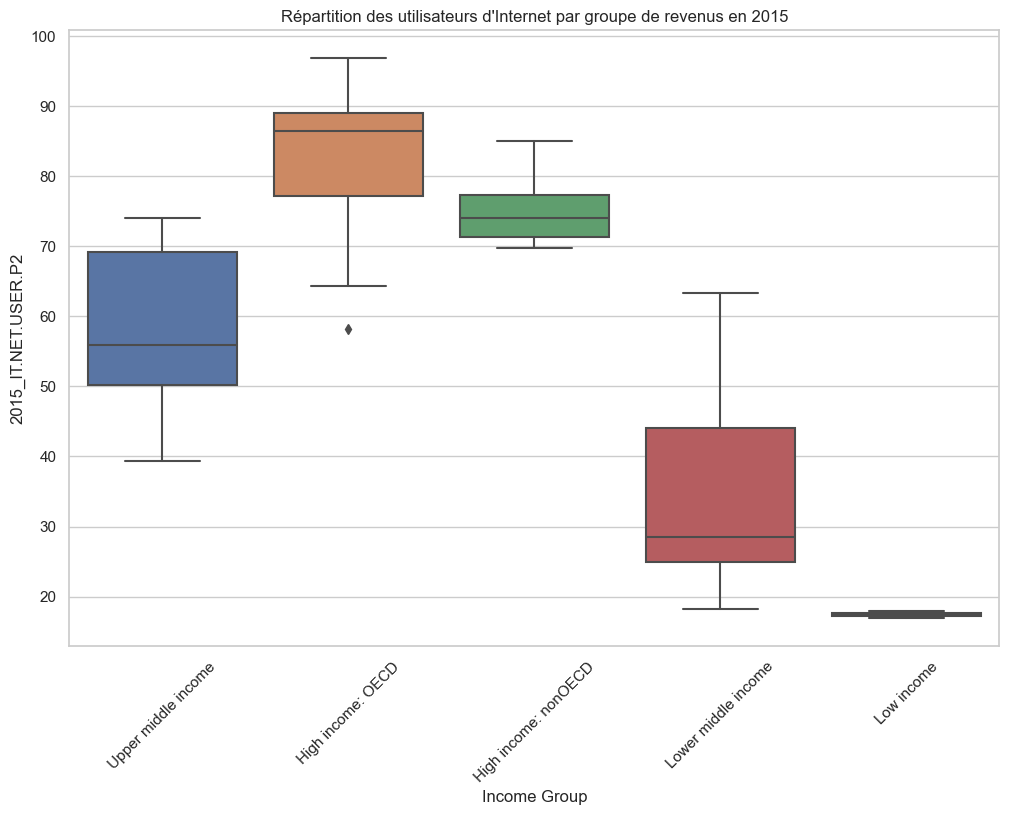

In [112]:
#Boxplot par Income Group pour IT.NET.USER.P2 en 2015
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Group', y='2015_IT.NET.USER.P2', data=df_final_it)
plt.title('Répartition des utilisateurs d\'Internet par groupe de revenus en 2015')
plt.xticks(rotation=45)
plt.show()

On constate avec ces différents boxplot des utilisateurs d'internet par groupe de revenu, que plus un pays a des ménages à fort revenu, plus ces ménages ont accès à internet. Mon approche par groupe de revenu peut s'averer intéressante pour la suite de l'analyse.

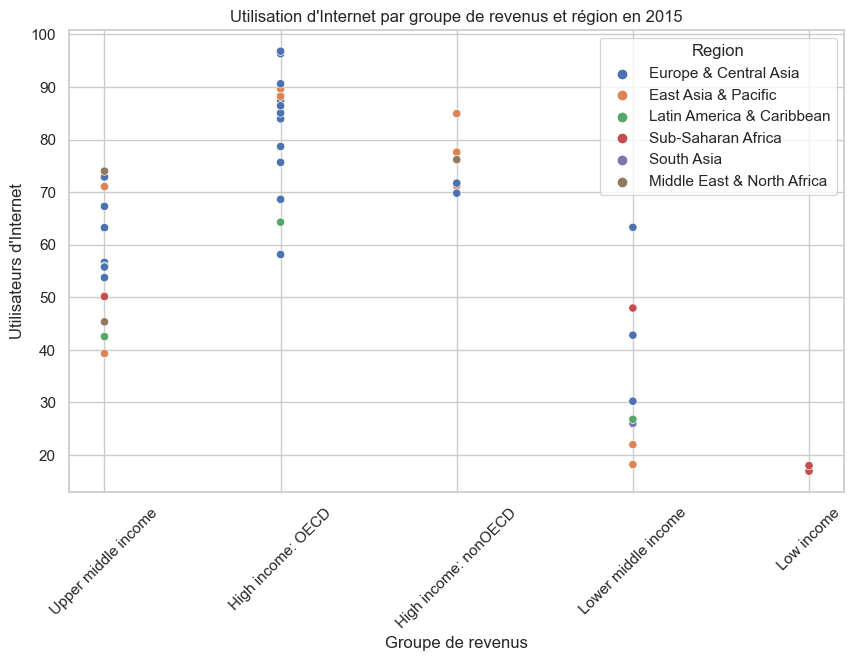

In [113]:
#Scatter plot par groupe de revenus (2015)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income Group', y='2015_IT.NET.USER.P2', hue='Region', data=df_final_it)
plt.title('Utilisation d\'Internet par groupe de revenus et région en 2015')
plt.xlabel('Groupe de revenus')
plt.ylabel('Utilisateurs d\'Internet')
plt.xticks(rotation=45)
plt.show()

On constate que l'utilisation d'internet par groupe de revenu et par région fait ressortir qu'il y a des les groupes a haut et bon revenu beaucoup de pays en région Europe et Central Asie qui utilisent internet mais il y a des pays dans la région de l'est Asie et pacifique.

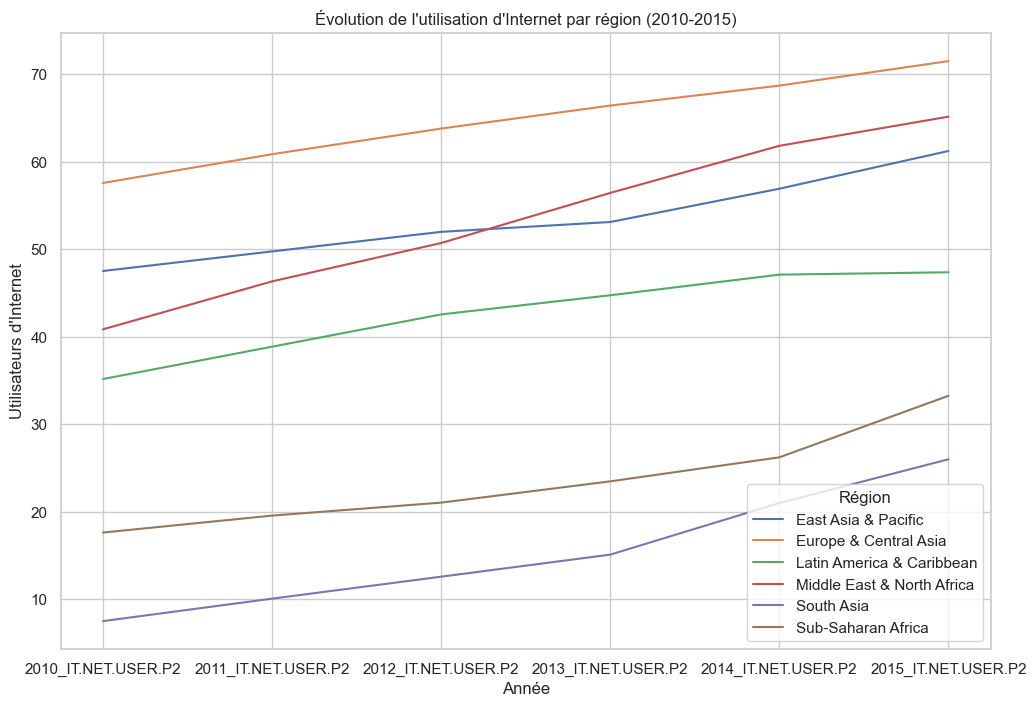

In [114]:
#Agrégation des données par région pour chaque année
df_region = df_final_it.groupby('Region')[['2010_IT.NET.USER.P2', '2011_IT.NET.USER.P2', '2012_IT.NET.USER.P2', '2013_IT.NET.USER.P2', '2014_IT.NET.USER.P2', '2015_IT.NET.USER.P2']].mean()

#Graphique linéaire de l'évolution de l'utilisation d'Internet par région
df_region.T.plot(figsize=(12, 8))
plt.title('Évolution de l\'utilisation d\'Internet par région (2010-2015)')
plt.xlabel('Année')
plt.ylabel('Utilisateurs d\'Internet')
plt.legend(title='Région')
plt.show()

Focus sur l'évolution d'utilisation d'internet par région de 2010 à 2015. Cela nous montre surtout que toutes les régions sont en progression dans leur utilisation d'internet même si certaines régions ont une utilisation plutôt faible comme le South Asia ou encore Sub-Saharan Africa. 

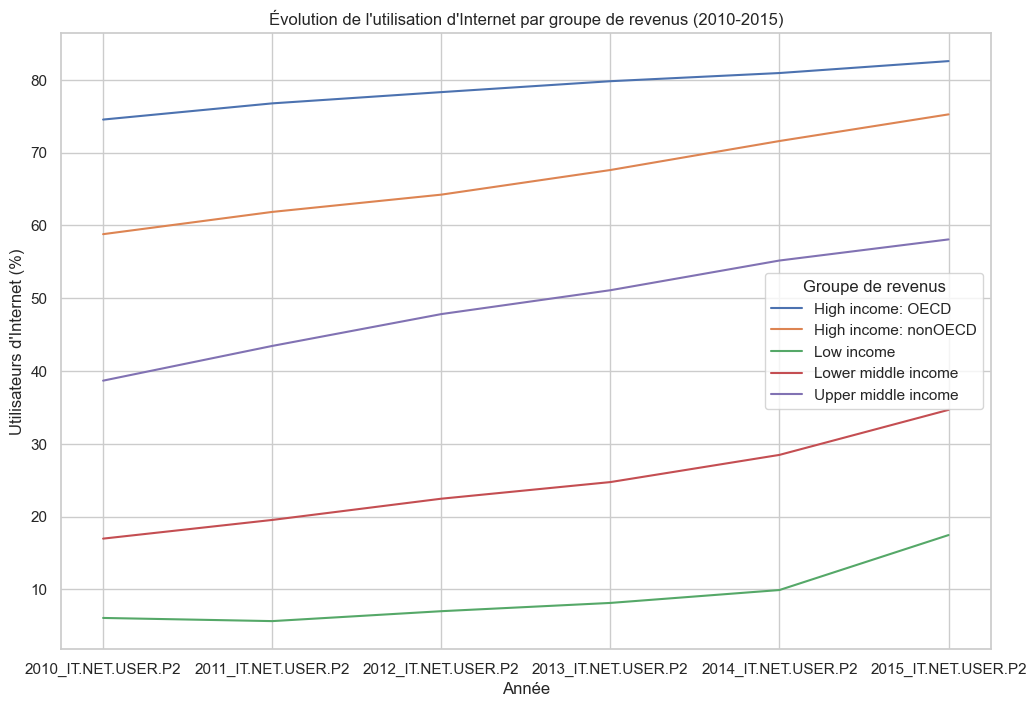

In [115]:
#Agrégation des données par groupe de revenus pour chaque année
df_income = df_final_it.groupby('Income Group')[['2010_IT.NET.USER.P2', '2011_IT.NET.USER.P2', '2012_IT.NET.USER.P2', '2013_IT.NET.USER.P2', '2014_IT.NET.USER.P2', '2015_IT.NET.USER.P2']].mean()

#Graphique linéaire de l'évolution de l'utilisation d'Internet par groupe de revenus
df_income.T.plot(figsize=(12, 8))
plt.title('Évolution de l\'utilisation d\'Internet par groupe de revenus (2010-2015)')
plt.xlabel('Année')
plt.ylabel('Utilisateurs d\'Internet (%)')
plt.legend(title='Groupe de revenus')
plt.show()

Le graphique nous montre que l'utilisation d'internet est en constante évolution dans les différents groupes de revenus mais que dans les groupes de revenu haut et bon on retrouve un bon taux d'utilisation de base et une évolution.

#### 4.2 SE.SEC.ENRR. <a class="anchor" id="42-sesecenrr"></a>

In [116]:
#Garde colonne uniquement pour l'analyse
cols_keep_se_sec = ['Country Code','2010_SE.SEC.ENRR', '2011_SE.SEC.ENRR','2012_SE.SEC.ENRR','2013_SE.SEC.ENRR','2014_SE.SEC.ENRR','2015_SE.SEC.ENRR','Short Name','Region','Income Group']

df_final_se_sec = df_final[cols_keep_se_sec]
df_final_se_sec

Country Code  2010_SE.SEC.ENRR  2011_SE.SEC.ENRR  2012_SE.SEC.ENRR  \
0           ALB         88.411636         90.848351         92.741470   
1           AUT         98.862244         98.193489         97.784416   
2           BEL        105.785881        106.481133        106.309464   
3           BGR         90.424652         93.182861         93.179642   
4           BLR        107.057869        106.308083        107.004868   
5           BRN         99.244324        101.081367        105.711693   
6           CHE         95.861473         96.187630         96.225662   
7           CHL         94.573708         93.788132         91.465889   
8           CHN         84.921158         89.077942         92.143250   
9           COL        102.020622        103.872650         99.850029   
10          CPV         86.471970         89.534500         91.487129   
11          CYP         91.440804         92.825623         95.299850   
12          CZE         94.828903         95.984123         97.083069   
13          DNK        119.569389        122.801193        123.682510   
14          ESP        124.384064        128.592163        131.034164   
15          EST        105.296242        107.366287        107.529846   
16          FIN        107.272591        107.478218        107.485901   
17          HKG         88.019569         87.217560        107.229263   
18          HRV        100.713913         99.882172         99.767059   
19          HUN         99.934181        100.770668        101.860229   
20          IDN         76.540192         79.210213         80.407417   
21          IND         63.290939         66.421677         69.164146   
22          IRN         81.955048         85.117943         87.642838   
23          ITA        102.212700        102.667488        101.677391   
24          KAZ         97.734497         99.089958        101.294571   
25          KGZ         86.597473         86.472076         87.409431   
26          KOR         96.079788         95.735931         96.199181   
27          LAO         46.124020         44.897942         47.833809   
28          LBN         75.304779         76.132767         71.039673   
29          LCA         95.208939         94.639832         91.106567   
30          MAC         93.791718         96.806412         96.426453   
31          MDA         87.981133         87.719368         88.195869   
32          MLT        103.987350         93.360184         93.854881   
33          MOZ         24.166019         24.880840         24.410931   
34          MUS         89.246964         90.411133         91.841919   
35          MYS         66.881042         66.511238         69.605728   
36          NOR        113.230553        112.982910        110.720718   
37          NZL        118.951630        119.209839        118.570061   
38          PRT        106.947952        106.816780        108.952469   
39          ROU        100.238693        100.419640         99.362137   
40          RWA         32.761860         36.334942         38.391071   
41          SLV         72.020851         74.834892         77.144669   
42          SWE         98.190659         96.911041         98.039589   
43          THA         83.621452         87.443970         87.124123   
44          TUR         84.204231         88.307259         85.107239   
45          UZB         94.897743         95.413498         97.251907   

    2013_SE.SEC.ENRR  2014_SE.SEC.ENRR  2015_SE.SEC.ENRR  \
0          95.831573         96.426086         95.765488   
1          98.936234         99.296402        100.021889   
2         163.101013        164.811737        166.808472   
3          98.878319        100.879288         99.016350   
4         106.228012        107.031799        107.119423   
5         104.346252         99.116211         96.079468   
6          98.608299         99.769409        101.213966   
7         100.457672        100.404549        100.646187   
8          96.241753         94

In [117]:
#Calculer des statistiques
#stat descrptives globales pour IT.NET.USER.P2
print(df_final_se_sec[['2010_SE.SEC.ENRR', '2011_SE.SEC.ENRR','2012_SE.SEC.ENRR','2013_SE.SEC.ENRR','2014_SE.SEC.ENRR','2015_SE.SEC.ENRR']].describe())

       2010_SE.SEC.ENRR  2011_SE.SEC.ENRR  2012_SE.SEC.ENRR  2013_SE.SEC.ENRR  \
count         46.000000         46.000000         46.000000         46.000000   
mean          90.810074         91.743998         92.688048         97.267377   
std           19.860270         19.629464         19.531112         23.191378   
min           24.166019         24.880840         24.410931         32.672058   
25%           85.308861         87.512819         87.781096         88.348316   
50%           94.863323         95.026665         96.212421         98.459995   
75%          101.693945        101.003693        101.814520        104.371384   
max          124.384064        128.592163        131.034164        163.101013   

       2014_SE.SEC.ENRR  2015_SE.SEC.ENRR  
count         46.000000         46.000000  
mean          98.581946         99.012132  
std           23.590703         24.330007  
min           32.087631         32.431808  
25%           91.231119         92.100904  
50%   

In [118]:
#Statistiques descriptives par groupe de revenus
stats_income_group_se_sec = df_final_se_sec.groupby('Income Group')[['2010_SE.SEC.ENRR', '2011_SE.SEC.ENRR','2012_SE.SEC.ENRR','2013_SE.SEC.ENRR','2014_SE.SEC.ENRR','2015_SE.SEC.ENRR']].describe()
print(stats_income_group_se_sec)

                     2010_SE.SEC.ENRR                                    \
                                count        mean        std        min   
Income Group                                                              
High income: OECD                15.0  105.469852   9.724057  94.573708   
High income: nonOECD              6.0   96.199613   6.093527  88.019569   
Low income                        2.0   28.463940   6.078177  24.166019   
Lower middle income               8.0   76.740540  15.984249  46.124020   
Upper middle income              15.0   89.811051  10.836129  66.881042   

                                                                     \
                            25%         50%         75%         max   
Income Group                                                          
High income: OECD     97.135223  105.296242  110.251572  124.384064   
High income: nonOECD  92.028532   96.518021  100.346516  103.987350   
Low income            26.314980   28.463940 

In [119]:
#Statistiques descriptives par région
stats_region_se_sec = df_final_se_sec.groupby('Region')[['2010_SE.SEC.ENRR', '2011_SE.SEC.ENRR','2012_SE.SEC.ENRR','2013_SE.SEC.ENRR','2014_SE.SEC.ENRR','2015_SE.SEC.ENRR']].describe()
print(stats_region_se_sec)

                           2010_SE.SEC.ENRR                                    \
                                      count        mean        std        min   
Region                                                                          
East Asia & Pacific                    10.0   85.417489  19.652984  46.124020   
Europe & Central Asia                  24.0  100.086645  10.049461  84.204231   
Latin America & Caribbean               4.0   90.956030  13.065744  72.020851   
Middle East & North Africa              3.0   87.082392  15.012985  75.304779   
South Asia                              1.0   63.290939        NaN  63.290939   
Sub-Saharan Africa                      4.0   58.161703  34.489724  24.166019   

                                                                          \
                                  25%        50%         75%         max   
Region                                                                     
East Asia & Pacific         78.310507  86.

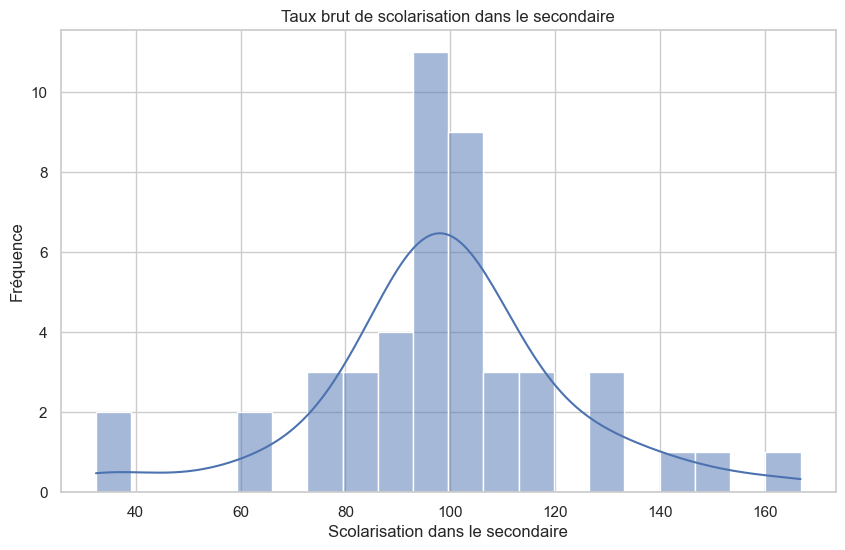

In [120]:
#Histogramme pour l'indicateur SE.SEC.ENRR (2015)
plt.figure(figsize=(10, 6))
sns.histplot(df_final_se_sec['2015_SE.SEC.ENRR'], bins=20, kde=True)
plt.title('Taux brut de scolarisation dans le secondaire')
plt.xlabel('Scolarisation dans le secondaire')
plt.ylabel('Fréquence')
plt.show()

Le graphique montre donc que la majorité des pays atteignent ou dépassent les 100% de scolarisation brute, mais il y a des écarts considérables avec certains pays ayant des taux plus faibles (en dessous de 80%) et d'autres bien au-dessus (jusqu'à 160%).

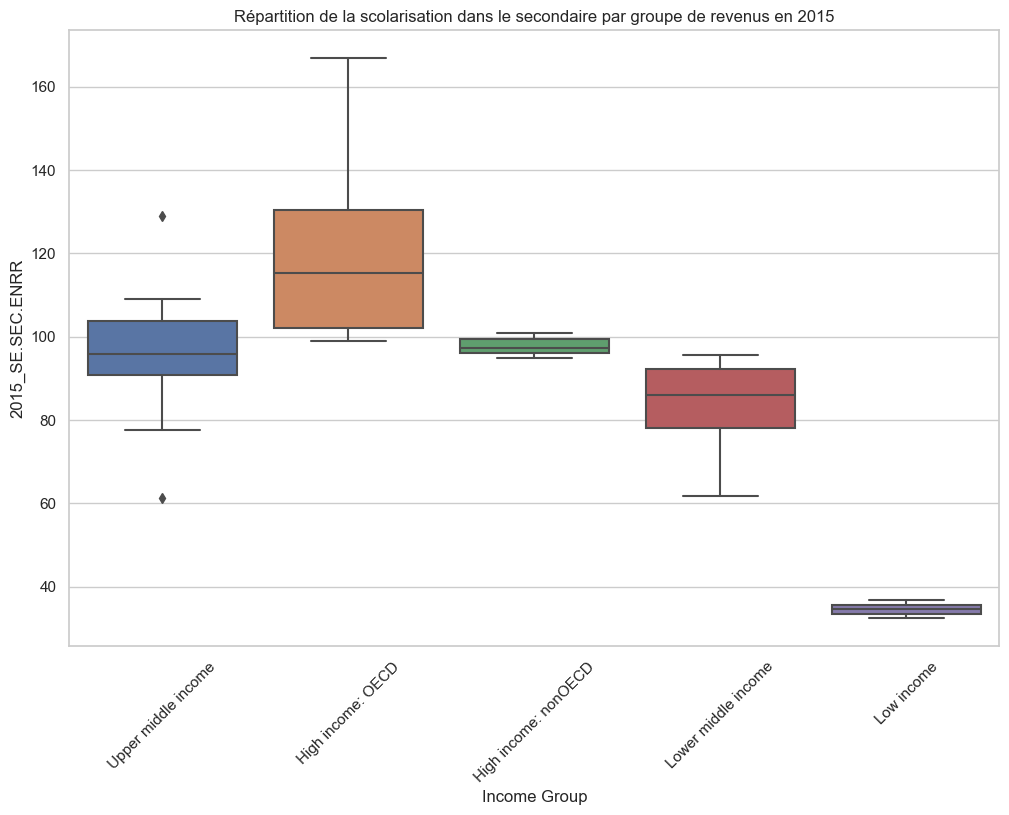

In [121]:
#Boxplot par Income Group pour SE.SEC.ENRR en 2015
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Group', y='2015_SE.SEC.ENRR', data=df_final_se_sec)
plt.title('Répartition de la scolarisation dans le secondaire par groupe de revenus en 2015')
plt.xticks(rotation=45)
plt.show()

La répartition de la scolarité dans le secondaire n'est pas autant marqué par groupe de revenu que l'utilisation d'internet, cela est peut-être dû au faite que dans certains pays même moins aisé l'accès à l'éducation est rendu meilleur qu'avant.

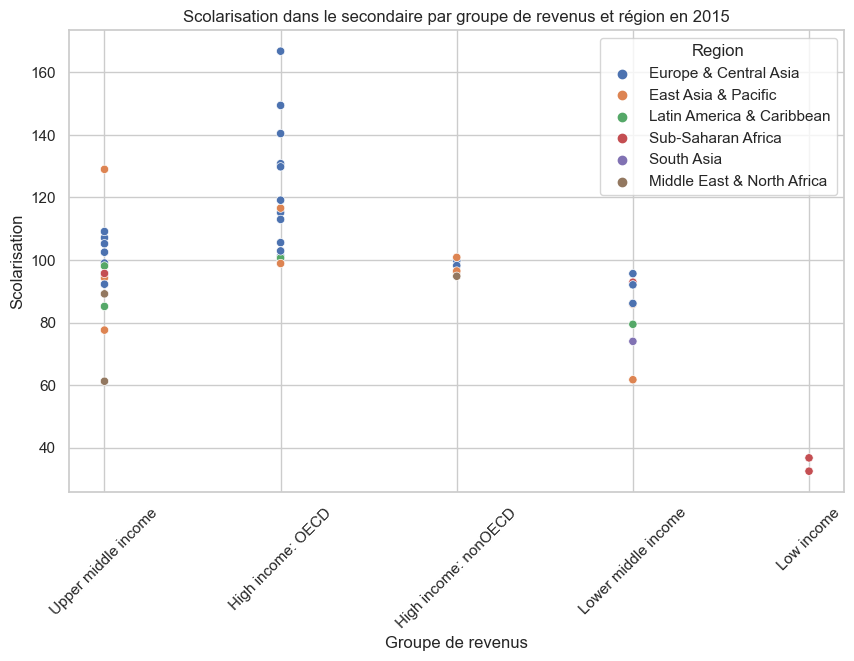

In [122]:
#Scatter plot par groupe de revenus (2015)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income Group', y='2015_SE.SEC.ENRR', hue='Region', data=df_final_se_sec)
plt.title('Scolarisation dans le secondaire par groupe de revenus et région en 2015')
plt.xlabel('Groupe de revenus')
plt.ylabel('Scolarisation')
plt.xticks(rotation=45)
plt.show()

Comme pour l'utilisation d'internet, les pays de la région Europe & Asie Central sont la où il y a le plus de personne inscrite dans le secondaire même les pays de la région Est Asie & Pacific sont présents.

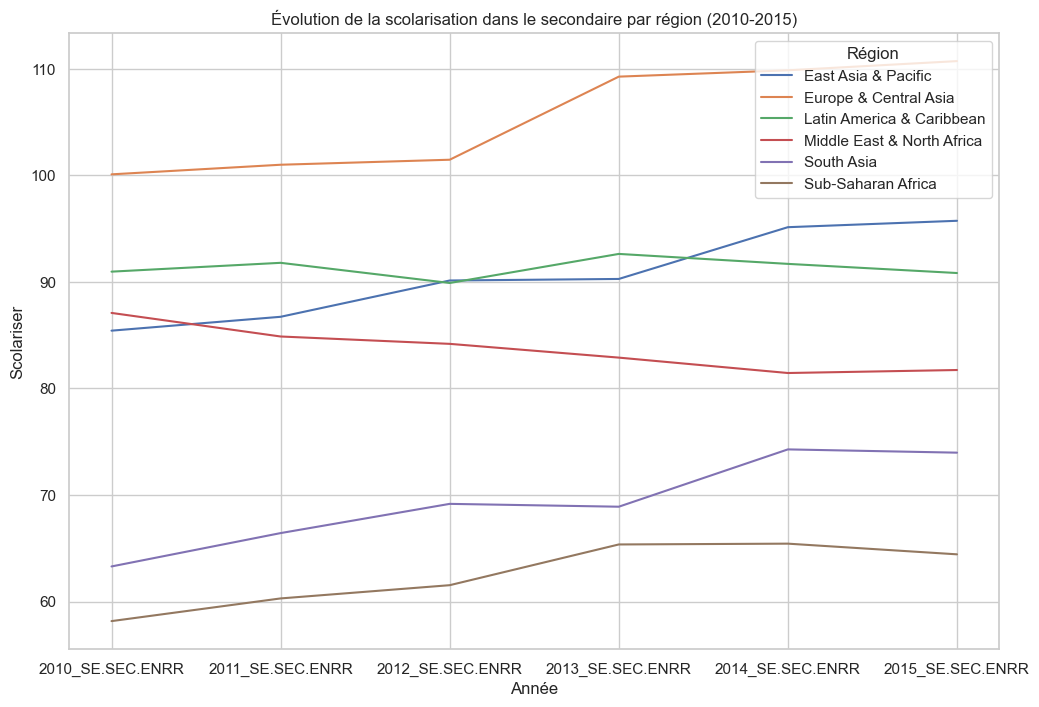

In [123]:
#Agrégation des données par région pour chaque année
df_region_se_sec = df_final_se_sec.groupby('Region')[['2010_SE.SEC.ENRR', '2011_SE.SEC.ENRR','2012_SE.SEC.ENRR','2013_SE.SEC.ENRR','2014_SE.SEC.ENRR','2015_SE.SEC.ENRR']].mean()

# Graphique linéaire de l'évolution de l'utilisation d'Internet par région
df_region_se_sec.T.plot(figsize=(12, 8))
plt.title('Évolution de la scolarisation dans le secondaire par région (2010-2015)')
plt.xlabel('Année')
plt.ylabel('Scolariser')
plt.legend(title='Région')
plt.show()

L'évolution de la scolarisation dans le secondaire de 2010 à 2015 montre une évolution dans la plupart des régions (accès à l'école développé même dans les pays moins aisé) même si on constate que sur la région Middle East & North Africa une diminution de celle-ci (moins de moyen, moins d'enfant poussé à allé à l'école)

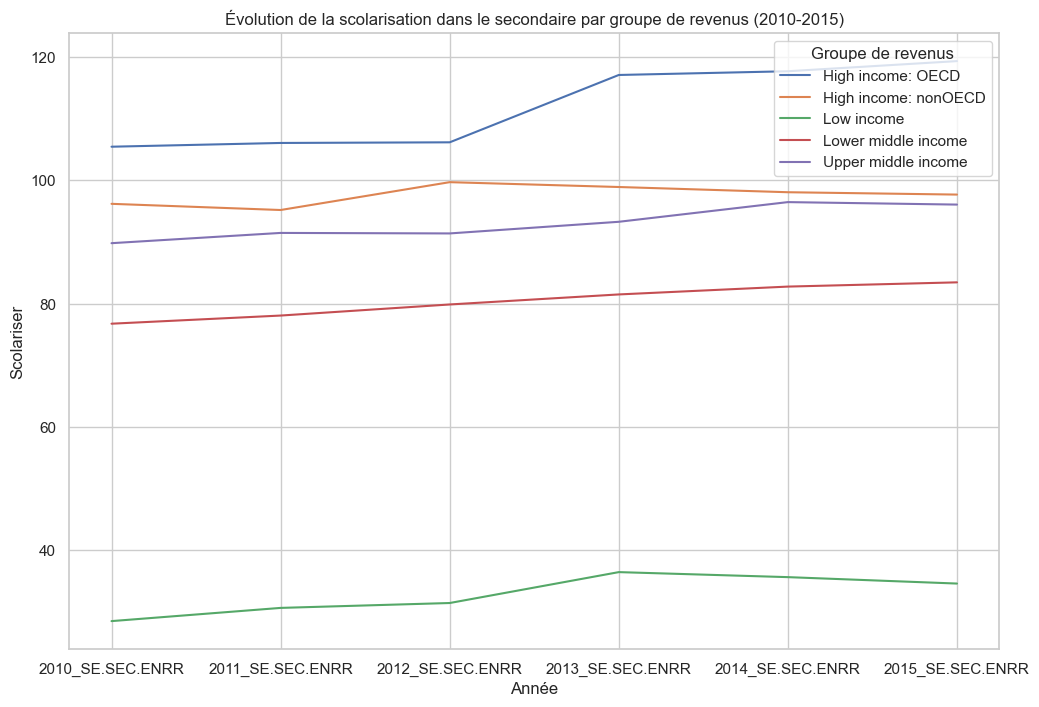

In [124]:
#Agrégation des données par groupe de revenus pour chaque année
df_income_se_sec = df_final_se_sec.groupby('Income Group')[['2010_SE.SEC.ENRR', '2011_SE.SEC.ENRR','2012_SE.SEC.ENRR','2013_SE.SEC.ENRR','2014_SE.SEC.ENRR','2015_SE.SEC.ENRR']].mean()

# Graphique linéaire de l'évolution de l'utilisation d'Internet par groupe de revenus
df_income_se_sec.T.plot(figsize=(12, 8))
plt.title('Évolution de la scolarisation dans le secondaire par groupe de revenus (2010-2015)')
plt.xlabel('Année')
plt.ylabel('Scolariser')
plt.legend(title='Groupe de revenus')
plt.show()

Evolution importante dans les régions avec plus de moyen, on peut conclure que dans l'ensemble même si beaucoup de pays font en sorte de pouvoir scolariser leur habitants, les pays "riche" restent ceux qui où les gens sont le plus scolarisé, les pays un peu moins aisé sont mieux lotis qu'avant même si l'évolution est pas très forte. 

#### 4.3 SP.POP.1524.TO.UN. <a class="anchor" id="43-sppop1524toun"></a>

In [125]:
#Garde colonne uniquement pour l'analyse
cols_keep_sp_pop = ['Country Code','2010_SP.POP.1524.TO.UN', '2011_SP.POP.1524.TO.UN','2012_SP.POP.1524.TO.UN','2013_SP.POP.1524.TO.UN','2014_SP.POP.1524.TO.UN','2015_SP.POP.1524.TO.UN','Short Name','Region','Income Group']

df_final_sp_pop = df_final[cols_keep_sp_pop]
df_final_sp_pop

Country Code  2010_SP.POP.1524.TO.UN  2011_SP.POP.1524.TO.UN  \
0           ALB                608456.0                603104.0   
1           AUT               1008570.0               1003625.0   
2           BEL               1263290.0               1261440.0   
3           BGR                900248.0                861074.0   
4           BLR               1402878.0               1338023.0   
5           BRN                 73235.0                 74254.0   
6           CHE                953955.0                960880.0   
7           CHL               2950659.0               2946436.0   
8           CHN             218974009.0             215914397.0   
9           COL               8807400.0               8868959.0   
10          CPV                123314.0                123671.0   
11          CYP                132974.0                132180.0   
12          CZE               1257862.0               1226055.0   
13          DNK                670436.0                683171.0   
14          ESP               4607799.0               4508216.0   
15          EST                184115.0                175021.0   
16          FIN                656220.0                654995.0   
17          HKG                886212.0                882251.0   
18          HRV                549209.0                539808.0   
19          HUN               1241953.0               1225523.0   
20          IDN              42184439.0              42057105.0   
21          IND             235056806.0             237548472.0   
22          IRN              16748549.0              16224325.0   
23          ITA               5810621.0               5792098.0   
24          KAZ               2914209.0               2832302.0   
25          KGZ               1154611.0               1149398.0   
26          KOR               6619654.0               6600849.0   
27          LAO               1431879.0               1458735.0   
28          LBN                745112.0                751983.0   
29          LCA                 32358.0                 31942.0   
30          MAC                 79536.0                 77103.0   
31          MDA                689763.0                660605.0   
32          MLT                 56054.0                 55237.0   
33          MOZ               4592443.0               4710680.0   
34          MUS                203437.0                205029.0   
35          MYS               5199376.0               5234898.0   
36          NOR                625849.0                633739.0   
37          NZL                622920.0                624395.0   
38          PRT               1192997.0               1177271.0   
39          ROU               2856321.0               2731064.0   
40          RWA               2405774.0               2391430.0   
41          SLV               1323754.0               1341886.0   
42          SWE               1229643.0               1225872.0   
43          THA               9667306.0               9563182.0   
44          TUR              13651079.0              13708210.0   
45          UZB               6275271.0               6259708.0   

    2012_SP.POP.1524.TO.UN  2013_SP.POP.1524.TO.UN  2014_SP.POP.1524.TO.UN  \
0                 594101.0                582411.0                569427.0   
1                 996625.0                987677.0                976937.0   
2                1258349.0               1254033.0               1248534.0   
3                 819772.0                778841.0                741555.0   
4                1267864.0               1196742.0               1130122.0   
5                  75148.0                 75940.0                 76664.0   
6                 965287.0                966717.0                964692.0   
7                2928583.0               2899109.0               2861029.0   
8              211735888.0             206846521.0             201802535.0   
9                8920240.0               8959847.0               8986478.

In [126]:
#Calculer des statistiques
#stat descrptives globales pour IT.NET.USER.P2
print(df_final_sp_pop[['2010_SP.POP.1524.TO.UN', '2011_SP.POP.1524.TO.UN','2012_SP.POP.1524.TO.UN','2013_SP.POP.1524.TO.UN','2014_SP.POP.1524.TO.UN','2015_SP.POP.1524.TO.UN']].describe())

       2010_SP.POP.1524.TO.UN  2011_SP.POP.1524.TO.UN  2012_SP.POP.1524.TO.UN  \
count            4.600000e+01            4.600000e+01            4.600000e+01   
mean             1.327440e+07            1.323980e+07            1.316892e+07   
std              4.660766e+07            4.657430e+07            4.640745e+07   
min              3.235800e+04            3.194200e+04            3.144600e+04   
25%              6.334418e+05            6.390530e+05            6.310792e+05   
50%              1.235798e+06            1.225698e+06            1.195668e+06   
75%              4.603960e+06            4.660064e+06            4.729242e+06   
max              2.350568e+08            2.375485e+08            2.397136e+08   

       2013_SP.POP.1524.TO.UN  2014_SP.POP.1524.TO.UN  2015_SP.POP.1524.TO.UN  
count            4.600000e+01            4.600000e+01            4.600000e+01  
mean             1.307216e+07            1.296391e+07            1.285549e+07  
std              4.614737e+07 

In [127]:
#Statistiques descriptives par groupe de revenus
stats_income_group_sp_pop = df_final_sp_pop.groupby('Income Group')[['2010_SP.POP.1524.TO.UN', '2011_SP.POP.1524.TO.UN','2012_SP.POP.1524.TO.UN','2013_SP.POP.1524.TO.UN','2014_SP.POP.1524.TO.UN','2015_SP.POP.1524.TO.UN']].describe()
print(stats_income_group_sp_pop)

                     2010_SP.POP.1524.TO.UN                              \
                                      count          mean           std   
Income Group                                                              
High income: OECD                      15.0  1.976973e+06  2.046414e+06   
High income: nonOECD                    6.0  2.962033e+05  3.444117e+05   
Low income                              2.0  3.499108e+06  1.546208e+06   
Lower middle income                     8.0  3.602998e+07  8.167091e+07   
Upper middle income                    15.0  1.893018e+07  5.558854e+07   

                                                                     \
                            min         25%        50%          75%   
Income Group                                                          
High income: OECD      184115.0   663328.00  1192997.0   2106974.50   
High income: nonOECD    56054.0    74810.25   106255.0    445150.25   
Low income            2405774.0  2952441.25 

In [128]:
stats_region_sp_pop = df_final_sp_pop.groupby('Region')[['2010_SP.POP.1524.TO.UN', '2011_SP.POP.1524.TO.UN','2012_SP.POP.1524.TO.UN','2013_SP.POP.1524.TO.UN','2014_SP.POP.1524.TO.UN','2015_SP.POP.1524.TO.UN']].describe()
print(stats_region_sp_pop)

                           2010_SP.POP.1524.TO.UN                              \
                                            count          mean           std   
Region                                                                          
East Asia & Pacific                          10.0  2.857386e+07  6.809473e+07   
Europe & Central Asia                        24.0  2.159930e+06  2.960433e+06   
Latin America & Caribbean                     4.0  3.278543e+06  3.874476e+06   
Middle East & North Africa                    3.0  5.849905e+06  9.444789e+06   
South Asia                                    1.0  2.350568e+08           NaN   
Sub-Saharan Africa                            4.0  1.831242e+06  2.122976e+06   

                                                                    \
                                    min           25%          50%   
Region                                                               
East Asia & Pacific             73235.0  6.887430e+05    331

In [129]:
#Gestion des outliers
#Calcul des quartiles
Q1 = df_final_sp_pop['2015_SP.POP.1524.TO.UN'].quantile(0.25)
Q3 = df_final_sp_pop['2015_SP.POP.1524.TO.UN'].quantile(0.75)
IQR = Q3 - Q1

#Identification des outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtrer les outliers
outliers = df_final_sp_pop[(df_final_sp_pop['2015_SP.POP.1524.TO.UN'] < lower_bound) | (df_final_sp_pop['2015_SP.POP.1524.TO.UN'] > upper_bound)]
non_outliers = df_final_sp_pop[(df_final_sp_pop['2015_SP.POP.1524.TO.UN'] >= lower_bound) & (df_final_sp_pop['2015_SP.POP.1524.TO.UN'] <= upper_bound)]

# Affichage des outliers
print("Outliers :")
print(outliers)

Outliers :
   Country Code  2010_SP.POP.1524.TO.UN  2011_SP.POP.1524.TO.UN  \
8           CHN             218974009.0             215914397.0   
20          IDN              42184439.0              42057105.0   
21          IND             235056806.0             237548472.0   
22          IRN              16748549.0              16224325.0   
44          TUR              13651079.0              13708210.0   

    2012_SP.POP.1524.TO.UN  2013_SP.POP.1524.TO.UN  2014_SP.POP.1524.TO.UN  \
8              211735888.0             206846521.0             201802535.0   
20              41947672.0              41865701.0              41821108.0   
21             239713636.0             241535030.0             243002731.0   
22              15594188.0              14902501.0              14207456.0   
44              13783064.0              13859026.0              13913334.0   

    2015_SP.POP.1524.TO.UN Short Name                      Region  \
8              197026759.0      China         Ea

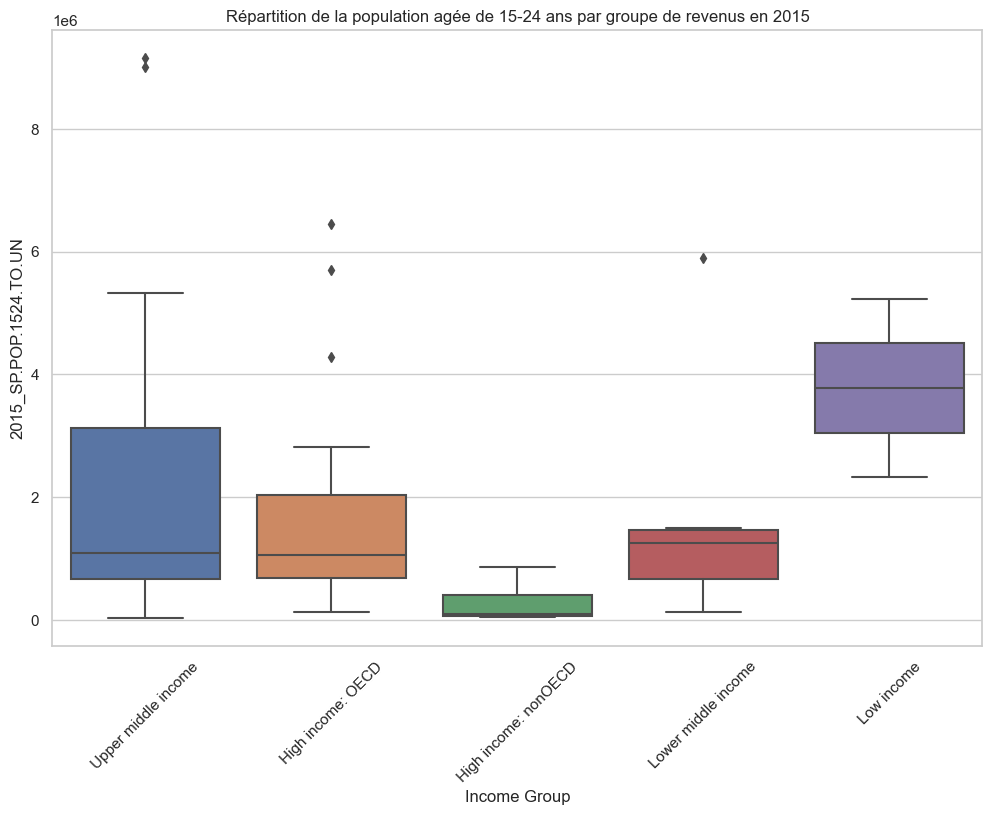

In [130]:
#Boxplot par Income Group pour SP.POP.1524.TO.UN en 2015
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Group', y='2015_SP.POP.1524.TO.UN', data=non_outliers)
plt.title('Répartition de la population agée de 15-24 ans par groupe de revenus en 2015')
plt.xticks(rotation=45)
plt.show()

Pour la population, c'est différent on peut voir qu'il n'y a pas forcément de lien entre la richesse d'un pays et sa population. La démographie dépent beaucoup de la fécondité, conjugalité, migration vieillissemennt et de la mortalité. Cela peut aussi dépendre de la politique social.

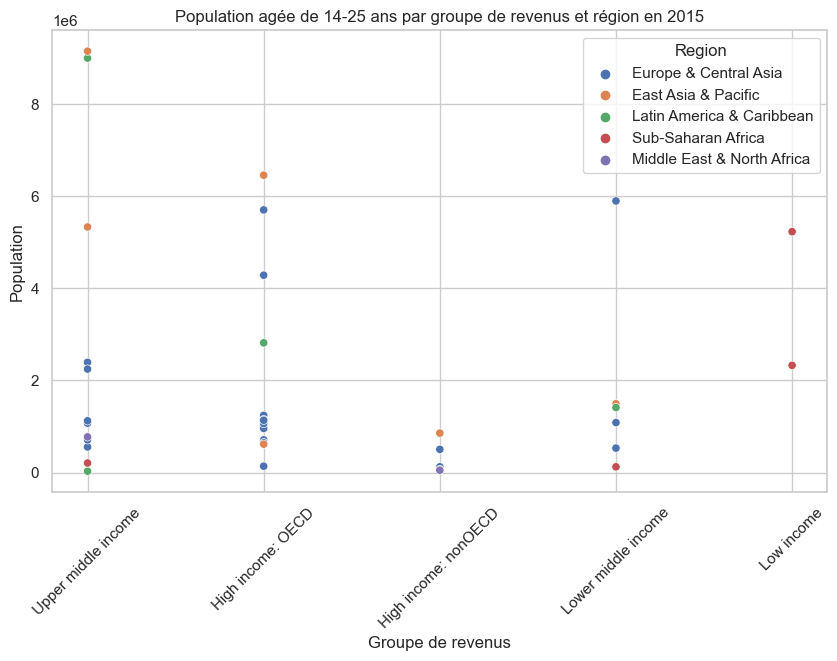

In [131]:
#Scatter plot par groupe de revenus (2015)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income Group', y='2015_SP.POP.1524.TO.UN', hue='Region', data=non_outliers)
plt.title('Population agée de 14-25 ans par groupe de revenus et région en 2015')
plt.xlabel('Groupe de revenus')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

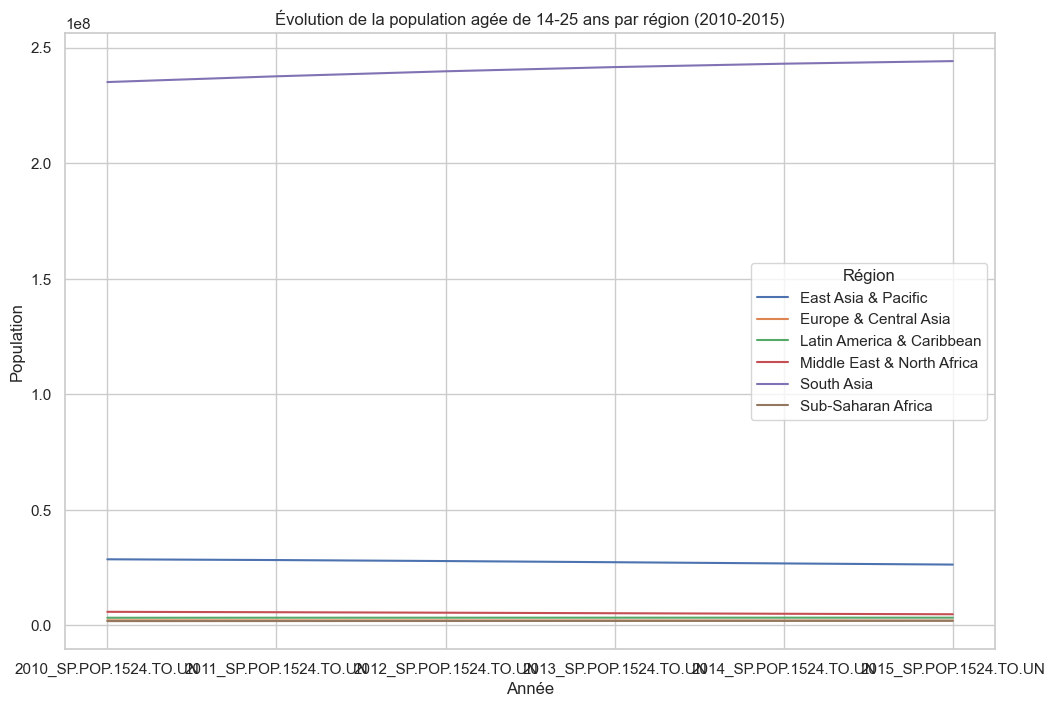

In [132]:
#Agrégation des données par région pour chaque année
df_region_sp_pop = df_final_sp_pop.groupby('Region')[['2010_SP.POP.1524.TO.UN', '2011_SP.POP.1524.TO.UN','2012_SP.POP.1524.TO.UN','2013_SP.POP.1524.TO.UN','2014_SP.POP.1524.TO.UN','2015_SP.POP.1524.TO.UN']].mean()

# Graphique linéaire de l'évolution de l'utilisation d'Internet par région
df_region_sp_pop.T.plot(figsize=(12, 8))
plt.title('Évolution de la population agée de 14-25 ans par région (2010-2015)')
plt.xlabel('Année')
plt.ylabel('Population')
plt.legend(title='Région')
plt.show()

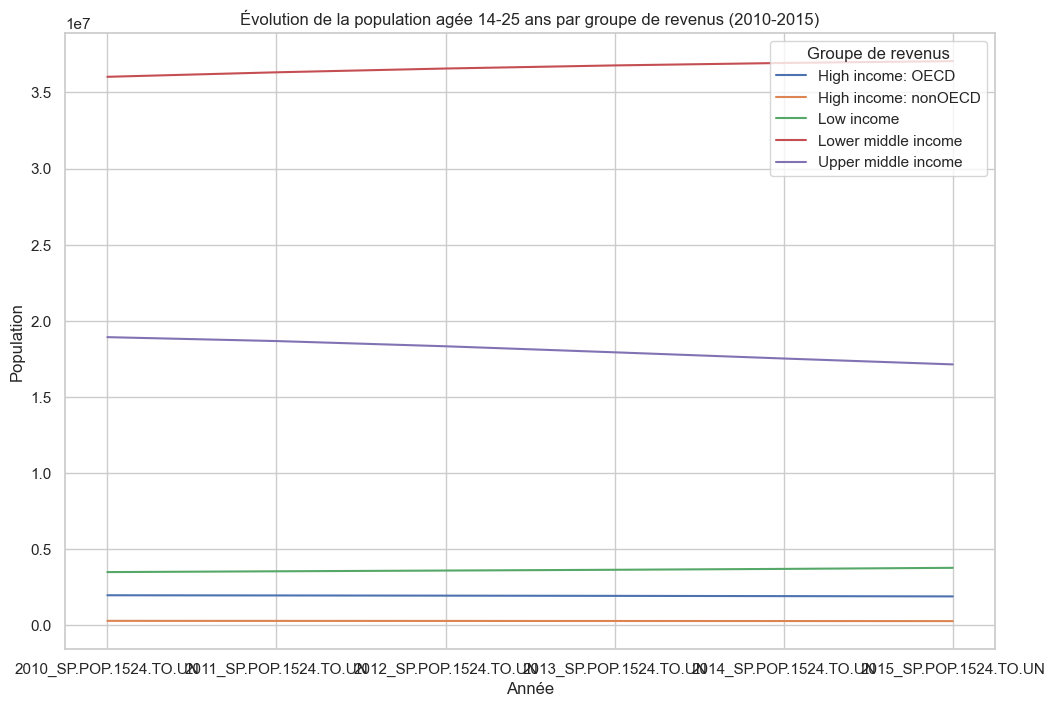

In [133]:
#Agrégation des données par groupe de revenus pour chaque année
df_income_sp_pop = df_final_sp_pop.groupby('Income Group')[['2010_SP.POP.1524.TO.UN', '2011_SP.POP.1524.TO.UN','2012_SP.POP.1524.TO.UN','2013_SP.POP.1524.TO.UN','2014_SP.POP.1524.TO.UN','2015_SP.POP.1524.TO.UN']].mean()

# Graphique linéaire de l'évolution de l'utilisation d'Internet par groupe de revenus
df_income_sp_pop.T.plot(figsize=(12, 8))
plt.title('Évolution de la population agée 14-25 ans par groupe de revenus (2010-2015)')
plt.xlabel('Année')
plt.ylabel('Population')
plt.legend(title='Groupe de revenus')
plt.show()

#### 4.4 SE.TER.ENRR <a class="anchor" id="44-seterenrr"></a>

In [134]:
#Garde colonne uniquement pour l'analyse
cols_keep_se_ter = ['Country Code','2010_SE.TER.ENRR', '2011_SE.TER.ENRR','2012_SE.TER.ENRR','2013_SE.TER.ENRR','2014_SE.TER.ENRR','2015_SE.TER.ENRR','Short Name','Region','Income Group']

df_final_se_ter = df_final[cols_keep_se_ter]
df_final_se_ter

Country Code  2010_SE.TER.ENRR  2011_SE.TER.ENRR  2012_SE.TER.ENRR  \
0           ALB         44.540649         49.670399         58.565491   
1           AUT         68.732178         71.010902         72.314880   
2           BEL         67.710922         69.725632         71.244370   
3           BGR         58.011002         59.625359         62.741341   
4           BLR         79.421013         85.701393         90.437134   
5           BRN         15.654810         17.626560         22.553499   
6           CHE         52.792740         54.338268         55.499901   
7           CHL         69.674110         75.046310         79.446907   
8           CHN         23.947920         24.872810         27.184429   
9           COL         39.409100         43.502960         46.215752   
10          CPV         17.305559         20.086020         20.121410   
11          CYP         48.311581         46.539730         45.863590   
12          CZE         64.018982         65.648743         65.861969   
13          DNK         73.619652         76.801147         79.252632   
14          ESP         78.670288         83.420990         85.545990   
15          EST         68.188560         70.369087         72.101830   
16          FIN         94.119141         95.601837         93.280632   
17          HKG         58.486809         60.549740         60.586288   
18          HRV         54.672321         58.172310         61.667210   
19          HUN         60.368221         59.506130         59.797310   
20          IDN         24.199671         26.504210         30.656330   
21          IND         17.911489         22.861370         24.365330   
22          IRN         42.605572         48.520580         54.899059   
23          ITA         66.204277         66.176971         65.034439   
24          KAZ         46.045910         48.465179         51.323792   
25          KGZ         42.025311         41.182621         43.732052   
26          KOR         99.660339         99.519402         97.206940   
27          LAO         16.356760         17.412310         17.078039   
28          LBN         48.412060         49.738289         45.579010   
29          LCA         12.492880         16.340401         10.177790   
30          MAC         61.788071         63.985161         56.030689   
31          MDA         38.145359         39.448040         40.108639   
32          MLT         37.052231         39.777760         42.606750   
33          MOZ          4.538600          4.797160          5.053110   
34          MUS         33.691818         35.234779         38.659969   
35          MYS         37.134590         35.397518         35.873760   
36          NOR         72.886917         73.085793         73.251457   
37          NZL         82.517502         81.707123         80.843353   
38          PRT         65.660210         68.506210         68.585541   
39          ROU         67.808311         62.786949         54.520981   
40          RWA          5.565960          6.740040          6.553780   
41          SLV         26.359011         27.590891         28.628969   
42          SWE         74.684128         73.945091         69.616074   
43          THA         50.202621         52.747051         51.569160   
44          TUR         55.999062         60.725609         69.301949   
45          UZB          9.398770          8.934190          8.249540   

    2013_SE.TER.ENRR  2014_SE.TER.ENRR  2015_SE.TER.ENRR  \
0          62.547760         62.706848         58.109951   
1          80.386787         79.998642         81.540512   
2          72.309570         73.318802         75.036827   
3          66.538338         70.785629         73.934196   
4          91.029770         88.857033         87.940742   
5          24.285669         31.725340         30.844780   
6          56.311020         57.229530         57.672192   
7          83.816437         86.630699         88.577293   
8          30.162069         39

In [135]:
#Calculer des statistiques
#stat descrptives globales pour IT.NET.USER.P2
print(df_final_se_ter[['2010_SE.TER.ENRR', '2011_SE.TER.ENRR','2012_SE.TER.ENRR','2013_SE.TER.ENRR','2014_SE.TER.ENRR','2015_SE.TER.ENRR']].describe())

       2010_SE.TER.ENRR  2011_SE.TER.ENRR  2012_SE.TER.ENRR  2013_SE.TER.ENRR  \
count         46.000000         46.000000         46.000000         46.000000   
mean          49.500065         51.303196         52.169328         53.612678   
std           24.092412         24.130796         24.156036         24.231963   
min            4.538600          4.797160          5.053110          5.392320   
25%           34.531921         35.275464         36.570313         37.231498   
50%           51.497681         53.542660         55.199480         56.663870   
75%           67.783964         69.420776         69.537542         71.051157   
max           99.660339         99.519402         97.206940         95.345421   

       2014_SE.TER.ENRR  2015_SE.TER.ENRR  
count         46.000000         46.000000  
mean          54.561612         54.820602  
std           24.330861         25.119624  
min            5.974720          6.390520  
25%           38.853189         37.121869  
50%   

In [136]:
#Statistiques descriptives par groupe de revenus
stats_income_group_se_ter = df_final_se_ter.groupby('Income Group')[['2010_SE.TER.ENRR', '2011_SE.TER.ENRR','2012_SE.TER.ENRR','2013_SE.TER.ENRR','2014_SE.TER.ENRR','2015_SE.TER.ENRR']].describe()
print(stats_income_group_se_ter)

                     2010_SE.TER.ENRR                                  \
                                count       mean        std       min   
Income Group                                                            
High income: OECD                15.0  73.275996  11.805156  52.79274   
High income: nonOECD              6.0  45.994304  17.243138  15.65481   
Low income                        2.0   5.052280   0.726453   4.53860   
Lower middle income               8.0  23.962741  11.238310   9.39877   
Upper middle income              15.0  46.672715  16.810183  12.49288   

                                                                  \
                            25%        50%        75%        max   
Income Group                                                       
High income: OECD     66.957600  69.674110  76.677208  99.660339   
High income: nonOECD  39.867068  51.491951  57.533187  61.788071   
Low income             4.795440   5.052280   5.309120   5.565960   
Lower m

In [137]:
stats_region_se_ter = df_final_se_ter.groupby('Region')[['2010_SE.TER.ENRR', '2011_SE.TER.ENRR','2012_SE.TER.ENRR','2013_SE.TER.ENRR','2014_SE.TER.ENRR','2015_SE.TER.ENRR']].describe()
print(stats_region_se_ter)

                           2010_SE.TER.ENRR                                   \
                                      count       mean        std        min   
Region                                                                         
East Asia & Pacific                    10.0  46.994909  28.801241  15.654810   
Europe & Central Asia                  24.0  60.501479  17.236710   9.398770   
Latin America & Caribbean               4.0  36.983775  24.407852  12.492880   
Middle East & North Africa              3.0  42.689954   5.680385  37.052231   
South Asia                              1.0  17.911489        NaN  17.911489   
Sub-Saharan Africa                      4.0  15.275484  13.574954   4.538600   

                                                                        \
                                  25%        50%        75%        max   
Region                                                                   
East Asia & Pacific         24.010858  43.668606  60.9627

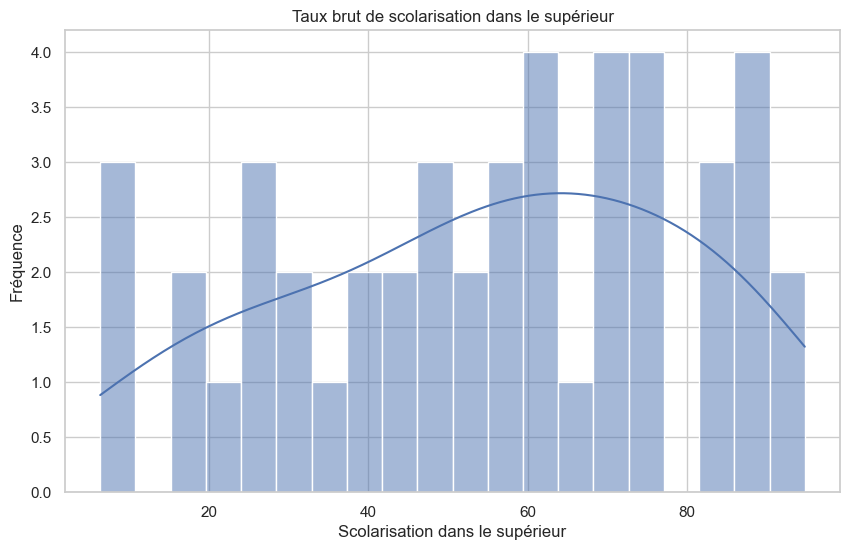

In [138]:
#Histogramme pour l'indicateur SE.SEC.ENRR (2015)
plt.figure(figsize=(10, 6))
sns.histplot(df_final_se_ter['2015_SE.TER.ENRR'], bins=20, kde=True)
plt.title('Taux brut de scolarisation dans le supérieur')
plt.xlabel('Scolarisation dans le supérieur')
plt.ylabel('Fréquence')
plt.show()

Le graphique montre donc que la majorité des pays sont entre 40% et 80% de scolarisation brute, mais il y a pic de fréquention d'environ 60% mais une dimunition de ces pays à partir de 80%.

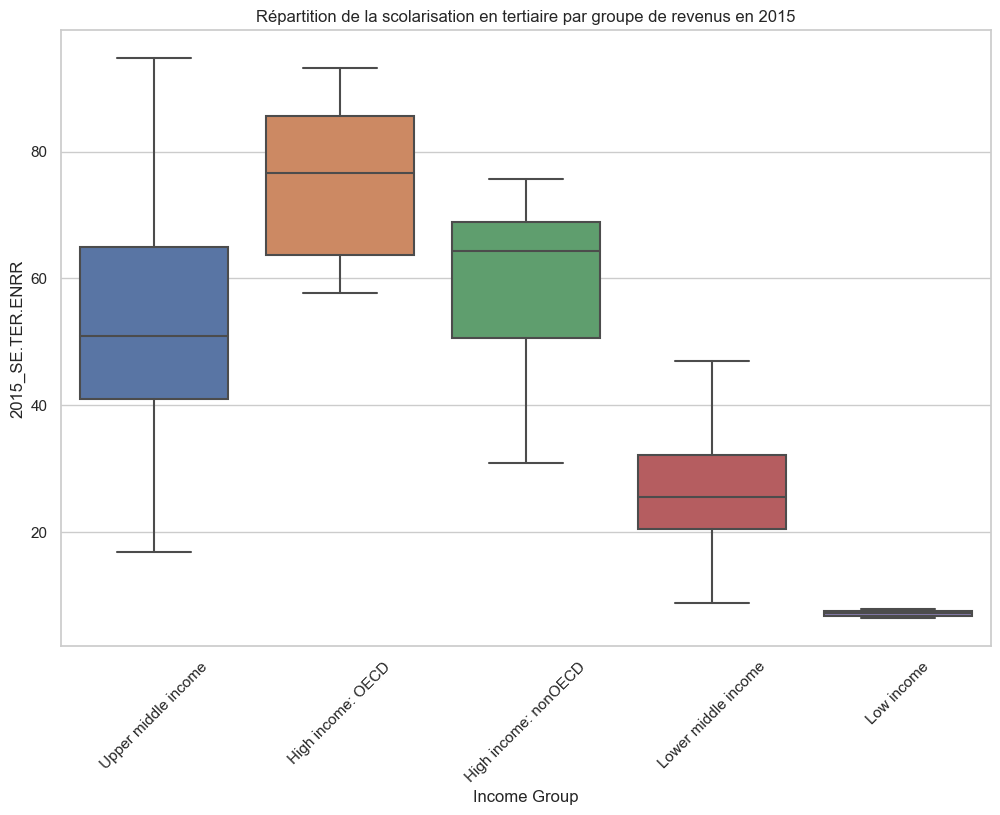

In [139]:
#Boxplot par Income Group pour SP.POP.1524.TO.UN en 2015
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Group', y='2015_SE.TER.ENRR', data=df_final_se_ter)
plt.title('Répartition de la scolarisation en tertiaire par groupe de revenus en 2015')
plt.xticks(rotation=45)
plt.show()

Le taux de scolarisation dans le tertiaire dépend aussi beaucoup du groupe de revenu des pays, cela est dû notamment aux infrastructures mises en place par le pays, ou encore par exemple l'accès à internet ou à un ordinateur. 

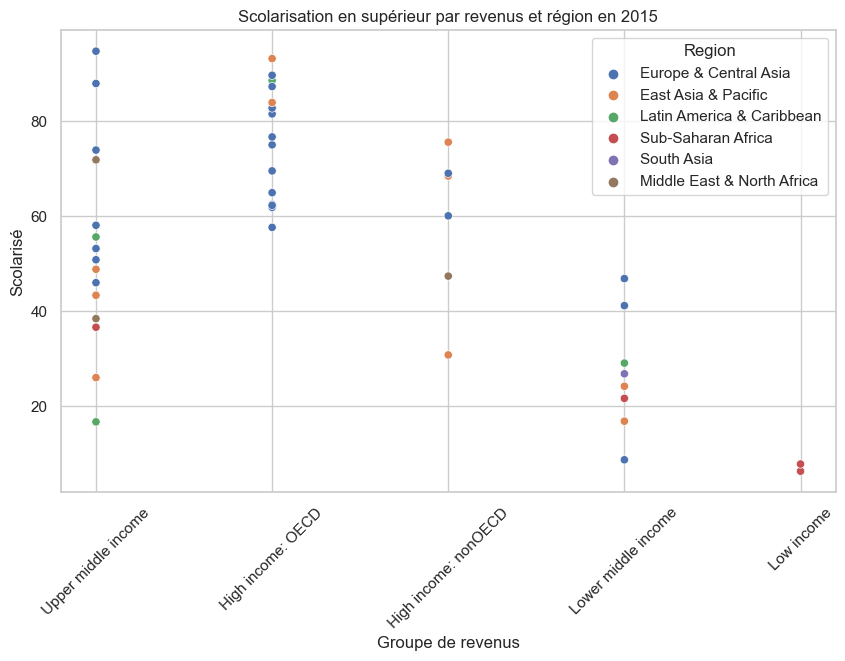

In [140]:
#Scatter plot par groupe de revenus (2015)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income Group', y='2015_SE.TER.ENRR', hue='Region', data=df_final_se_ter)
plt.title('Scolarisation en supérieur par revenus et région en 2015')
plt.xlabel('Groupe de revenus')
plt.ylabel('Scolarisé')
plt.xticks(rotation=45)
plt.show()

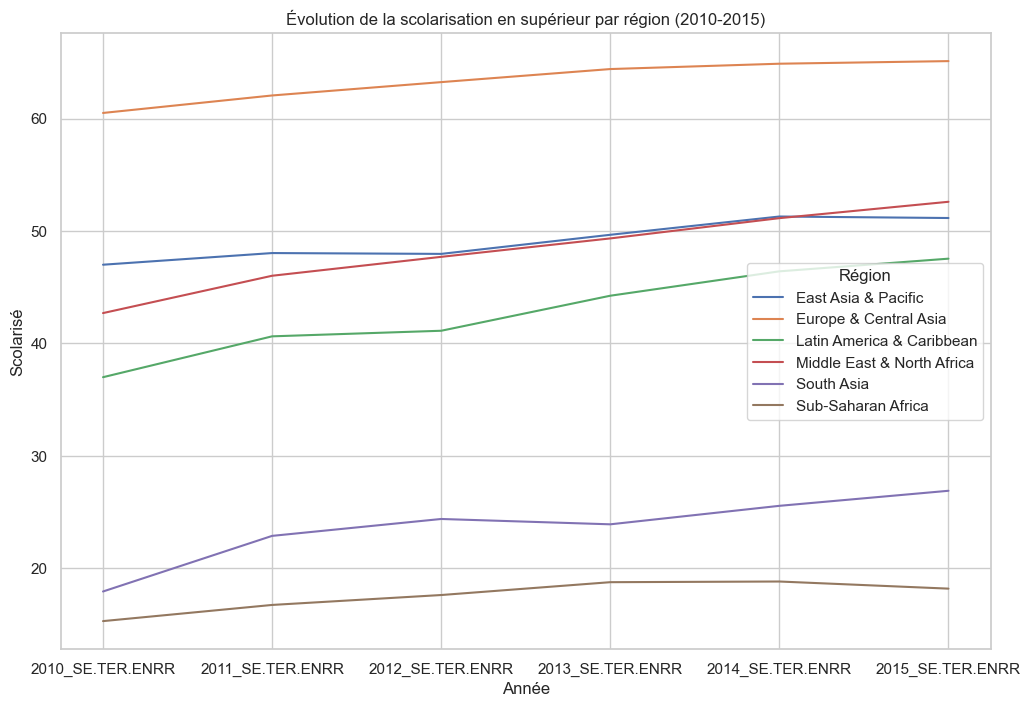

In [141]:
#Agrégation des données par région pour chaque année
df_region_se_ter = df_final_se_ter.groupby('Region')[['2010_SE.TER.ENRR', '2011_SE.TER.ENRR','2012_SE.TER.ENRR','2013_SE.TER.ENRR','2014_SE.TER.ENRR','2015_SE.TER.ENRR']].mean()

# Graphique linéaire de l'évolution de l'utilisation d'Internet par région
df_region_se_ter.T.plot(figsize=(12, 8))
plt.title('Évolution de la scolarisation en supérieur par région (2010-2015)')
plt.xlabel('Année')
plt.ylabel('Scolarisé')
plt.legend(title='Région')
plt.show()

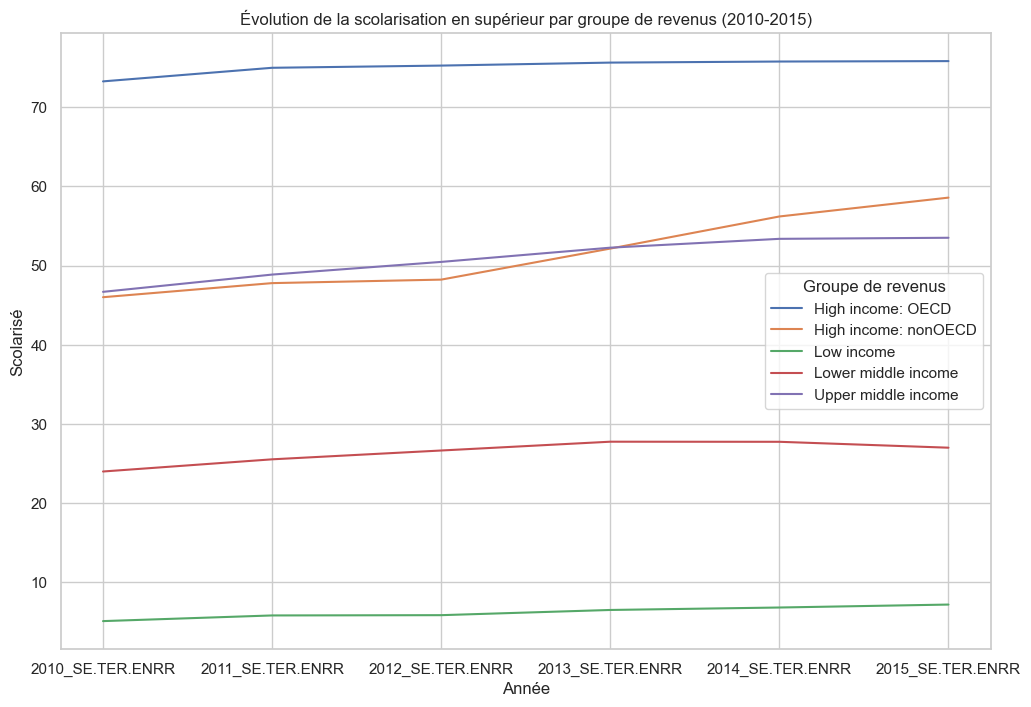

In [142]:
#Agrégation des données par groupe de revenus pour chaque année
df_income_se_ter = df_final_se_ter.groupby('Income Group')[['2010_SE.TER.ENRR', '2011_SE.TER.ENRR','2012_SE.TER.ENRR','2013_SE.TER.ENRR','2014_SE.TER.ENRR','2015_SE.TER.ENRR']].mean()

# Graphique linéaire de l'évolution de l'utilisation d'Internet par groupe de revenus
df_income_se_ter.T.plot(figsize=(12, 8))
plt.title('Évolution de la scolarisation en supérieur par groupe de revenus (2010-2015)')
plt.xlabel('Année')
plt.ylabel('Scolarisé')
plt.legend(title='Groupe de revenus')
plt.show()

On constate avec les différentes évolutions que le taux de scolarisation dans le tertiaire est en hausse dans la plupart des régions, donc des pays. Certains pays moins développer essaie justement de permettre aux jeunes d'accéder à des études pour augmenter les talents dans ces pays et mieux se développer. Les pays les plus aisés, eux, continuent de développer l'accès aux études supérieurs par d'autres moyens, pas uniquement l'école, l'université mais les cours en ligne par exemple.

#### 4.5 NY.GDP.PCAP.PP.CD <a class="anchor" id="45-nygdppcapppcd"></a>

In [143]:
#Garde colonne uniquement pour l'analyse
cols_keep_ny = ['Country Code','2010_NY.GNP.PCAP.PP.CD', '2011_NY.GNP.PCAP.PP.CD','2012_NY.GNP.PCAP.PP.CD','2013_NY.GNP.PCAP.PP.CD','2014_NY.GNP.PCAP.PP.CD','2015_NY.GNP.PCAP.PP.CD','Short Name','Region','Income Group']

df_final_ny = df_final[cols_keep_ny]
df_final_ny

Country Code  2010_NY.GNP.PCAP.PP.CD  2011_NY.GNP.PCAP.PP.CD  \
0           ALB                  9550.0                 10210.0   
1           AUT                 42440.0                 44600.0   
2           BEL                 41390.0                 41660.0   
3           BGR                 14650.0                 15180.0   
4           BLR                 15600.0                 16820.0   
5           BRN                 78340.0                 80220.0   
6           CHE                 56140.0                 56460.0   
7           CHL                 17050.0                 19190.0   
8           CHN                  9290.0                 10290.0   
9           COL                 10260.0                 10970.0   
10          CPV                  5460.0                  5760.0   
11          CYP                 32290.0                 33190.0   
12          CZE                 25580.0                 26620.0   
13          DNK                 43790.0                 45340.0   
14          ESP                 31540.0                 31510.0   
15          EST                 20480.0                 23310.0   
16          FIN                 39340.0                 40870.0   
17          HKG                 48130.0                 51450.0   
18          HRV                 18670.0                 20140.0   
19          HUN                 20470.0                 21670.0   
20          IDN                  8040.0                  8590.0   
21          IND                  4270.0                  4600.0   
22          IRN                 17580.0                 18190.0   
23          ITA                 35010.0                 36250.0   
24          KAZ                 17110.0                 18220.0   
25          KGZ                  2560.0                  2610.0   
26          KOR                 30410.0                 31410.0   
27          LAO                  3660.0                  3940.0   
28          LBN                 15910.0                 15630.0   
29          LCA                 11230.0                 11950.0   
30          MAC                 85790.0                100890.0   
31          MDA                  4150.0                  4520.0   
32          MLT                 26400.0                 27680.0   
33          MOZ                   870.0                   940.0   
34          MUS                 15800.0                 16610.0   
35          MYS                 20020.0                 21300.0   
36          NOR                 58620.0                 62640.0   
37          NZL                 29710.0                 31250.0   
38          PRT                 26440.0                 26260.0   
39          ROU                 16920.0                 17800.0   
40          RWA                  1320.0                  1410.0   
41          SLV                  6970.0                  7230.0   
42          SWE                 42890.0                 44720.0   
43          THA                 12660.0                 13210.0   
44          TUR                 17310.0                 19490.0   
45          UZB                  4280.0                  4650.0   

    2012_NY.GNP.PCAP.PP.CD  2013_NY.GNP.PCAP.PP.CD  2014_NY.GNP.PCAP.PP.CD  \
0                  10450.0                 10610.0                 11200.0   
1                  46500.0                 48050.0                 49070.0   
2                  43390.0                 44170.0                 45030.0   
3                  15990.0                 16280.0                 17260.0   
4                  17400.0                 17620.0                 18320.0   
5                  81500.0                 80920.0                 80080.0   
6                  58880.0                 61190.0                 61800.0   
7                  20580.0                 21590.0                 22280.0   
8                  11320.0                 12270.0                 13460.0   
9                  11570.0                 12250.0                 12950.

In [144]:
#Calculer des statistiques
#stat descrptives globales
print(df_final_ny[['2010_NY.GNP.PCAP.PP.CD', '2011_NY.GNP.PCAP.PP.CD','2012_NY.GNP.PCAP.PP.CD','2013_NY.GNP.PCAP.PP.CD','2014_NY.GNP.PCAP.PP.CD','2015_NY.GNP.PCAP.PP.CD']].describe())

       2010_NY.GNP.PCAP.PP.CD  2011_NY.GNP.PCAP.PP.CD  2012_NY.GNP.PCAP.PP.CD  \
count               46.000000               46.000000               46.000000   
mean             23834.565217            25161.956522            25887.173913   
std              19450.793152            20957.465667            21805.178555   
min                870.000000              940.000000             1010.000000   
25%               9727.500000            10460.000000            11382.500000   
50%              17445.000000            19340.000000            20490.000000   
75%              32102.500000            32770.000000            32262.500000   
max              85790.000000           100890.000000           107980.000000   

       2013_NY.GNP.PCAP.PP.CD  2014_NY.GNP.PCAP.PP.CD  2015_NY.GNP.PCAP.PP.CD  
count               46.000000               46.000000               46.000000  
mean             26885.000000            27528.260870            27784.782609  
std              22855.044252 

In [145]:
#Statistiques descriptives par groupe de revenus
stats_income_group_ny = df_final_ny.groupby('Income Group')[['2010_NY.GNP.PCAP.PP.CD', '2011_NY.GNP.PCAP.PP.CD','2012_NY.GNP.PCAP.PP.CD','2013_NY.GNP.PCAP.PP.CD','2014_NY.GNP.PCAP.PP.CD','2015_NY.GNP.PCAP.PP.CD']].describe()
print(stats_income_group_ny)

                     2010_NY.GNP.PCAP.PP.CD                              \
                                      count          mean           std   
Income Group                                                              
High income: OECD                      15.0  36055.333333  11948.408063   
High income: nonOECD                    6.0  48270.000000  28006.399983   
Low income                              2.0   1095.000000    318.198052   
Lower middle income                     8.0   4923.750000   1805.174606   
Upper middle income                    15.0  14957.333333   3601.966659   

                                                                   \
                          min      25%      50%      75%      max   
Income Group                                                        
High income: OECD     17050.0  28075.0  35010.0  42665.0  58620.0   
High income: nonOECD  18670.0  27872.5  40210.0  70787.5  85790.0   
Low income              870.0    982.5   1095.0   1207

In [146]:
stats_region_ny = df_final_ny.groupby('Region')[['2010_NY.GNP.PCAP.PP.CD', '2011_NY.GNP.PCAP.PP.CD','2012_NY.GNP.PCAP.PP.CD','2013_NY.GNP.PCAP.PP.CD','2014_NY.GNP.PCAP.PP.CD','2015_NY.GNP.PCAP.PP.CD']].describe()
print(stats_region_ny)

                           2010_NY.GNP.PCAP.PP.CD                              \
                                            count          mean           std   
Region                                                                          
East Asia & Pacific                          10.0  32605.000000  29279.469201   
Europe & Central Asia                        24.0  26550.833333  15827.630743   
Latin America & Caribbean                     4.0  11377.500000   4198.169244   
Middle East & North Africa                    3.0  19963.333333   5636.508967   
South Asia                                    1.0   4270.000000           NaN   
Sub-Saharan Africa                            4.0   5862.500000   6939.627151   

                                                                         \
                                min      25%      50%      75%      max   
Region                                                                    
East Asia & Pacific          3660.0  10132.5 

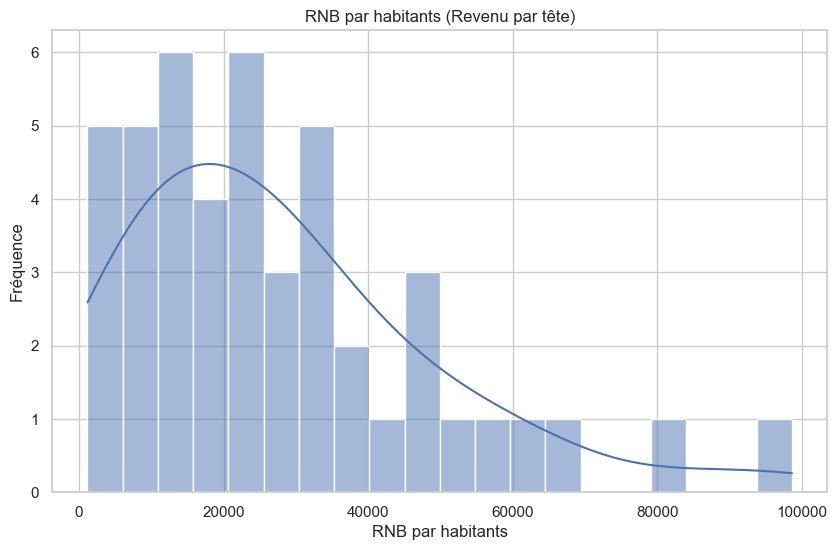

In [147]:
#Histogramme pour l'indicateur SE.SEC.ENRR (2015)
plt.figure(figsize=(10, 6))
sns.histplot(df_final_ny['2015_NY.GNP.PCAP.PP.CD'], bins=20, kde=True)
plt.title('RNB par habitants (Revenu par tête)')
plt.xlabel('RNB par habitants')
plt.ylabel('Fréquence')
plt.show()

La majorité des pays ou régions représentés ont une RNB par habitant modéré (autour des 20000), avec un nombre nettement plus faible de pays ayant un RNB par habitants élevé.

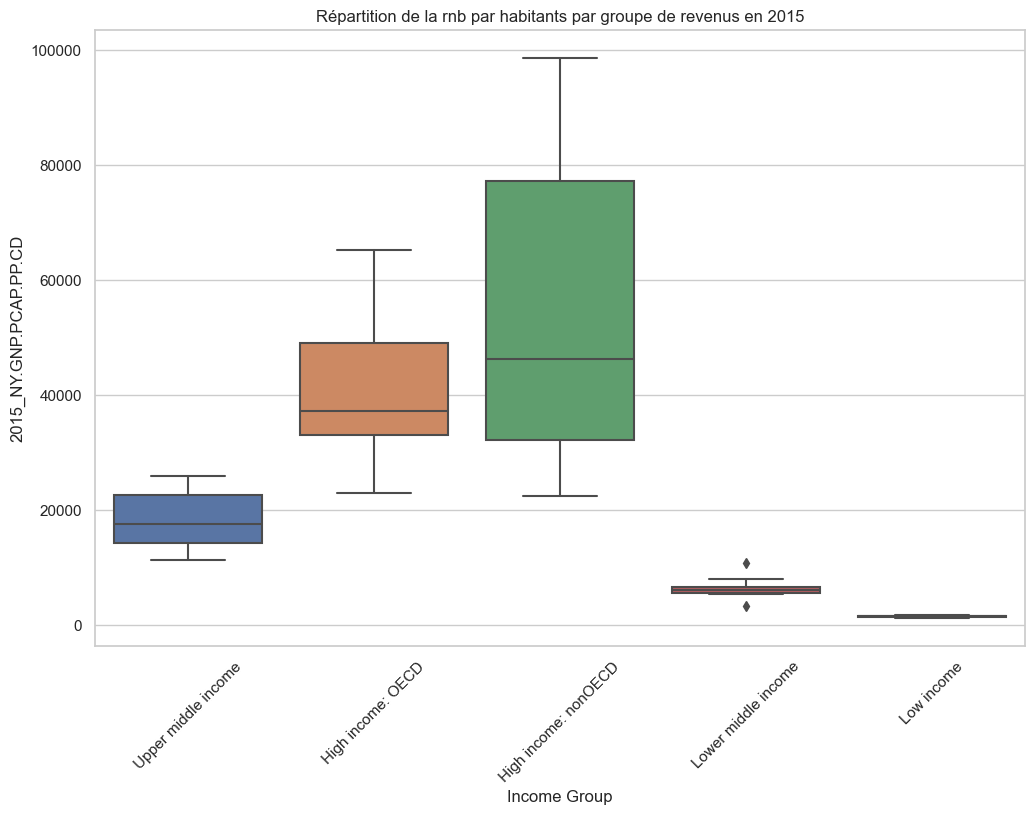

In [148]:
#Boxplot par Income Group pour SP.POP.1524.TO.UN en 2015
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Group', y='2015_NY.GNP.PCAP.PP.CD', data=df_final_ny)
plt.title('Répartition de la rnb par habitants par groupe de revenus en 2015')
plt.xticks(rotation=45)
plt.show()

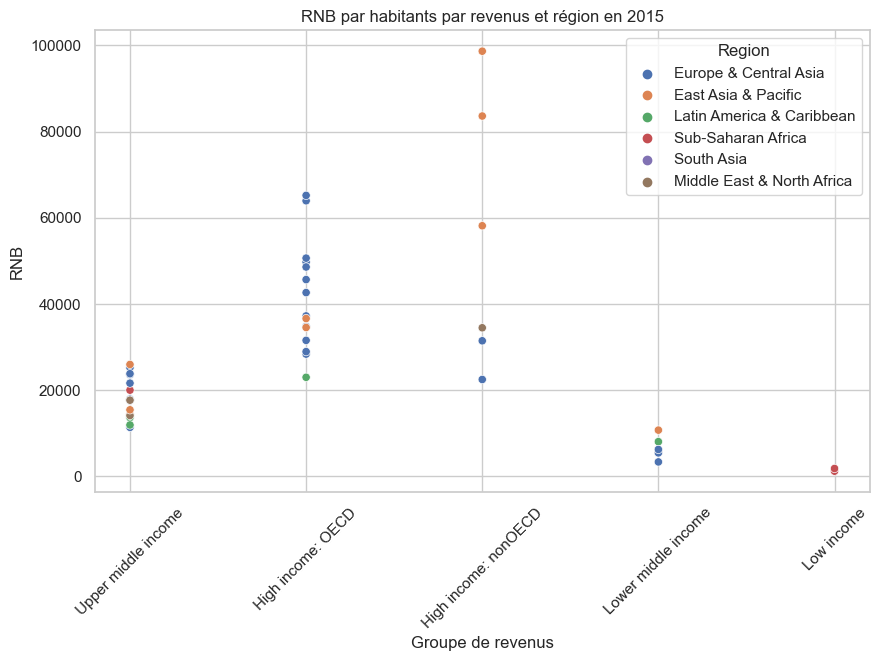

In [149]:
#Scatter plot par groupe de revenus (2015)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income Group', y='2015_NY.GNP.PCAP.PP.CD', hue='Region', data=df_final_ny)
plt.title('RNB par habitants par revenus et région en 2015')
plt.xlabel('Groupe de revenus')
plt.ylabel('RNB')
plt.xticks(rotation=45)
plt.show()

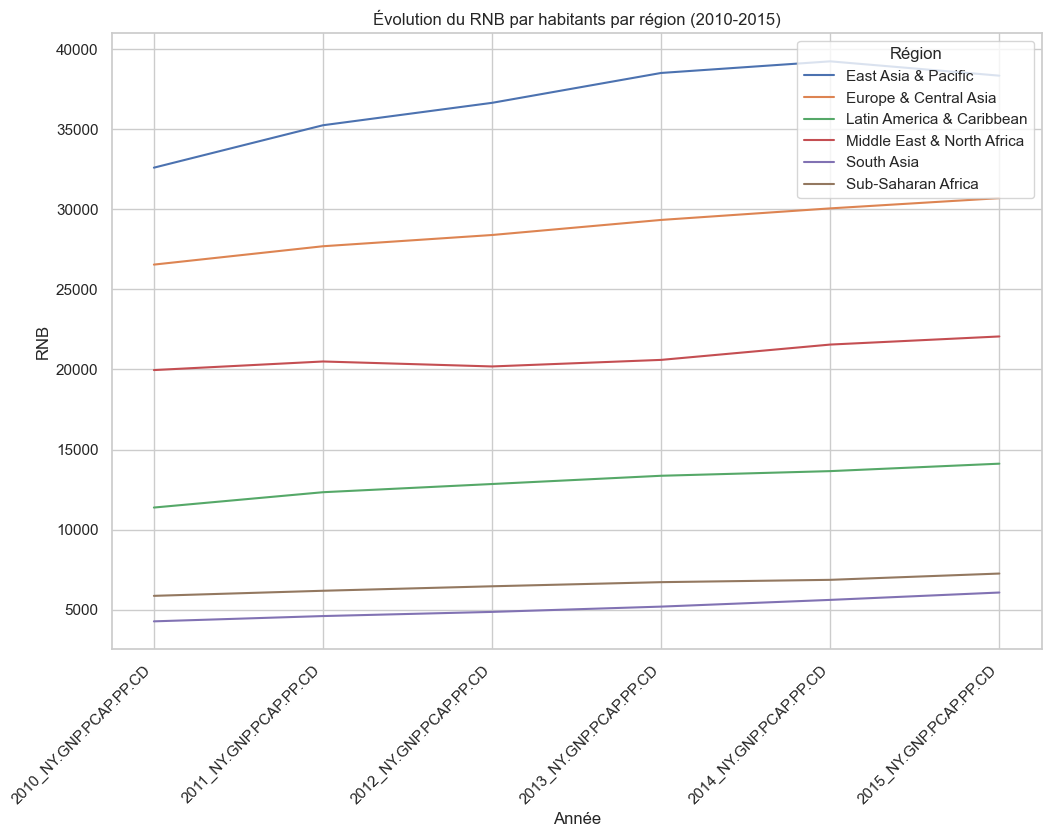

In [150]:
#Agrégation des données par région pour chaque année
df_region_ny = df_final_ny.groupby('Region')[['2010_NY.GNP.PCAP.PP.CD', '2011_NY.GNP.PCAP.PP.CD','2012_NY.GNP.PCAP.PP.CD','2013_NY.GNP.PCAP.PP.CD','2014_NY.GNP.PCAP.PP.CD','2015_NY.GNP.PCAP.PP.CD']].mean()

# Graphique linéaire de l'évolution de l'utilisation d'Internet par région
df_region_ny.T.plot(figsize=(12, 8))
plt.title('Évolution du RNB par habitants par région (2010-2015)')
plt.xlabel('Année')
plt.ylabel('RNB')
plt.legend(title='Région')
plt.xticks(rotation=45, ha="right")  # 45 degrés pour incliner les étiquettes, et ha="right" pour les aligner à droite
plt.show()

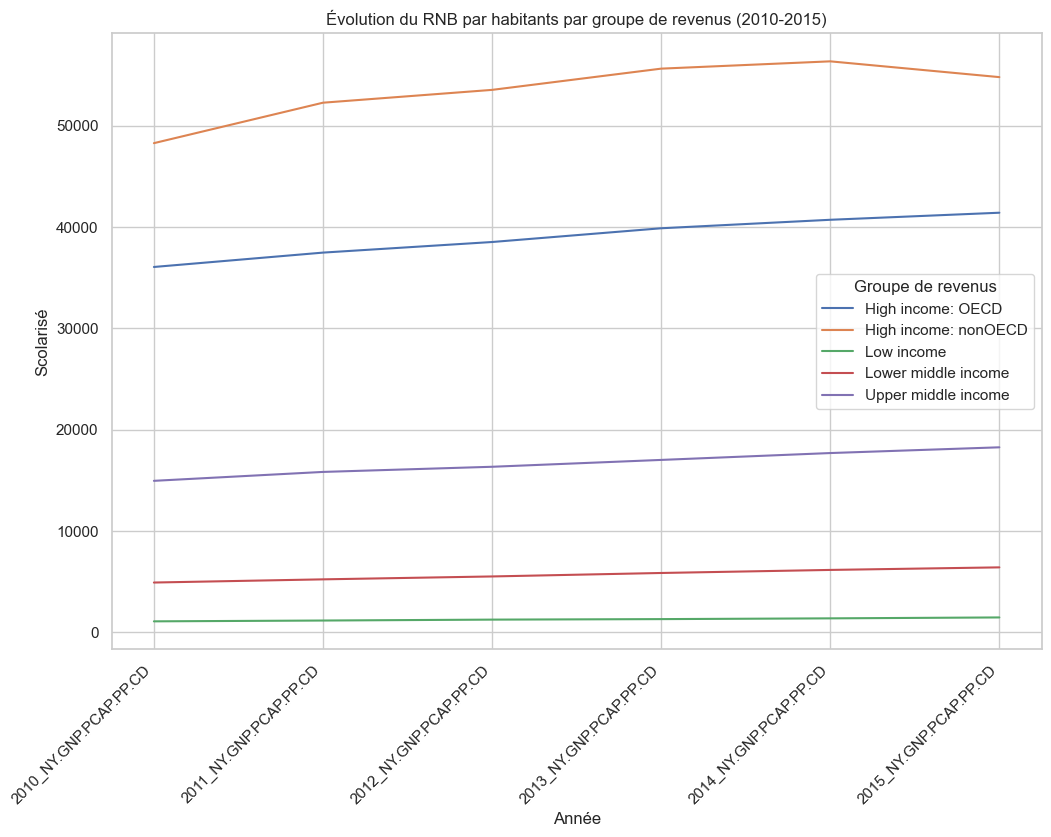

In [151]:
#Agrégation des données par groupe de revenus pour chaque année
df_income_ny = df_final_ny.groupby('Income Group')[['2010_NY.GNP.PCAP.PP.CD', '2011_NY.GNP.PCAP.PP.CD','2012_NY.GNP.PCAP.PP.CD','2013_NY.GNP.PCAP.PP.CD','2014_NY.GNP.PCAP.PP.CD','2015_NY.GNP.PCAP.PP.CD']].mean()

# Graphique linéaire de l'évolution de l'utilisation d'Internet par groupe de revenus
df_income_ny.T.plot(figsize=(12, 8))
plt.title('Évolution du RNB par habitants par groupe de revenus (2010-2015)')
plt.xlabel('Année')
plt.ylabel('Scolarisé')
plt.legend(title='Groupe de revenus')
plt.xticks(rotation=45, ha="right")  #45 degrés pour incliner les étiquettes, et ha="right" pour les aligner à droite
plt.show()

(change l'angle des années sur certains graphs ils se chevauche)
Le PIB par habitant dépend beaucoup de l'activité économique d'un pays ainsi que de son nombre d'habitants, comme les pays plus aisés ne sont pas forcément ceux ou il y a le plus d'habitant, le PIB par habitants est moindre, alors que pour les pays moins aisés il peut y avoir beaucoup d'habitants mais peu d'activité economique. 
On constate une évolution du PIB par habitants pour tout les groupes de revenus car les pays riches continuent de développer leur activité economique et les pays moins aisés, eux, essaie aussi de développer ces activités economiques. 

Après les analyses par indicateurs, j'ai choisi d'utiliser la méthode stat Eta², L'Eta² mesure la proportion de la variance totale d'une variable continue expliquée (comme l'utilisation d'internet ) par une variable catégorielle (région et les groupes de revenus).

Eta² entre la région et l'utilisation d'Internet en 2015 : 0.332


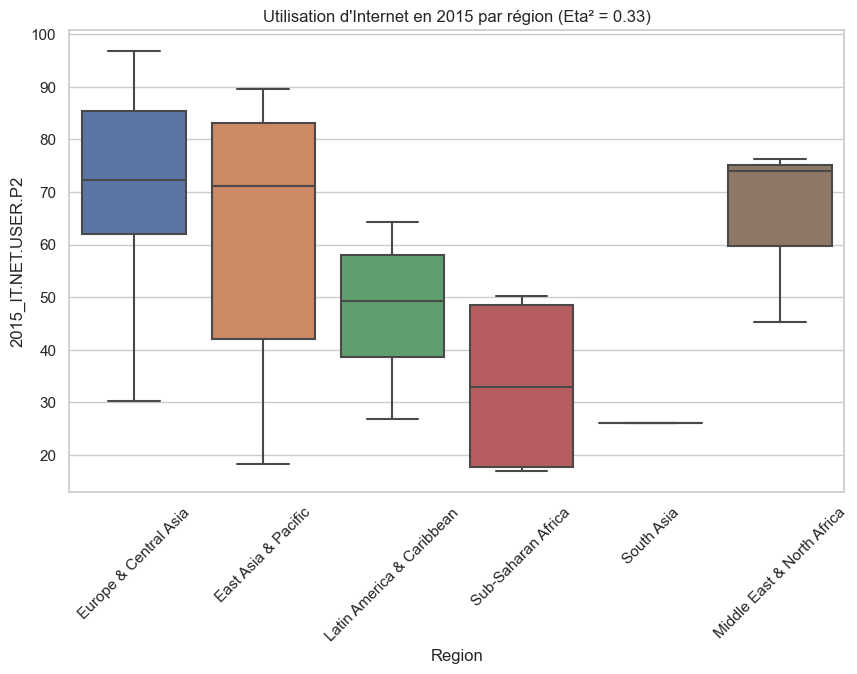

In [152]:
#Fonction pour calculer Eta²
def eta_squared(x, y):
    mean_y = y.mean()  # Moyenne générale de la variable continue
    ss_total = sum((y - mean_y)**2)  # Somme des carrés totale
    ss_between = sum(y.groupby(x).apply(lambda g: len(g) * (g.mean() - mean_y)**2))  # Somme des carrés entre les groupes
    eta2 = ss_between / ss_total
    return eta2

#Calcul de Eta² pour 'Region' et '2015_IT.NET.USER.P2'
eta2_region = eta_squared(df_final_it['Region'], df_final_it['2015_IT.NET.USER.P2'])
print(f'Eta² entre la région et l\'utilisation d\'Internet en 2015 : {eta2_region:.3f}')

# Visualisation avec boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='2015_IT.NET.USER.P2', data=df_final_it)
plt.title(f'Utilisation d\'Internet en 2015 par région (Eta² = {eta2_region:.2f})')
plt.xticks(rotation=45)
plt.show()

Eta² entre les groupes de revenus et l'utilisation d'Internet en 2015 : 0.761


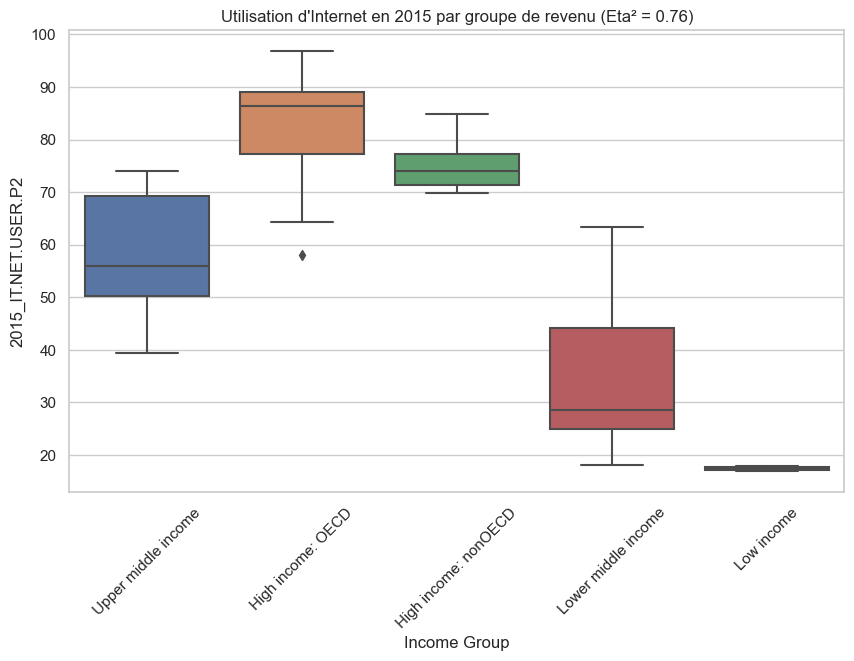

In [153]:
#Fonction pour calculer Eta²
def eta_squared(x, y):
    mean_y = y.mean()  # Moyenne générale de la variable continue
    ss_total = sum((y - mean_y)**2)  # Somme des carrés totale
    ss_between = sum(y.groupby(x).apply(lambda g: len(g) * (g.mean() - mean_y)**2))  # Somme des carrés entre les groupes
    eta2 = ss_between / ss_total
    return eta2

#Calcul de Eta² pour 'Region' et '2015_IT.NET.USER.P2'
eta2_region = eta_squared(df_final_it['Income Group'], df_final_it['2015_IT.NET.USER.P2'])
print(f'Eta² entre les groupes de revenus et l\'utilisation d\'Internet en 2015 : {eta2_region:.3f}')

#Visualisation avec boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Group', y='2015_IT.NET.USER.P2', data=df_final_it)
plt.title(f'Utilisation d\'Internet en 2015 par groupe de revenu (Eta² = {eta2_region:.2f})')
plt.xticks(rotation=45)
plt.show()

L'Eta² de 0.332 pour la région, et maintenant un Eta² de 0.761 pour les groupes de revenus. Cela signifie que le groupe de revenus a un impact beaucoup plus fort sur l'utilisation d'Internet que la région géographique.

Eta² entre la région et le taux de scolarisation dans le secondaire : 0.374


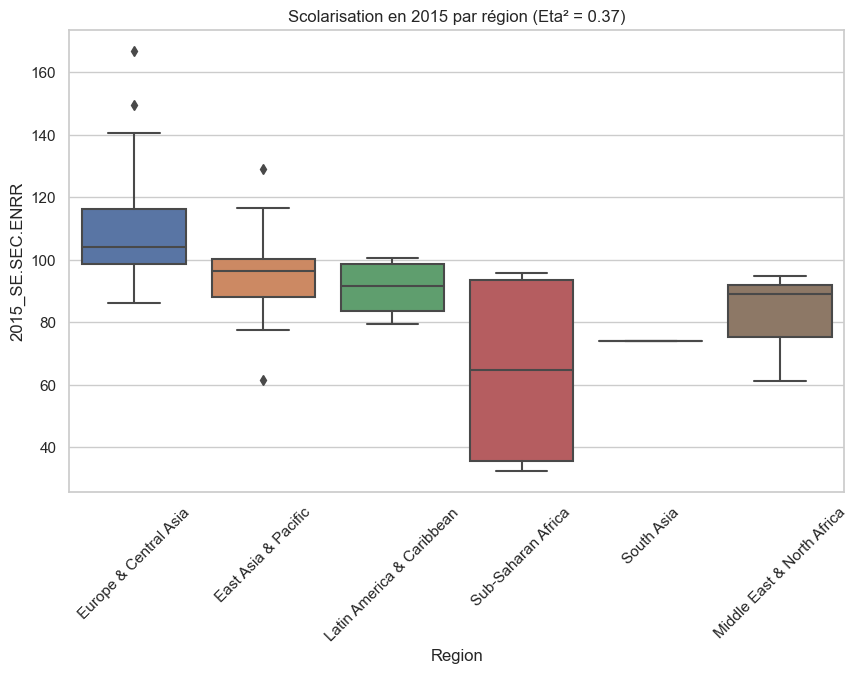

In [154]:
#Calcul de Eta² pour 'Region' et '2015_SE.SEC.ENRR'
eta2_region = eta_squared(df_final_se_sec['Region'], df_final_se_sec['2015_SE.SEC.ENRR'])
print(f'Eta² entre la région et le taux de scolarisation dans le secondaire : {eta2_region:.3f}')

# Visualisation avec boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='2015_SE.SEC.ENRR', data=df_final_se_sec)
plt.title(f'Scolarisation en 2015 par région (Eta² = {eta2_region:.2f})')
plt.xticks(rotation=45)
plt.show()

Eta² entre la région et le taux de scolarisation en 2015 : 0.623


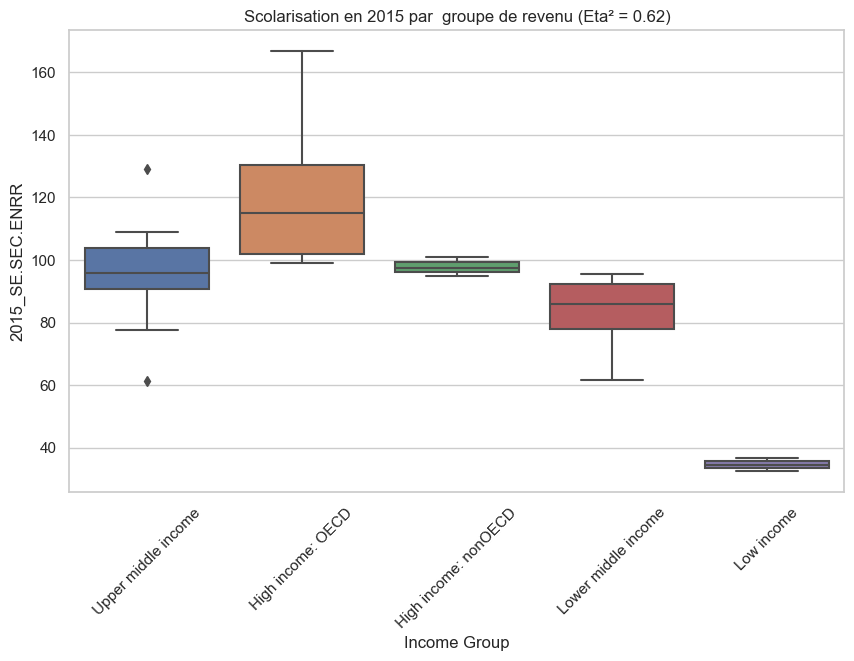

In [155]:
#Calcul de Eta² pour 'Region' et '2015_SP.POP.1524.TO.UN'
eta2_region = eta_squared(df_final_se_sec['Income Group'], df_final_se_sec['2015_SE.SEC.ENRR'])
print(f'Eta² entre la région et le taux de scolarisation en 2015 : {eta2_region:.3f}')

# Visualisation avec boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Group', y='2015_SE.SEC.ENRR', data=df_final_se_sec)
plt.title(f'Scolarisation en 2015 par  groupe de revenu (Eta² = {eta2_region:.2f})')
plt.xticks(rotation=45)
plt.show()

Comme pour internet, le taux de scolarisation est plus significatif avec le groupe de revenu (Eta² : 0.62) comparé au région (0.37)

Eta² entre la région et la population 15-24 ans  : 0.110


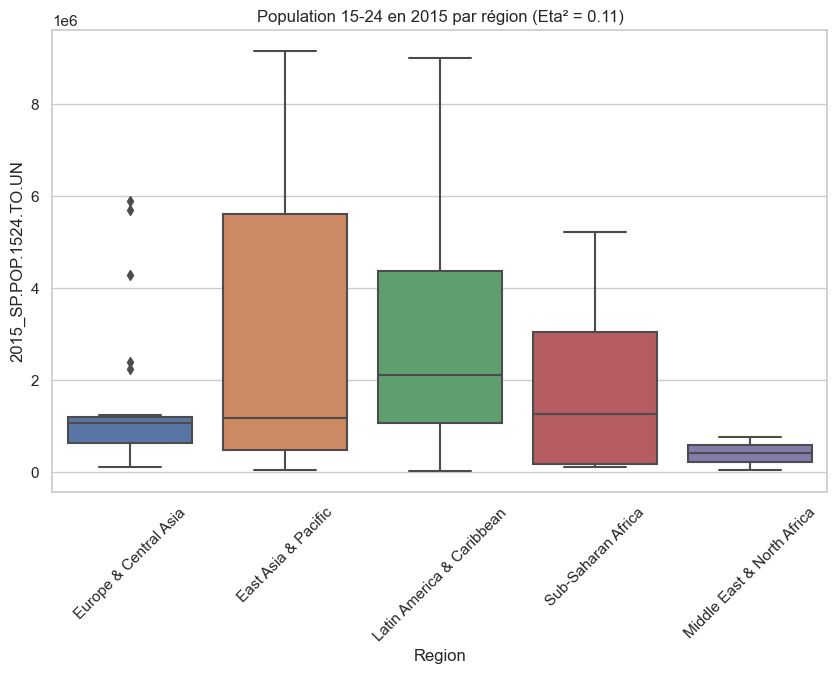

In [156]:
#Calcul de Eta² pour 'Groupe de revenu' et '2015_SP.POP.1524.TO.UN'
eta2_region = eta_squared(non_outliers['Region'], non_outliers['2015_SP.POP.1524.TO.UN'])
print(f'Eta² entre la région et la population 15-24 ans  : {eta2_region:.3f}')

# Visualisation avec boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='2015_SP.POP.1524.TO.UN', data=non_outliers)
plt.title(f'Population 15-24 en 2015 par région (Eta² = {eta2_region:.2f})')
plt.xticks(rotation=45)
plt.show()

Eta² entre les groupes de revenus et la population 15-24 ans : 0.133


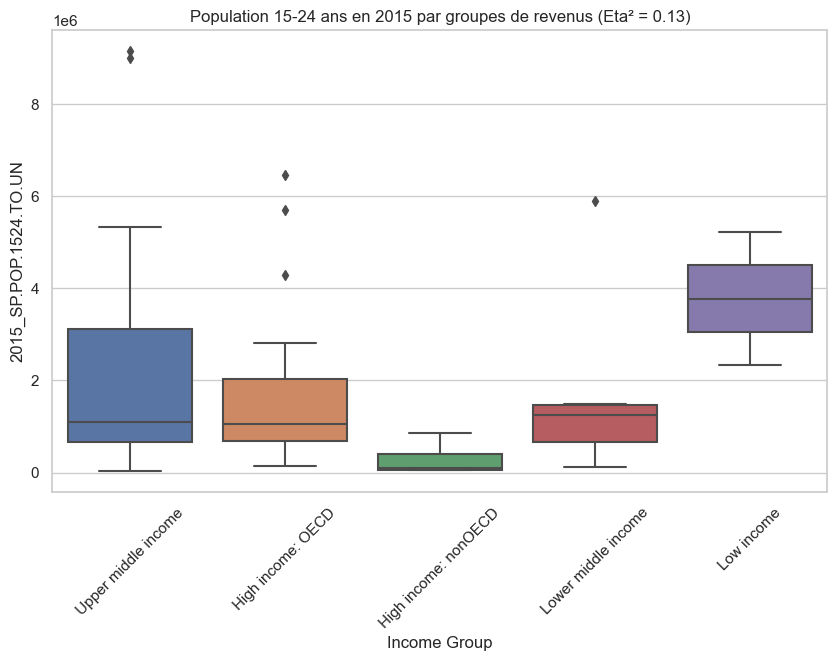

In [157]:
#Calcul de Eta² pour 'Region' et '2015_SE.SEC.ENRR'
eta2_region = eta_squared(non_outliers['Income Group'], non_outliers['2015_SP.POP.1524.TO.UN'])
print(f'Eta² entre les groupes de revenus et la population 15-24 ans : {eta2_region:.3f}')

# Visualisation avec boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Group', y='2015_SP.POP.1524.TO.UN', data=non_outliers)
plt.title(f'Population 15-24 ans en 2015 par groupes de revenus (Eta² = {eta2_region:.2f})')
plt.xticks(rotation=45)
plt.show()

Forte relation entre la population et les régions au vue du résultat, ce qui montre que les groupes de revenu n'ont aucun impact sur la population d'une région.

Eta² entre la région et le taux de scolarisation en tertiaire  : 0.319


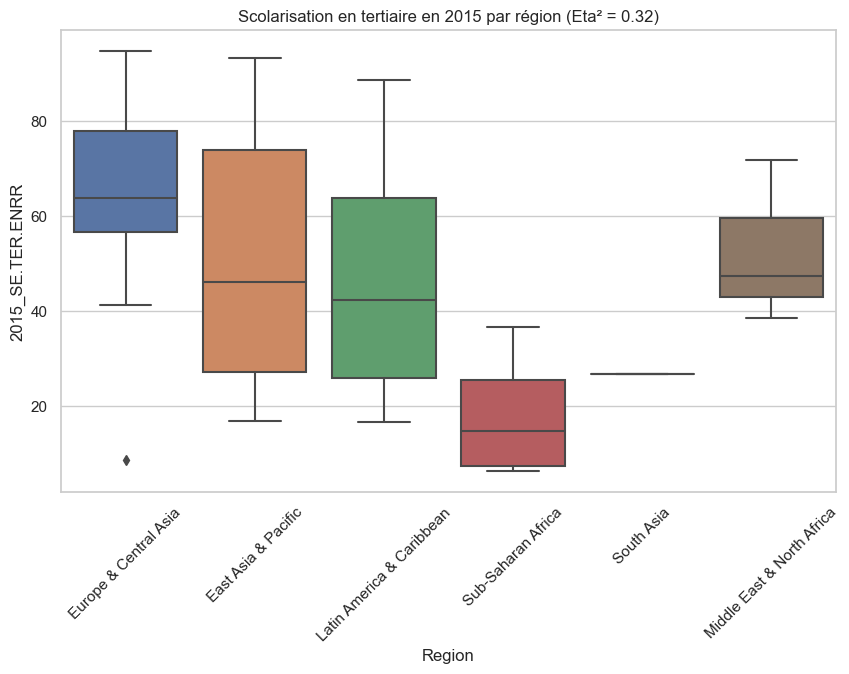

In [158]:
#Calcul de Eta² pour 'Region' et '2015_SE.TER.ENRR'
eta2_region = eta_squared(df_final_se_ter['Region'], df_final_se_ter['2015_SE.TER.ENRR'])
print(f'Eta² entre la région et le taux de scolarisation en tertiaire  : {eta2_region:.3f}')

# Visualisation avec boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='2015_SE.TER.ENRR', data=df_final_se_ter)
plt.title(f'Scolarisation en tertiaire en 2015 par région (Eta² = {eta2_region:.2f})')
plt.xticks(rotation=45)
plt.show()

Eta² entre les groupes de revenus et la scolarisation en tertiaire : 0.616


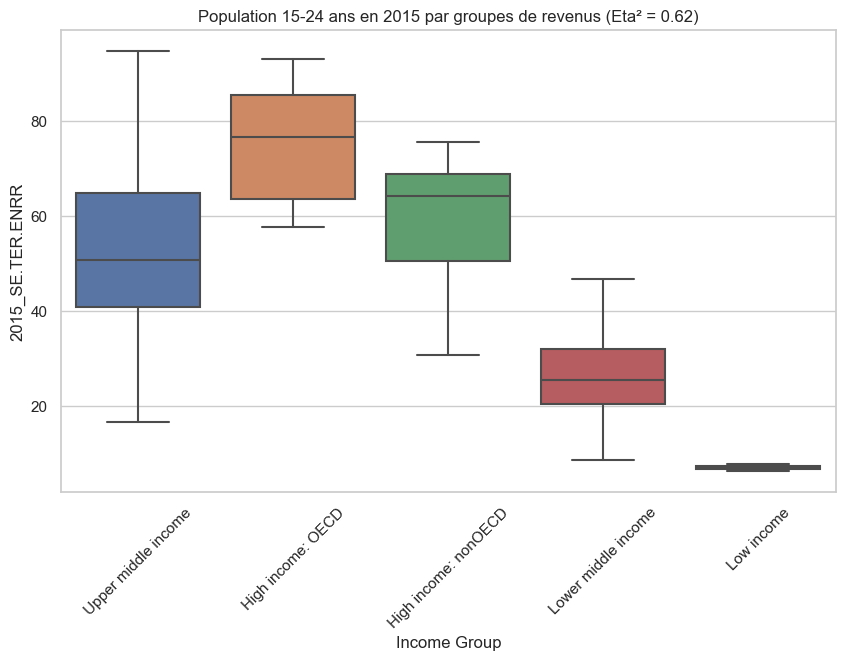

In [159]:
#Calcul de Eta² pour 'Income Group' et '2015_SE.TER.ENRR'
eta2_region = eta_squared(df_final_se_ter['Income Group'], df_final_se_ter['2015_SE.TER.ENRR'])
print(f'Eta² entre les groupes de revenus et la scolarisation en tertiaire : {eta2_region:.3f}')

# Visualisation avec boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Group', y='2015_SE.TER.ENRR', data=df_final_se_ter)
plt.title(f'Population 15-24 ans en 2015 par groupes de revenus (Eta² = {eta2_region:.2f})')
plt.xticks(rotation=45)
plt.show()

Pareil pour le taux de scolarisation dans le tertiaire, les résultats montrent que  le taux de scolarisation dépend beaucoup plus du revenu que de la région.

Eta² entre la région et le taux de scolarisation en tertiaire  : 0.207


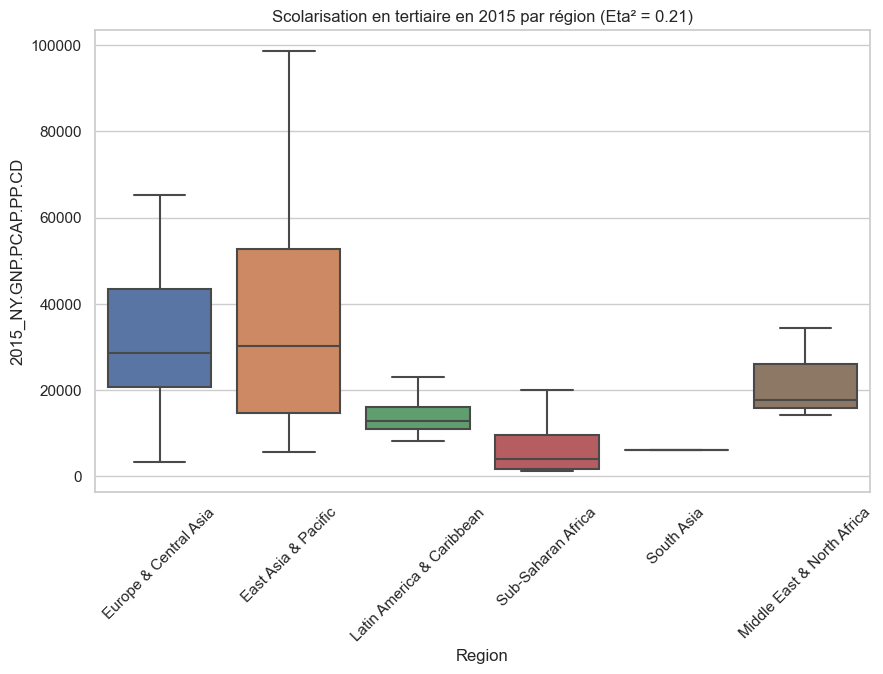

In [160]:
#Calcul de Eta² pour 'Region' et '2015_SE.SEC.ENRR'
eta2_region = eta_squared(df_final_ny['Region'], df_final_ny['2015_NY.GNP.PCAP.PP.CD'])
print(f'Eta² entre la région et le taux de scolarisation en tertiaire  : {eta2_region:.3f}')

# Visualisation avec boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='2015_NY.GNP.PCAP.PP.CD', data=df_final_ny)
plt.title(f'Scolarisation en tertiaire en 2015 par région (Eta² = {eta2_region:.2f})')
plt.xticks(rotation=45)
plt.show()

Eta² entre les groupes de revenus et la scolarisation en tertiaire : 0.649


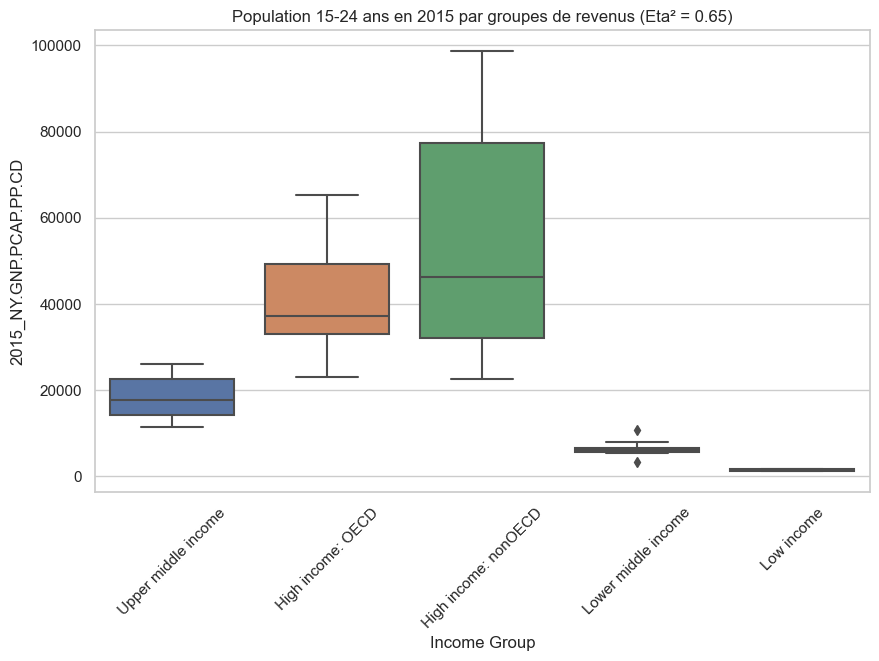

In [161]:
#Calcul de Eta² pour 'Region' et '2015_SE.TER.ENRR'
eta2_region = eta_squared(df_final_ny['Income Group'], df_final_ny['2015_NY.GNP.PCAP.PP.CD'])
print(f'Eta² entre les groupes de revenus et la scolarisation en tertiaire : {eta2_region:.3f}')

# Visualisation avec boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Group', y='2015_NY.GNP.PCAP.PP.CD', data=df_final_ny)
plt.title(f'Population 15-24 ans en 2015 par groupes de revenus (Eta² = {eta2_region:.2f})')
plt.xticks(rotation=45)
plt.show()

# 5.Analyse par groupe de revenus

In [162]:
#Filtrer les groupes de revenus pertinents
income_groups = ['Upper middle income', 'High income: OECD', 'High income: NonOECD']
df_filtered_income = df_final[df_final['Income Group'].isin(income_groups)]
df_filtered_income

Country Code  2010_IT.NET.USER.P2  2010_NY.GNP.PCAP.PP.CD  \
0           ALB                45.00                  9550.0   
1           AUT                75.17                 42440.0   
2           BEL                75.00                 41390.0   
3           BGR                46.23                 14650.0   
4           BLR                31.80                 15600.0   
6           CHE                83.90                 56140.0   
7           CHL                45.00                 17050.0   
8           CHN                34.30                  9290.0   
9           COL                36.50                 10260.0   
12          CZE                68.82                 25580.0   
13          DNK                88.72                 43790.0   
14          ESP                65.80                 31540.0   
15          EST                74.10                 20480.0   
16          FIN                86.89                 39340.0   
19          HUN                65.00                 20470.0   
22          IRN                15.90                 17580.0   
23          ITA                53.68                 35010.0   
24          KAZ                31.60                 17110.0   
26          KOR                83.70                 30410.0   
28          LBN                43.68                 15910.0   
29          LCA                43.30                 11230.0   
34          MUS                28.33                 15800.0   
35          MYS                56.30                 20020.0   
36          NOR                93.39                 58620.0   
37          NZL                80.46                 29710.0   
38          PRT                53.30                 26440.0   
39          ROU                39.93                 16920.0   
42          SWE                90.00                 42890.0   
43          THA                22.40                 12660.0   
44          TUR                39.82                 17310.0   

    2010_SE.SEC.ENRR  2010_SE.TER.ENRR  2010_SP.POP.1524.TO.UN  \
0          88.411636         44.540649                608456.0   
1          98.862244         68.732178               1008570.0   
2         105.785881         67.710922               1263290.0   
3          90.424652         58.011002                900248.0   
4         107.057869         79.421013               1402878.0   
6          95.861473         52.792740                953955.0   
7          94.573708         69.674110               2950659.0   
8          84.921158         23.947920             218974009.0   
9         102.020622         39.409100               8807400.0   
12         94.828903         64.018982               1257862.0   
13        119.569389         73.619652                670436.0   
14        124.384064         78.670288               4607799.0   
15        105.296242         68.188560                184115.0   
16        107.272591         94.119141                656220.0   
19         99.934181         60.368221               1241953.0   
22         81.955048         42.605572              16748549.0   
23        102.212700         66.204277               5810621.0   
24         97.734497         46.045910               2914209.0   
26         96.079788         99.660339               6619654.0   
28         75.304779         48.412060                745112.0   
29         95.208939         12.492880                 32358.0   
34         89.246964         33.691818                203437.0   
35         66.881042         37.134590               5199376.0   
36        113.230553         72.886917                625849.0   
37        118.951630         82.517502                622920.0   
38        106.947952         65.660210               1192997.0   
39        100.238693         67.808311               2856321.0   
42         98.190659         74.684128               1229643.0   
43         83.621452         50.202621               9667306.0   
44         84.204231         55.999062

In [163]:
def normalize_indicators(df, indicators):
    #Créer une copie du DataFrame
    df_normalized = df.copy()
    
    #Appliquer la normalisation Min-Max à chaque indicateur
    for indicator in indicators:
        min_value = df[indicator].min()
        max_value = df[indicator].max()
        
        #Appliquer la normalisation
        df_normalized[indicator] = (df[indicator] - min_value) / (max_value - min_value)
    
    return df_normalized

In [164]:
def calculate_weighted_scores(normalized_df, indicators, weights):
    #Ajouter une colonne Score initialisée à 0
    normalized_df['Weighted Score'] = 0
    
    #Calculer le score pondéré pour chaque indicateur
    for indicator in indicators:
        weight = weights.get(indicator, 1)  # Appliquer la pondération (par défaut 1 si non spécifié)
        normalized_df['Weighted Score'] += normalized_df[indicator] * weight
    
    return normalized_df

In [165]:
#Liste des indicateurs
indicators = ['2015_IT.NET.USER.P2', '2015_SE.SEC.ENRR', '2015_SP.POP.1524.TO.UN', '2015_SE.TER.ENRR', '2015_NY.GNP.PCAP.PP.CD']

#Pondérations des indicateurs
weights = {
    '2015_IT.NET.USER.P2': 1.5,  
    '2015_SE.SEC.ENRR': 1.2,
    '2015_SP.POP.1524.TO.UN': 1.0,  
    '2015_SE.TER.ENRR': 1.3,    
    '2015_NY.GNP.PCAP.PP.CD': 1.4
}

#Normaliser les données
normalized_df = normalize_indicators(df_filtered_income, indicators)

#Calculer les scores pondérés
scored_df = calculate_weighted_scores(normalized_df, indicators, weights)

#Trier les pays en fonction du score pondéré
top_countries_weighted_scores = scored_df[['Country Code','Short Name','2015_IT.NET.USER.P2','2015_SE.SEC.ENRR','2015_SP.POP.1524.TO.UN','2015_SE.TER.ENRR','2015_NY.GNP.PCAP.PP.CD','Weighted Score']].sort_values(by='Weighted Score', ascending=False).head(10)

#Afficher les résultats
print("Top 10 des pays cibles après pondération et normalisation :")
print(top_countries_weighted_scores)

Top 10 des pays cibles après pondération et normalisation :
   Country Code   Short Name  2015_IT.NET.USER.P2  2015_SE.SEC.ENRR  \
36          NOR       Norway             1.000000          0.490361   
13          DNK      Denmark             0.991655          0.659254   
2           BEL      Belgium             0.795503          1.000000   
16          FIN      Finland             0.819318          0.835682   
42          SWE       Sweden             0.892161          0.750483   
6           CHE  Switzerland             0.837701          0.378856   
1           AUT      Austria             0.776148          0.367568   
37          NZL  New Zealand             0.850639          0.524474   
14          ESP        Spain             0.684825          0.649649   
26          KOR        Korea             0.875437          0.356774   

    2015_SP.POP.1524.TO.UN  2015_SE.TER.ENRR  2015_NY.GNP.PCAP.PP.CD  \
36                0.003132          0.768671                1.000000   
13            

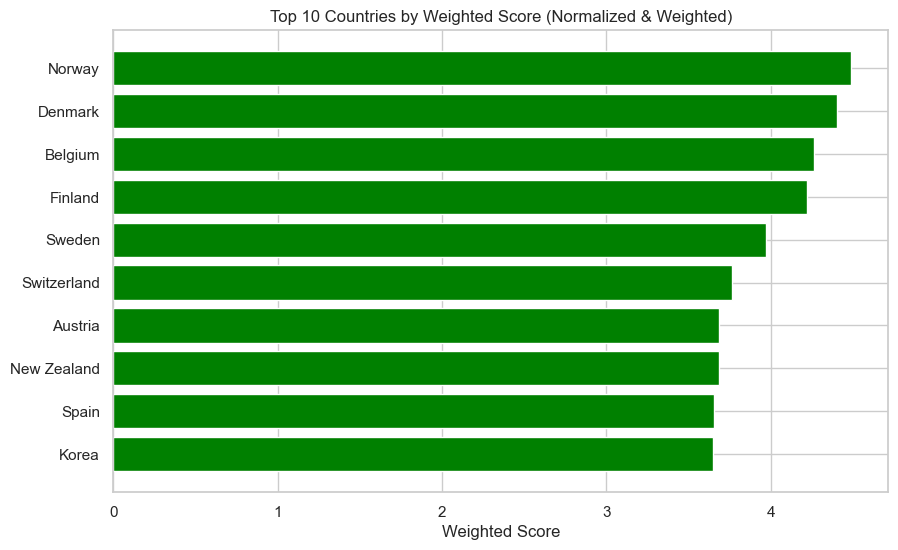

In [166]:
#Visualiser les scores pondérés
plt.figure(figsize=(10, 6))
plt.barh(top_countries_weighted_scores['Short Name'], top_countries_weighted_scores['Weighted Score'], color = 'green')
plt.xlabel('Weighted Score')
plt.title('Top 10 Countries by Weighted Score (Normalized & Weighted)')
plt.gca().invert_yaxis()
plt.show()

Après avoir mis des seuils pour chaque indicateur pertinents, il a fallu sortir 10 pays qui avait les meilleurs scores par indicateurs pour connaître les pays susceptibles d'accueillir notre système de cours en ligne.

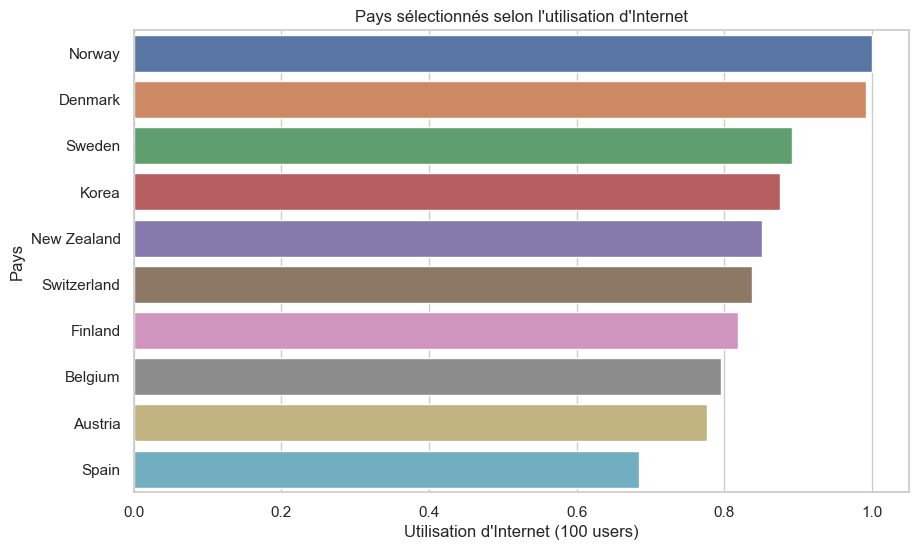

In [167]:
#Graphique des pays sélectionnés selon l'utilisation d'Internet
selected_countries_sorted = top_countries_weighted_scores.sort_values(by='2015_IT.NET.USER.P2', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='2015_IT.NET.USER.P2', y='Short Name', data=selected_countries_sorted)
plt.title('Pays sélectionnés selon l\'utilisation d\'Internet')
plt.xlabel('Utilisation d\'Internet (100 users)')
plt.ylabel('Pays')
plt.show()

Affichage pour les 10 pays de ceux qui ont le plus d'utilisateurs d'internet, les pays nordiques Norvège, Danemark, Suède sont dans le top 3 avec juste derrière la Korea. Cela peut se traduire par des infrastructures de qualité, le niveau d'éducation élevé de ces pays (meilleure compréhension des outils), une forte culture à l'innovation, une politique gouvernementale favorable à cela. 

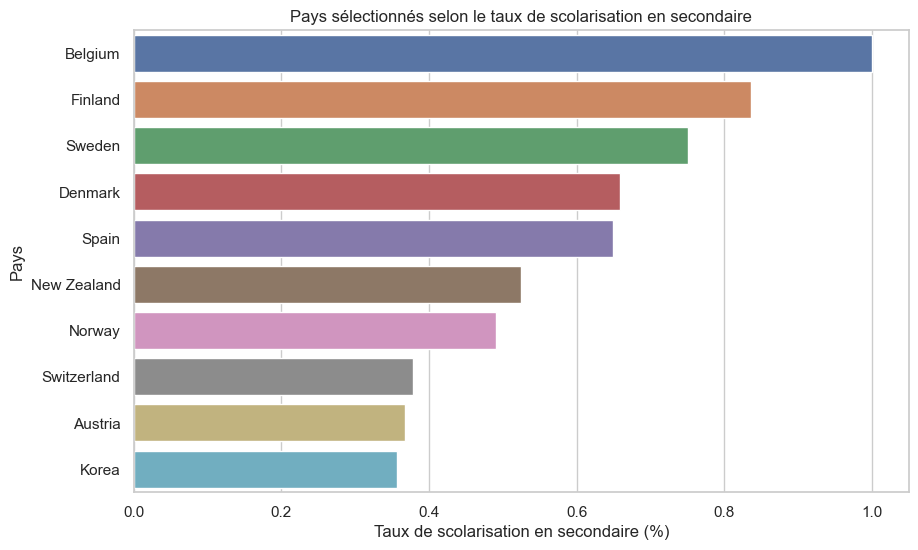

In [168]:
#Graphique des pays sélectionnés selon l'utilisation d'Internet
selected_countries_sorted_1 = top_countries_weighted_scores.sort_values(by='2015_SE.SEC.ENRR', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='2015_SE.SEC.ENRR', y='Short Name', data=selected_countries_sorted_1)
plt.title('Pays sélectionnés selon le taux de scolarisation en secondaire')
plt.xlabel('Taux de scolarisation en secondaire (%)')
plt.ylabel('Pays')
plt.show()

Pour le taux de scolarisation en secondaire, le top 3 est différent de celui d'avant, on retrouve Belgique, Finland, Suède. Des pays européens dont deux pays nordiques, cela peut s'expliquer par une accèssibilité aux infrastructures plus intéressantes (géographique et de qualité), l'investissement dans la politique éducative, le soutient familial et culturel ainsi que la stabilité politique d'un pays. 

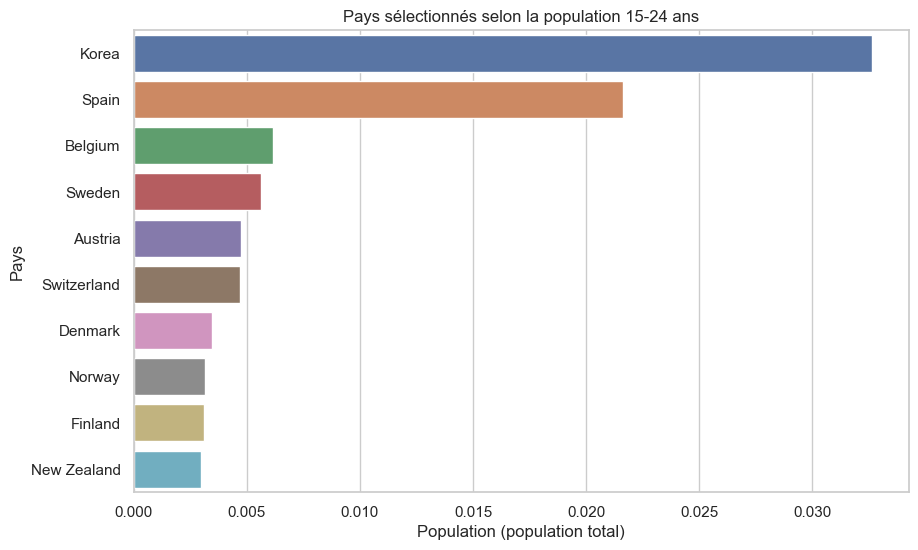

In [169]:
#Graphique des pays sélectionnés selon la population 15-24 ans
selected_countries_sorted_2 = top_countries_weighted_scores.sort_values(by='2015_SP.POP.1524.TO.UN', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='2015_SP.POP.1524.TO.UN', y='Short Name', data=selected_countries_sorted_2)
plt.title('Pays sélectionnés selon la population 15-24 ans')
plt.xlabel('Population (population total)')
plt.ylabel('Pays')
plt.show()

Dans le top 3 en terme de population j'ai la Korea, l'Espagne et la Beligique, ce qui s'explique par une croissance démographique rapide pour la Korea, un développement économique aussi très rapide et une urbanisation de la population.

Pour l'Espagne cela peut s'expliquer par une attractivité touristique et l'immigration (climat favorable, culture, opportinuté economique), une politique favorable à la natalité (congés parentaux, subventions de naissance).

Pour la Belgique, l'immigration est aussi un point important au vu de son placement géographique (coeur de l'europe), un taux de natalité stable avec une bonne croissance grâce aux facteurs fertilité et immigration. Ainsi qu'une urbanisation de la population.

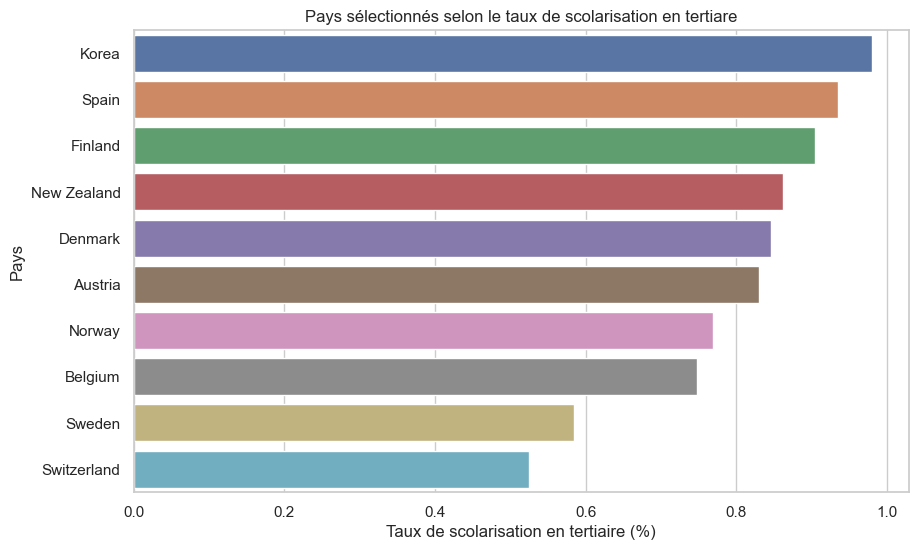

In [170]:
#Graphique des pays sélectionnés selon le taux de scolarisation en tertiare
selected_countries_sorted_3 = top_countries_weighted_scores.sort_values(by='2015_SE.TER.ENRR', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='2015_SE.TER.ENRR', y='Short Name', data=selected_countries_sorted_3)
plt.title('Pays sélectionnés selon le taux de scolarisation en tertiare')
plt.xlabel('Taux de scolarisation en tertiaire (%)')
plt.ylabel('Pays')
plt.show()

Dans le top 3 j'ai Korea, Spain, Finland. Pour la Korea, l'investissement de l'état dans l'éducation est un moteur de croissance économique, les familles poussent aussi à l'éducation. La société accorde de plus en plus d'importance à l'éducation et l'enseignement supérieur. La réputation des infrastructures scolaires permet d'attirer des étudiants nationaux mais aussi internationaux.

L'Espagne a un système d'enseignement supérieur accésible à tous, avec des universités publiques et privées. La politique gourvernementale pousse aussi à l'enseignement supérieur. Et la valorisation de l'éducation dans le marché du travail pousse les jeunes à faire des études.

La Finlande dispose d'un système éducatif de haute qualité (infrastructure, qualité de l'enseignement, bien être), une éducation en grande partie gratuite qui permet à tous de venir étudier et une culture de l'apprentissage importe dans ce pays. 

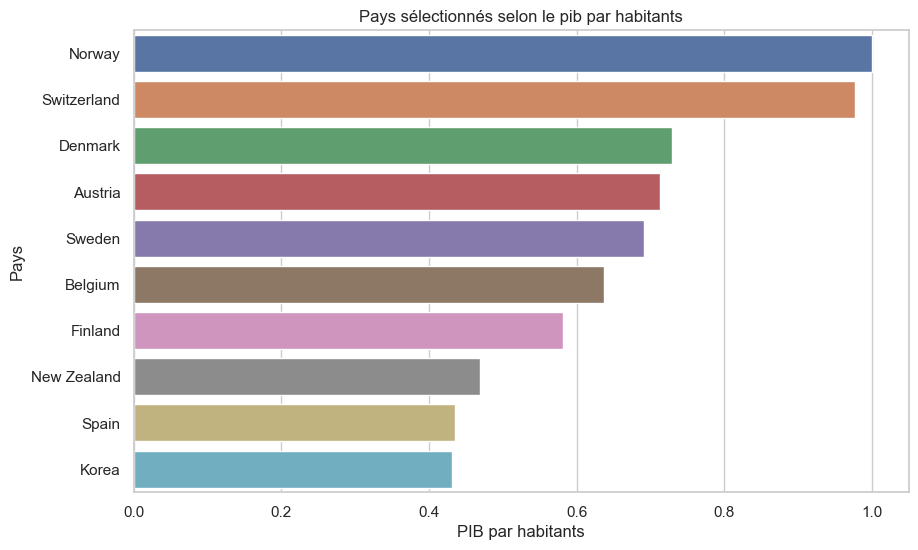

In [171]:
#Graphique des pays sélectionnés selon le pib par habitants
selected_countries_sorted_4 = top_countries_weighted_scores.sort_values(by='2015_NY.GNP.PCAP.PP.CD', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='2015_NY.GNP.PCAP.PP.CD', y='Short Name', data=selected_countries_sorted_4)
plt.title('Pays sélectionnés selon le pib par habitants')
plt.xlabel('PIB par habitants')
plt.ylabel('Pays')
plt.show()

Dans le top du PIB par habitant j'ai la Norvège, la Suisse et le Danemark. Cela s'explique pour la Norvège car le pays posséde d'importantes ressources naturelles (pétrole/gaz), leur exploitation a permis d'augmenter les richesses du pays, leur économie est diversifié en plus des hydrocarbures, il y a la pêche, l'aquaculture ou les technologie maritimes qui permettent de garder une stabilité économique, et le système social de ce pays qui contribue au bien-être, à l'éducation, la santé et les bonnes infrastructures permet de garder un niveau de vie élevé et une main d'oeuvre de qualité.

Pour la Suisse, le secteur financier est puissant (système bancaire) qui attire des investissements étrangers, l'indutrie de la haute tech comme la pharmacie, la biotech ou l'ingénierie qui permet les salaires élevés et une productivité accrue. La stabilité politique, la faible inflation et la valeur forte de la monnaie contribue à des investissements forts pour ce pays. 

Le Danemark dispose d'une économie diversifié et innovante comme l'agriculture, l'industrie agro, l'énergie renouvelable qui favorise la croissance économique. Un système de protection sociale qui garantie bien-être et santé (niveau de vie élevé et main d'oeuvre de compétence).

#### Conclusion : 

Le classement Norvège, Danemark, Belgique est cohérent comme pays ciblé. La Belgique est un pays stable économiquement et en terme de qualité de vie. 

La Norvège et le Danemark ont un bon PIB car une économie développé, ressources naturelles importantes, la Belgique est un pays très compétitif même si pas un PIB très important. 

En terme d'éducation et scolarisation, les pays nordiques sont de plus en plus reconnus pour leur systèmes éducatifs de qualité et le taux de scolarisation en tertiaire et secondaire intéressant, la Belgique se démarque aussi par ces infrastructures de qualités, politique gouvernementale favorisant l'éducation.

L'utilisation d'internet est de mieux en mieux dans ces pays, avec du matériel de qualité, la politique d'utilisation des nouvelles technologies.

Ces pays sont souvent classés dans le top en terme de qualité de vie, d'égalité ou de développement humain.

# 5.Prédiction <a class="anchor" id="5.Prediction"></a>

In [172]:
#faire les mêmes analyses statistique sur les données de prédictions de 2020 - 2100
top_countries_weighted_scores

Country Code   Short Name  2015_IT.NET.USER.P2  2015_SE.SEC.ENRR  \
36          NOR       Norway             1.000000          0.490361   
13          DNK      Denmark             0.991655          0.659254   
2           BEL      Belgium             0.795503          1.000000   
16          FIN      Finland             0.819318          0.835682   
42          SWE       Sweden             0.892161          0.750483   
6           CHE  Switzerland             0.837701          0.378856   
1           AUT      Austria             0.776148          0.367568   
37          NZL  New Zealand             0.850639          0.524474   
14          ESP        Spain             0.684825          0.649649   
26          KOR        Korea             0.875437          0.356774   

    2015_SP.POP.1524.TO.UN  2015_SE.TER.ENRR  2015_NY.GNP.PCAP.PP.CD  \
36                0.003132          0.768671                1.000000   
13                0.003453          0.846789                0.729569   
2                 0.006153          0.747385                0.637073   
16                0.003094          0.904541                0.580981   
42                0.005609          0.584032                0.691308   
6                 0.004716          0.524666                0.976783   
1                 0.004745          0.830802                0.712853   
37                0.002971          0.861466                0.469168   
14                0.021604          0.935073                0.434993   
26                0.032623          0.980079                0.430535   

    Weighted Score  
36        4.490838  
13        4.404261  
2         4.262910  
16        4.224166  
42        3.971503  
6         3.765457  
1         3.688085  
37        3.685038  
14        3.653005  
26        3.650759

In [173]:
#selectionner les 10 pays
select_top_10 = ['NOR','DNK','BEL','FIN','SWE','CHE','AUS','NZL','ESP','KOR']

#Filtrer le DataFrame pour les pays dans le top 10
df_top_10 = df_final[df_final['Country Code'].isin(select_top_10)]

#Afficher le DataFrame filtré
df_top_10.head(10)

Country Code  2010_IT.NET.USER.P2  2010_NY.GNP.PCAP.PP.CD  \
2           BEL                75.00                 41390.0   
6           CHE                83.90                 56140.0   
13          DNK                88.72                 43790.0   
14          ESP                65.80                 31540.0   
16          FIN                86.89                 39340.0   
26          KOR                83.70                 30410.0   
36          NOR                93.39                 58620.0   
37          NZL                80.46                 29710.0   
42          SWE                90.00                 42890.0   

    2010_SE.SEC.ENRR  2010_SE.TER.ENRR  2010_SP.POP.1524.TO.UN  \
2         105.785881         67.710922               1263290.0   
6          95.861473         52.792740                953955.0   
13        119.569389         73.619652                670436.0   
14        124.384064         78.670288               4607799.0   
16        107.272591         94.119141                656220.0   
26         96.079788         99.660339               6619654.0   
36        113.230553         72.886917                625849.0   
37        118.951630         82.517502                622920.0   
42         98.190659         74.684128               1229643.0   

    2011_IT.NET.USER.P2  2011_NY.GNP.PCAP.PP.CD  2011_SE.SEC.ENRR  \
2             81.609996                 41660.0        106.481133   
6             85.193028                 56460.0         96.187630   
13            89.810013                 45340.0        122.801193   
14            67.089999                 31510.0        128.592163   
16            88.709995                 40870.0        107.478218   
26            83.759120                 31410.0         95.735931   
36            93.489983                 62640.0        112.982910   
37            81.230000                 31250.0        119.209839   
42            92.769986                 44720.0         96.911041   

    2011_SE.TER.ENRR  ...  2014_SE.TER.ENRR  2014_SP.POP.1524.TO.UN  \
2          69.725632  ...         73.318802               1248534.0   
6          54.338268  ...         57.229530                964692.0   
13         76.801147  ...         81.516472                707094.0   
14         83.420990  ...         89.072121               4311934.0   
16         95.601837  ...         88.671547                645278.0   
26         99.519402  ...         94.210213               6543025.0   
36         73.085793  ...         76.783157                646489.0   
37         81.707123  ...         80.882942                618646.0   
42         73.945091  ...         62.353481               1161310.0   

    2015_IT.NET.USER.P2  2015_NY.GNP.PCAP.PP.CD  2015_SE.SEC.ENRR  \
2             85.052900                 45640.0        166.808472   
6             87.479056                 63930.0        101.213966   
13            96.330500                 50620.0        130.824738   
14            78.689600                 34760.0        129.810486   
16            86.422133                 42620.0        149.456085   
26            89.648631                 34520.0         98.882088   
36            96.810300                 65180.0        112.989243   
37            88.222889                 36600.0        116.591591   
42            90.610200                 48560.0        140.458832   

    2015_SE.TER.ENRR  2015_SP.POP.1524.TO.UN   Short Name  \
2          75.036827               1241946.0      Belgium   
6          57.672192                959002.0  Switzerland   
13         82.786972                710024.0      Denmark   
14         89.670143               4285743.0        Spain   
16         87.289703                639391.0      Finland   
26         93.179138               6456561.0        Korea   
36         76.696381                646961.0       Norway   
37         83.931320                615099.0  New Zealand   
42         62.300770               1134811.0       Sweden  

In [174]:
#Obtenir la liste des colonnes disponibles
available_columns = data.columns

#Garder colonne nécessaire à la prédiciton
columns_to_keep_pred = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
years_available = [col for col in available_columns if col.isdigit() and 2020 <= int(col) <= 2100]

#Ajouter les colonnes pour les années disponibles à la liste
columns_to_keep_pred.extend(years_available)

#Filtrer le DataFrame pour garder uniquement ces colonnes
df_filtered_pred = data[columns_to_keep_pred]

#Afficher un aperçu du DataFrame filtré
print(df_filtered_pred)

       Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth lite

In [175]:
# Supprimer les lignes où toutes les colonnes (de 2020 à 2100) sont NaN
# ici on prend les colonnes contenant les années et on vérifie les NaN
df_sans_nan = df_filtered_pred.dropna(subset=df_filtered_pred.columns[4:])

# Afficher les lignes sans NaN
df_sans_nan

Country Name Country Code  \
91309         World          WLD   
91310         World          WLD   
91311         World          WLD   
91312         World          WLD   
91313         World          WLD   
...             ...          ...   
886917     Zimbabwe          ZWE   
886918     Zimbabwe          ZWE   
886919     Zimbabwe          ZWE   
886920     Zimbabwe          ZWE   
886921     Zimbabwe          ZWE   

                                           Indicator Name    Indicator Code  \
91309   Wittgenstein Projection: Mean years of schooli...   PRJ.MYS.0T19.FE   
91310   Wittgenstein Projection: Mean years of schooli...   PRJ.MYS.0T19.MA   
91311   Wittgenstein Projection: Mean years of schooli...   PRJ.MYS.0T19.MF   
91312   Wittgenstein Projection: Mean years of schooli...   PRJ.MYS.15UP.FE   
91313   Wittgenstein Projection: Mean Years of Schooli...  PRJ.MYS.15UP.GPI   
...                                                   ...               ...   
886917  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.1.MA   
886918  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.1.MF   
886919  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.FE   
886920  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MA   
886921  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   

           2020     2025     2030     2035     2040     2045  ...     2055  \
91309      2.00     2.10     2.20     2.30     2.30     2.30  ...     2.50   
91310      2.00     2.10     2.20     2.20     2.30     2.30  ...     2.40   
91311      2.00     2.10     2.20     2.30     2.30     2.30  ...     2.40   
91312      8.30     8.70     9.00     9.30     9.70    10.00  ...    10.60   
91313      0.70     0.61     0.53     0.45     0.38     0.33  ...     0.24   
...         ...      ...      ...      ...      ...      ...  ...      ...   
886917   660.67   605.74   538.90   471.82   407.10   347.67  ...   253.28   
886918  1360.77  1253.78  1124.63   995.32   870.21   755.65  ...   574.00   
886919  2052.78  2365.85  2655.48  2902.52  3104.10  3253.97  ...  3434.09   
886920  2154.54  2413.51  2641.34  2826.96  2970.06  3060.45  ...  3124.32   
886921  4207.33  4779.36  5296.82  5729.49  6074.16  6314.43  ...  6558.41   

           2060     2065     2070     2075     2080     2085     2090  \
91309      2.50     2.50     2.60     2.60     2.60     2.70     2.70   
91310      2.50     2.50     2.60     2.60     2.60     2.70     2.70   
91311      2.50     2.50     2.60     2.60     2.60     2.70     2.70   
91312     10.80    11.10    11.40    11.60    11.90    12.10    12.30   
91313      0.21     0.17     0.15     0.12     0.11     0.10     0.09   
...         ...      ...      ...      ...      ...      ...      ...   
886917   212.14   179.40   150.11   126.43   106.82    91.70    78.21   
886918   494.23   420.47   352.09   294.10   244.68   205.47   171.39   
886919  3469.66  3493.32  3491.72  3468.64  3429.54  3378.61  3317.67   
886920  3106.84  3078.78  3041.50  3000.74  2961.23  2924.73  2889.02   
886921  6576.50  6572.10  6533.22  6469.39  6390.77  6303.34  6206.69   

           2095     2100  
91309      2.70     2.70  
91310      2.70     2.70  
91311      2.70     2.70  
91312     12.50    12.70  
91313      0.08     0.08  
...         ...      ...  
886917    67.56    59.06  
886918   144.86   124.17  
886919  3248.91  3175.64  
886920  2851.65  2813.31  
886921  6100.56  5988.95  

[51436 rows x 21 columns]

In [176]:
#Liste des indicateurs pertinents (comme défini précédemment)
indicateurs_pertinents = [
    'PRJ.MYS.15UP.MF',  
    'PRJ.ATT.1519.NED.MF',
    'PRJ.ATT.1519.4.FE',
    'PRJ.ATT.ALL.4.MF',
    'PRJ.ATT.ALL.3.MF',
    'PRJ.POP.1519.3.MF',
    'PRJ.POP.1519.NED.MF',
    'PRJ.POP.2024.4.MF',
    'PRJ.POP.ALL.4.MF'
]

#Filtrer le dataframe sur les indicateurs pertinents
df_filtre = df_sans_nan[df_sans_nan['Indicator Code'].isin(indicateurs_pertinents)]

#Liste des codes des pays sélectionnés
pays_selectionnes = ['NOR', 'DNK', 'BEL', 'FIN', 'SWE', 'CHE', 'AUS', 'NZL', 'ESP', 'KOR']

#Filtrer le dataframe pour ne garder que les pays sélectionnés
df_final = df_filtre[df_filtre['Country Code'].isin(pays_selectionnes)]

#Affichage du dataframe final
df_final

Country Name Country Code  \
131630    Australia          AUS   
131688    Australia          AUS   
131689    Australia          AUS   
131853    Australia          AUS   
131859    Australia          AUS   
...             ...          ...   
784229  Switzerland          CHE   
784238  Switzerland          CHE   
784247  Switzerland          CHE   
784259  Switzerland          CHE   
784295  Switzerland          CHE   

                                           Indicator Name  \
131630  Wittgenstein Projection: Mean years of schooli...   
131688  Wittgenstein Projection: Percentage of the pop...   
131689  Wittgenstein Projection: Percentage of the pop...   
131853  Wittgenstein Projection: Percentage of the tot...   
131859  Wittgenstein Projection: Percentage of the tot...   
...                                                   ...   
784229  Wittgenstein Projection: Percentage of the tot...   
784238  Wittgenstein Projection: Population age 15-19 ...   
784247  Wittgenstein Projection: Population age 15-19 ...   
784259  Wittgenstein Projection: Population age 20-24 ...   
784295  Wittgenstein Projection: Population in thousan...   

             Indicator Code     2020     2025     2030     2035     2040  \
131630      PRJ.MYS.15UP.MF    12.80    13.10    13.30    13.60    13.80   
131688  PRJ.ATT.1519.NED.MF     0.00     0.00     0.00     0.00     0.00   
131689    PRJ.ATT.1519.4.FE     0.02     0.02     0.02     0.02     0.02   
131853     PRJ.ATT.ALL.4.MF     0.28     0.30     0.32     0.34     0.36   
131859     PRJ.ATT.ALL.3.MF     0.36     0.37     0.37     0.38     0.38   
...                     ...      ...      ...      ...      ...      ...   
784229     PRJ.ATT.ALL.3.MF     0.45     0.45     0.45     0.45     0.46   
784238  PRJ.POP.1519.NED.MF     0.00     0.00     0.00     0.00     0.00   
784247    PRJ.POP.1519.3.MF    49.15    53.49    57.51    62.51    67.85   
784259    PRJ.POP.2024.4.MF    27.45    27.14    29.49    31.60    34.20   
784295     PRJ.POP.ALL.4.MF  1666.11  1835.53  2000.85  2170.69  2347.39   

           2045  ...     2055     2060     2065     2070     2075     2080  \
131630    14.10  ...    14.50    14.60    14.80    14.90    15.10    15.20   
131688     0.00  ...     0.00     0.00     0.00     0.00     0.00     0.00   
131689     0.02  ...     0.02     0.02     0.02     0.02     0.02     0.02   
131853     0.38  ...     0.41     0.43     0.45     0.46     0.48     0.50   
131859     0.38  ...     0.37     0.36     0.36     0.35     0.34     0.34   
...         ...  ...      ...      ...      ...      ...      ...      ...   
784229     0.45  ...     0.45     0.44     0.43     0.42     0.42     0.41   
784238     0.00  ...     0.00     0.00     0.00     0.00     0.00     0.00   
784247    72.25  ...    77.06    81.02    85.53    89.61    92.57    94.07   
784259    36.92  ...    40.41    41.65    43.18    45.07    46.76    47.88   
784295  2532.98  ...  2926.26  3126.57  3318.33  3504.99  3689.78  3870.78   

           2085     2090     2095     2100  
131630    15.30    15.30    15.40    15.50  
131688     0.00     0.00     0.00     0.00  
131689     0.02     0.02     0.02     0.02  
131853     0.51     0.53     0.54     0.55  
131859     0.33     0.32     0.31     0.30  
...         ...      ...      ...      ...  
784229     0.40     0.39     0.37     0.36  
784238     0.00     0.00     0.00     0.00  
784247    94.22    94.01    94.07    94.21  
784259    48.29    48.05    47.66    47.44  
784295  4042.90  4200.93  4341.70  4465.54  

[90 rows x 21 columns]

In [177]:
#Vérifiez les types de données
del df_final['Indicator Name']

In [178]:
#Pivoter le DataFrame
df_pivoted = df_final.pivot_table(index=['Country Name', 'Country Code','Indicator Code'],values=[col for col in df_final.columns if col not in ['Country Code', 'Indicator Code']], aggfunc='mean')

#Vérification de la structure du DataFrame pivoté
df_pivoted

2020     2025     2030  \
Country Name Country Code Indicator Code                                   
Australia    AUS          PRJ.ATT.1519.4.FE       0.02     0.02     0.02   
                          PRJ.ATT.1519.NED.MF     0.00     0.00     0.00   
                          PRJ.ATT.ALL.3.MF        0.36     0.37     0.37   
                          PRJ.ATT.ALL.4.MF        0.28     0.30     0.32   
                          PRJ.MYS.15UP.MF        12.80    13.10    13.30   
...                                                ...      ...      ...   
Switzerland  CHE          PRJ.MYS.15UP.MF        12.70    12.90    13.00   
                          PRJ.POP.1519.3.MF      49.15    53.49    57.51   
                          PRJ.POP.1519.NED.MF     0.00     0.00     0.00   
                          PRJ.POP.2024.4.MF      27.45    27.14    29.49   
                          PRJ.POP.ALL.4.MF     1666.11  1835.53  2000.85   

                                                  2035     2040     2045  \
Country Name Country Code Indicator Code                                   
Australia    AUS          PRJ.ATT.1519.4.FE       0.02     0.02     0.02   
                          PRJ.ATT.1519.NED.MF     0.00     0.00     0.00   
                          PRJ.ATT.ALL.3.MF        0.38     0.38     0.38   
                          PRJ.ATT.ALL.4.MF        0.34     0.36     0.38   
                          PRJ.MYS.15UP.MF        13.60    13.80    14.10   
...                                                ...      ...      ...   
Switzerland  CHE          PRJ.MYS.15UP.MF        13.20    13.30    13.50   
                          PRJ.POP.1519.3.MF      62.51    67.85    72.25   
                          PRJ.POP.1519.NED.MF     0.00     0.00     0.00   
                          PRJ.POP.2024.4.MF      31.60    34.20    36.92   
                          PRJ.POP.ALL.4.MF     2170.69  2347.39  2532.98   

                                                  2050     2055     2060  \
Country Name Country Code Indicator Code                                   
Australia    AUS          PRJ.ATT.1519.4.FE       0.02     0.02     0.02   
                          PRJ.ATT.1519.NED.MF     0.00     0.00     0.00   
                          PRJ.ATT.ALL.3.MF        0.37     0.37     0.36   
                          PRJ.ATT.ALL.4.MF        0.39     0.41     0.43   
                          PRJ.MYS.15UP.MF        14.30    14.50    14.60   
...                                                ...      ...      ...   
Switzerland  CHE          PRJ.MYS.15UP.MF        13.60    13.80    13.90   
                          PRJ.POP.1519.3.MF      74.66    77.06    81.02   
                          PRJ.POP.1519.NED.MF     0.00     0.00     0.00   
                          PRJ.POP.2024.4.MF      39.16    40.41    41.65   
                          PRJ.POP.ALL.4.MF     2727.07  2926.26  3126.57   

                                                  2065     2070     2075  \
Country Name Country Code Indicator Code                                   
Australia    AUS          PRJ.ATT.1519.4.FE       0.02     0.02     0.02   
                          PRJ.ATT.1519.NED.MF     0.00     0.00     0.00   
                          PRJ.ATT.ALL.3.MF        0.36     0.35     0.34   
                          PRJ.ATT.ALL.4.MF        0.45     0.46     0.48   
                          PRJ.MYS.15UP.MF        14.80    14.90    15.10   
...                                                ...      ...      ...   
Switzerland  CHE          PRJ.MYS.15UP.MF        14.00    14.20    14.30   
                          PRJ.POP.1519.3.MF      85.53    89.61    92.57   
                          PRJ.POP.1519.NED.MF     0.00     0.00     0.00   
                          PRJ.POP.2024.4.MF      43.18    45.07    46.76   
                          PRJ.POP.ALL.4.MF     3318.33  3504.99  3689.78   

                                                  2080     2085     2090  \
Country Name Count

In [179]:
#Réinitialiser l'index pour obtenir un DataFrame classique
df_pivoted = df_pivoted.reset_index()
df_pivoted

Country Name Country Code       Indicator Code     2020     2025     2030  \
0     Australia          AUS    PRJ.ATT.1519.4.FE     0.02     0.02     0.02   
1     Australia          AUS  PRJ.ATT.1519.NED.MF     0.00     0.00     0.00   
2     Australia          AUS     PRJ.ATT.ALL.3.MF     0.36     0.37     0.37   
3     Australia          AUS     PRJ.ATT.ALL.4.MF     0.28     0.30     0.32   
4     Australia          AUS      PRJ.MYS.15UP.MF    12.80    13.10    13.30   
..          ...          ...                  ...      ...      ...      ...   
85  Switzerland          CHE      PRJ.MYS.15UP.MF    12.70    12.90    13.00   
86  Switzerland          CHE    PRJ.POP.1519.3.MF    49.15    53.49    57.51   
87  Switzerland          CHE  PRJ.POP.1519.NED.MF     0.00     0.00     0.00   
88  Switzerland          CHE    PRJ.POP.2024.4.MF    27.45    27.14    29.49   
89  Switzerland          CHE     PRJ.POP.ALL.4.MF  1666.11  1835.53  2000.85   

       2035     2040     2045     2050     2055     2060     2065     2070  \
0      0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02   
1      0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
2      0.38     0.38     0.38     0.37     0.37     0.36     0.36     0.35   
3      0.34     0.36     0.38     0.39     0.41     0.43     0.45     0.46   
4     13.60    13.80    14.10    14.30    14.50    14.60    14.80    14.90   
..      ...      ...      ...      ...      ...      ...      ...      ...   
85    13.20    13.30    13.50    13.60    13.80    13.90    14.00    14.20   
86    62.51    67.85    72.25    74.66    77.06    81.02    85.53    89.61   
87     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
88    31.60    34.20    36.92    39.16    40.41    41.65    43.18    45.07   
89  2170.69  2347.39  2532.98  2727.07  2926.26  3126.57  3318.33  3504.99   

       2075     2080     2085     2090     2095     2100  
0      0.02     0.02     0.02     0.02     0.02     0.02  
1      0.00     0.00     0.00     0.00     0.00     0.00  
2      0.34     0.34     0.33     0.32     0.31     0.30  
3      0.48     0.50     0.51     0.53     0.54     0.55  
4     15.10    15.20    15.30    15.30    15.40    15.50  
..      ...      ...      ...      ...      ...      ...  
85    14.30    14.40    14.60    14.70    14.80    14.90  
86    92.57    94.07    94.22    94.01    94.07    94.21  
87     0.00     0.00     0.00     0.00     0.00     0.00  
88    46.76    47.88    48.29    48.05    47.66    47.44  
89  3689.78  3870.78  4042.90  4200.93  4341.70  4465.54  

[90 rows x 20 columns]

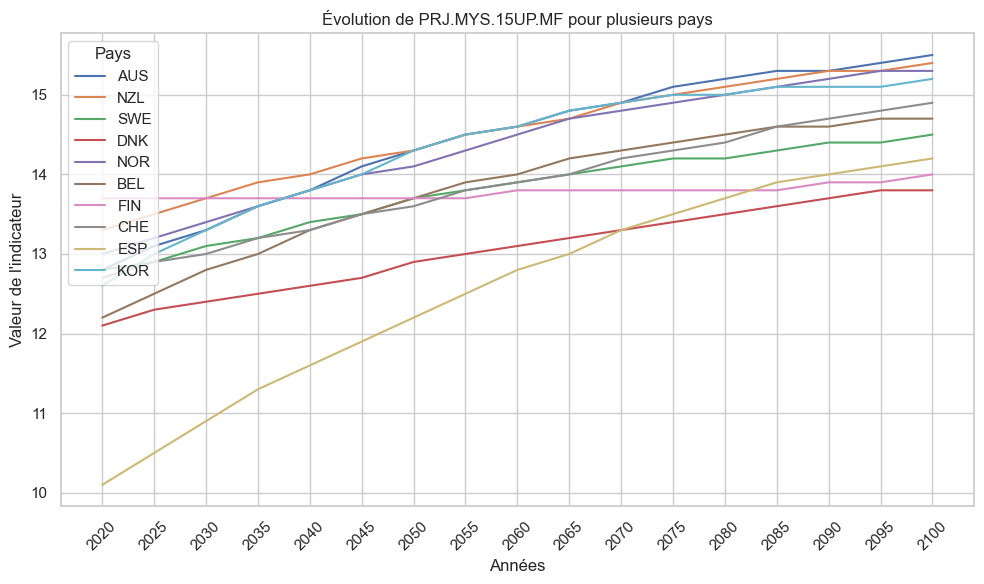

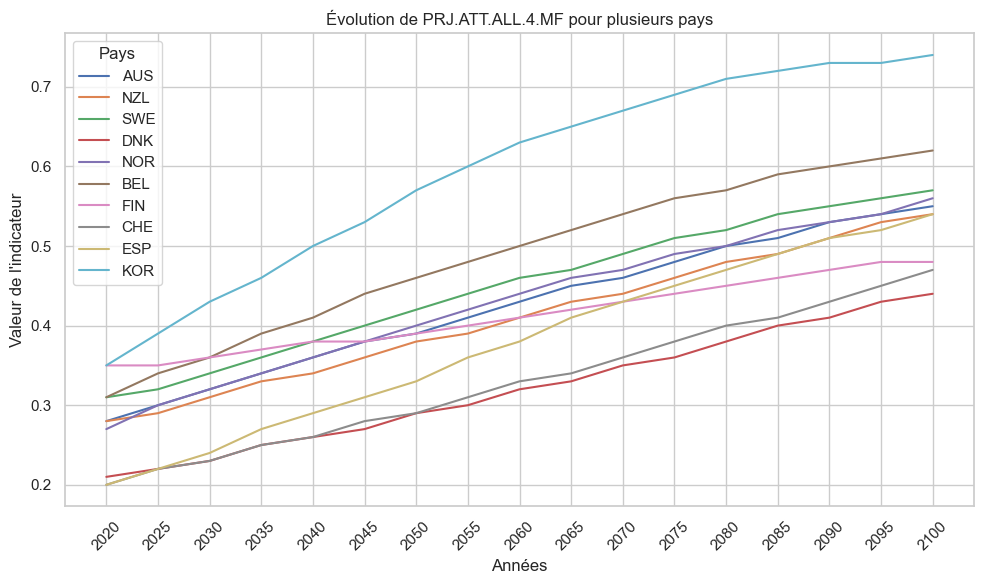

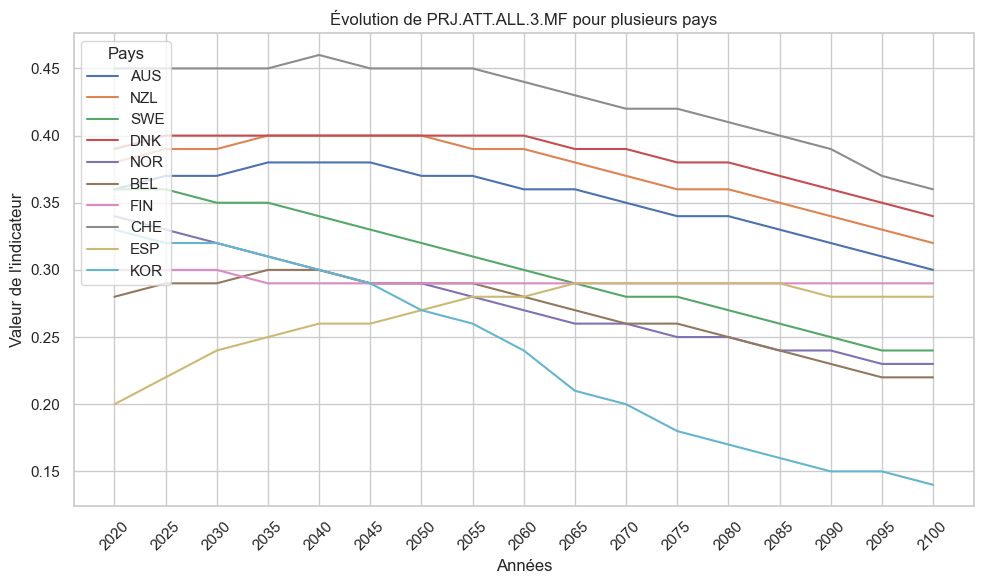

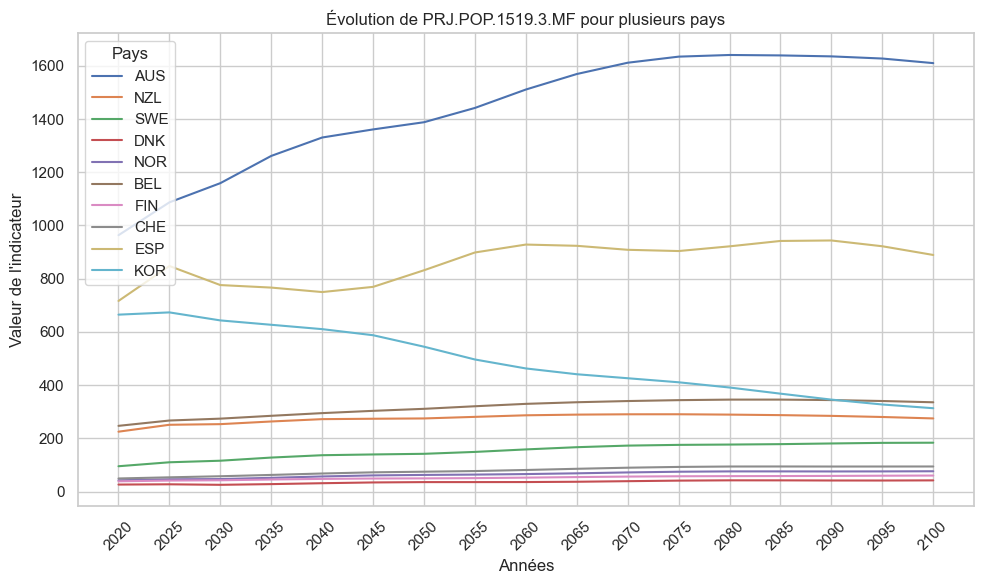

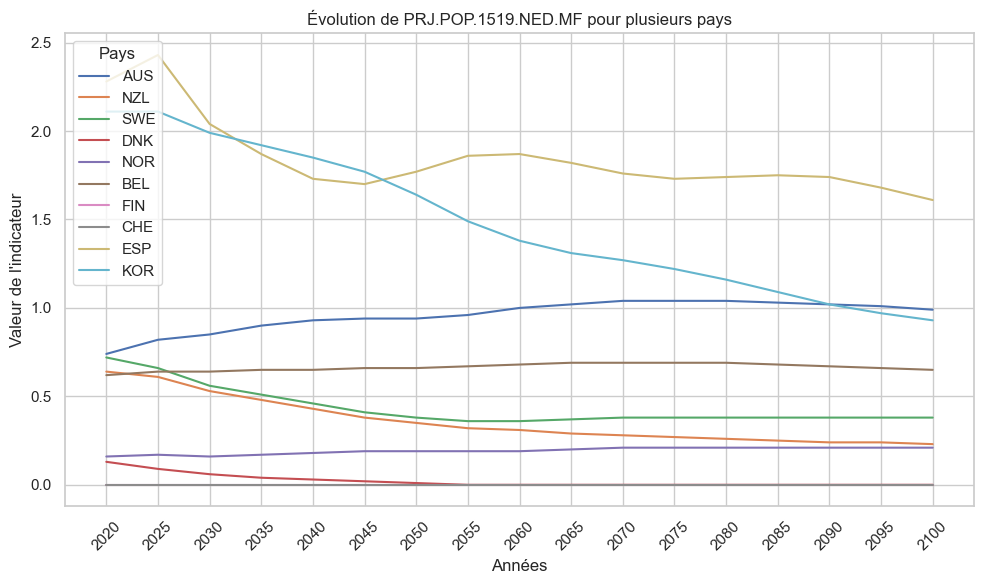

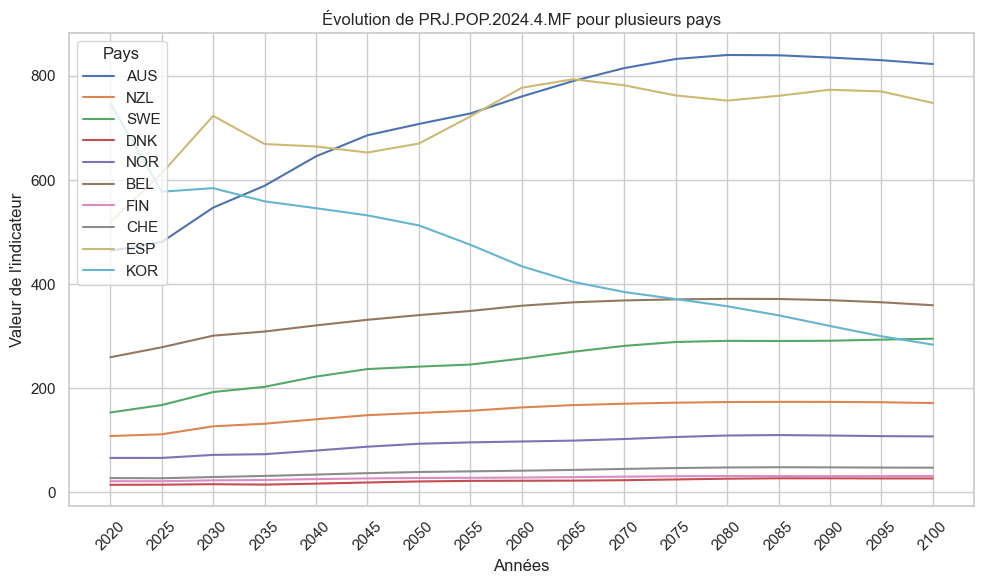

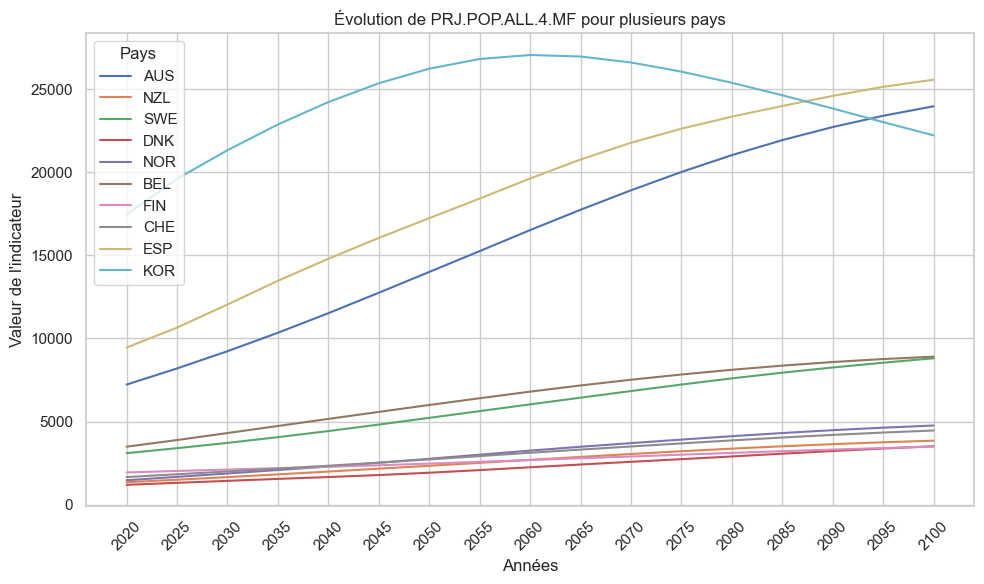

In [180]:
#Liste des pays et des indicateurs d'intérêt
countries_of_interest = ['AUS', 'NZL', 'SWE', 'DNK', 'NOR', 'BEL', 'FIN', 'CHE', 'ESP', 'KOR']
indicators_of_interest = ['PRJ.MYS.15UP.MF','PRJ.ATT.ALL.4.MF','PRJ.ATT.ALL.3.MF',
    'PRJ.POP.1519.3.MF',
    'PRJ.POP.1519.NED.MF',
    'PRJ.POP.2024.4.MF',
    'PRJ.POP.ALL.4.MF']

#Filtrer les données uniquement pour ces pays et indicateurs
df_filtered = df_pivoted[df_pivoted['Country Code'].isin(countries_of_interest) & df_pivoted['Indicator Code'].isin(indicators_of_interest)]

#Extraire les colonnes d'années pour tracer les graphiques
years = [col for col in df_pivoted.columns if col.isdigit()] 

#Boucle sur les indicateurs pour créer des graphiques
for indicator in indicators_of_interest:
    plt.figure(figsize=(10, 6))
    
    #Tracer la courbe de chaque pays pour cet indicateur
    for country in countries_of_interest:
        data = df_filtered[(df_filtered['Country Code'] == country) & (df_filtered['Indicator Code'] == indicator)]
        
        if not data.empty:  # S'assurer que les données existent
            plt.plot(years, data.iloc[0, 3:].values, label=country)
    
    #Titre et labels
    plt.title(f'Évolution de {indicator} pour plusieurs pays')
    plt.xlabel('Années')
    plt.ylabel('Valeur de l\'indicateur')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    #Ajouter une légende pour identifier les pays
    plt.legend(title="Pays", loc='upper left')
    
    #Afficher le graphique
    plt.tight_layout()
    plt.show()

#### En regardant les différents indicateurs et les données de projections pour nos 10 pays ciblés, on voit des évolutions pour pas mal de pays sur les différents indicateurs.

Pour l'indicateur PRJ.MYS.15UP.MF (Projection des années moyennes de scolarité pour les 15 ans et plus), on voit que tout les pays sont en augmentation dans le temps, une très grand augmentation pour l'Espagne par exemple. Notre top 3 se comporte très bien (Belgique, Norvège, Danemark)

L'indicateur PRJ.ATT.ALL.4.MF (projection scolarisation études sup H et F), là aussi tout les pays sont en augmentation, plus particulièrement la Korea et la Belgique, le top 3 continue de se comporter aussi bien. 

L'indicateur PRJ.ATT.ALL.3.MF (Projection scolarisation étude premier ou deuxième cycle secondaire), les pays connaissent une décroissance sauf l'Espgnen qui peut être dû à une baisse de la natalité dans l'avenir, ou en encore le vieillissement de la population, ou modification de la politique de migration. Cet indicateur est peut aussi être une opportunité pour certains pays avec nos cours en ligne.

PRJ.POP.1519.3.MF (Projection 15 - 19 ans dont le niveau d'éducation le plus élevé est le premier cycle de l'enseignement secondaire), montre une augmentation pour tout les pays sauf la Korea, mais une très forte augmentation pour l'Australie par exemple qui peut être une cible dans la zone océanique.

PRJ.POP.1519.NED.MF (projection 15-19 ans sans éducation) montre une réduction dans tout les pays, ce qui signifie à l'avenir plus de gens avec de l'éducation donc la cible de nos cours en ligne. 

PRJ.POP.2024.4.MF (projection population 20 à 24 ans ayant au moins un niveau d'enseignement secondaire inférieur à 4), augmentation de tout les pays sauf la Korea, notre top 3 de départ se comporte bien même si la Belgique est pas très forte sur ce point.

PRJ.POP.ALL.4.MF (projection popoulation 20 à 24 ans ayant terminé le premier cycle de l'enseignement secondaire),l'Australie, l'Espagne et la Korea se comportent très bien, les autres pays sont en augmentation aussi. 

### Conclusion

Avec les indicateurs analysés et les projections, les 3 pays choisis de base Norvège, Danemarke et la Belgique sont des pays très propice à l'installation de nos cours en ligne en Europe. Les données de projections montrent aussi que l'Espagne peut-être un pays très intéressant avec des indicateurs stables

Pour les autres zones, l'entreprise peut essayé de s'installer en Korea pour la zone Asie, qui a des indicateurs très pertinents et ce pays continue de se développer en termes d'infrastructures, de politique d'éducation.

Pour la zone Océanique, l'Australie est un pays qui peut être ciblé, car celui-ci a de bonnes données de projections, et permet à l'entreprise d'avoir plusieurs zones actives pour les cours en ligne. 